In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Trafficflow data/dataset.csv')

In [ ]:
data.drop(['Unnamed: 0','origin_coordinates','origin','destination','destination_coordinates','query_origin','query_destination','timestamp'],axis=1,inplace=True)


In [ ]:
final_data = data[['road','datetime_utc','Intersections','Public Places','Ways','Speed(m/s)','Congestion']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
final = final_data
final['label_enc_road']= label_encoder.fit_transform(final['road'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
final.drop(['road'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
label_encoder.classes_

array(['Adenwala Rd', 'Adenwala Rd and Nathalal Parekh Marg',
       'Antop Hill Rd and Shaikh Misree Marg',
       'Balaram Babu Khedekar Marg',
       'Bharni Naka Rd/Sir Pochkhan Wala Rd/Vidyalankar College Rd',
       'Comrade Harbanslal Marg/Flank Rd',
       'Comrade Harbanslal Marg/Flank Rd and Dr Baba Saheb Ambedkar Rd',
       'Dadar TT Flyover/Eastern Express Hwy', 'David S Barretto Rd',
       'David S Barretto Rd and Barkat Ali Dargah Rd',
       'Dr Baba Saheb Ambedkar Rd',
       'Eastern Express Hwy and Dr Baba Saheb Ambedkar Rd',
       'GD Ambekar Marg/Katrak Rd',
       'GD Ambekar Marg/Katrak Rd and Firdausi Rd', 'Govindji Keni Rd',
       'Govindji Keni Rd and GD Ambekar Marg/Katrak Rd',
       'Govindji Keni Rd, Mahatma Jyotiba Phule Rd/Naigaon Rd and BJ Deorukhkar Marg/BJ Devrukhkar Rd',
       'H R Mahajani Rd', 'Jerbai Wadia Rd',
       'Kings Cir/Matunga Cir and Puranmal Singhani Rd',
       'Lady Jamshedji Rd/LJ Rd and N C. Kelkar Rd', 'Lady Jehangir Rd',
    

In [ ]:
final

,datetime_utc,Intersections,Public Places,Ways,Speed(m/s),Congestion,label_enc_road
0,06/30/2021 18:30:00,2,5,2,3.957143,1,12
1,06/30/2021 19:30:00,2,5,2,3.957143,1,12
2,06/30/2021 20:30:00,2,5,2,3.957143,1,12
3,06/30/2021 21:30:00,2,5,2,4.616667,0,12
4,06/30/2021 22:30:00,2,5,2,4.616667,0,12
...,...,...,...,...,...,...,...
20515,07/19/2021 13:30:00,6,12,1,4.627778,1,32
20516,07/19/2021 14:30:00,6,12,1,4.627778,1,32
20517,07/19/2021 15:30:00,6,12,1,4.627778,1,32
20518,07/19/2021 16:30:00,6,12,1,4.627778,1,32


In [ ]:
len(final['label_enc_road'].unique())

37

In [ ]:
final['datetime_utc']= pd.to_datetime(final['datetime_utc'])
final["Date_IST"] = pd.to_datetime(final['datetime_utc']) + pd.DateOffset(hours=5, minutes=30)
final['Dates'] = pd.to_datetime(final["Date_IST"]).dt.date
final['Time'] = pd.to_datetime(final["Date_IST"]).dt.time

final.drop(['datetime_utc','Date_IST'],axis=1,inplace=True)

final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Intersections,Public Places,Ways,Speed(m/s),Congestion,label_enc_road,Dates,Time
0,2,5,2,3.957143,1,12,2021-07-01,00:00:00
1,2,5,2,3.957143,1,12,2021-07-01,01:00:00
2,2,5,2,3.957143,1,12,2021-07-01,02:00:00
3,2,5,2,4.616667,0,12,2021-07-01,03:00:00
4,2,5,2,4.616667,0,12,2021-07-01,04:00:00
...,...,...,...,...,...,...,...,...
20515,6,12,1,4.627778,1,32,2021-07-19,19:00:00
20516,6,12,1,4.627778,1,32,2021-07-19,20:00:00
20517,6,12,1,4.627778,1,32,2021-07-19,21:00:00
20518,6,12,1,4.627778,1,32,2021-07-19,22:00:00


In [ ]:
final['hour'] = final['Time'].map(lambda x: x.hour)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final['Dates'] = pd.to_datetime(final['Dates'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
daynumber = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [ ]:
final

,Intersections,Public Places,Ways,Speed(m/s),Congestion,label_enc_road,Dates,Time,hour
0,2,5,2,3.957143,1,12,2021-07-01,00:00:00,0
1,2,5,2,3.957143,1,12,2021-07-01,01:00:00,1
2,2,5,2,3.957143,1,12,2021-07-01,02:00:00,2
3,2,5,2,4.616667,0,12,2021-07-01,03:00:00,3
4,2,5,2,4.616667,0,12,2021-07-01,04:00:00,4
...,...,...,...,...,...,...,...,...,...
20515,6,12,1,4.627778,1,32,2021-07-19,19:00:00,19
20516,6,12,1,4.627778,1,32,2021-07-19,20:00:00,20
20517,6,12,1,4.627778,1,32,2021-07-19,21:00:00,21
20518,6,12,1,4.627778,1,32,2021-07-19,22:00:00,22


In [ ]:
final['dayOfWeek'] = final['Dates'].dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final['Daynumber'] = [daynumber[final['dayOfWeek'][i]] for i in range(final.shape[0])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final

,Intersections,Public Places,Ways,Speed(m/s),Congestion,label_enc_road,Dates,Time,hour,dayOfWeek,Daynumber
0,2,5,2,3.957143,1,12,2021-07-01,00:00:00,0,Thursday,4
1,2,5,2,3.957143,1,12,2021-07-01,01:00:00,1,Thursday,4
2,2,5,2,3.957143,1,12,2021-07-01,02:00:00,2,Thursday,4
3,2,5,2,4.616667,0,12,2021-07-01,03:00:00,3,Thursday,4
4,2,5,2,4.616667,0,12,2021-07-01,04:00:00,4,Thursday,4
...,...,...,...,...,...,...,...,...,...,...,...
20515,6,12,1,4.627778,1,32,2021-07-19,19:00:00,19,Monday,1
20516,6,12,1,4.627778,1,32,2021-07-19,20:00:00,20,Monday,1
20517,6,12,1,4.627778,1,32,2021-07-19,21:00:00,21,Monday,1
20518,6,12,1,4.627778,1,32,2021-07-19,22:00:00,22,Monday,1


In [ ]:
final.drop(['Dates','Time','dayOfWeek'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final


,Intersections,Public Places,Ways,Speed(m/s),Congestion,label_enc_road,hour,Daynumber
0,2,5,2,3.957143,1,12,0,4
1,2,5,2,3.957143,1,12,1,4
2,2,5,2,3.957143,1,12,2,4
3,2,5,2,4.616667,0,12,3,4
4,2,5,2,4.616667,0,12,4,4
...,...,...,...,...,...,...,...,...
20515,6,12,1,4.627778,1,32,19,1
20516,6,12,1,4.627778,1,32,20,1
20517,6,12,1,4.627778,1,32,21,1
20518,6,12,1,4.627778,1,32,22,1


In [ ]:
final['Congestion'] = final['Congestion'].apply(lambda x: 2 if x >= 2 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X = final.drop(['Speed(m/s)','Congestion'],axis=1)
y = final['Congestion']

In [ ]:
final['Congestion'].unique()

array([1, 0, 2])

In [ ]:
X


,Intersections,Public Places,Ways,label_enc_road,hour,Daynumber
0,2,5,2,12,0,4
1,2,5,2,12,1,4
2,2,5,2,12,2,4
3,2,5,2,12,3,4
4,2,5,2,12,4,4
...,...,...,...,...,...,...
20515,6,12,1,32,19,1
20516,6,12,1,32,20,1
20517,6,12,1,32,21,1
20518,6,12,1,32,22,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True,stratify=y)

In [ ]:
y

0        1
1        1
2        1
3        0
4        0
        ..
20515    1
20516    1
20517    1
20518    1
20519    1
Name: Congestion, Length: 20520, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X= X_train
y = y_train
X, y = oversample.fit_resample(X, y)
y.shape

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(17970,)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(y.reshape(-1, 1)).toarray())

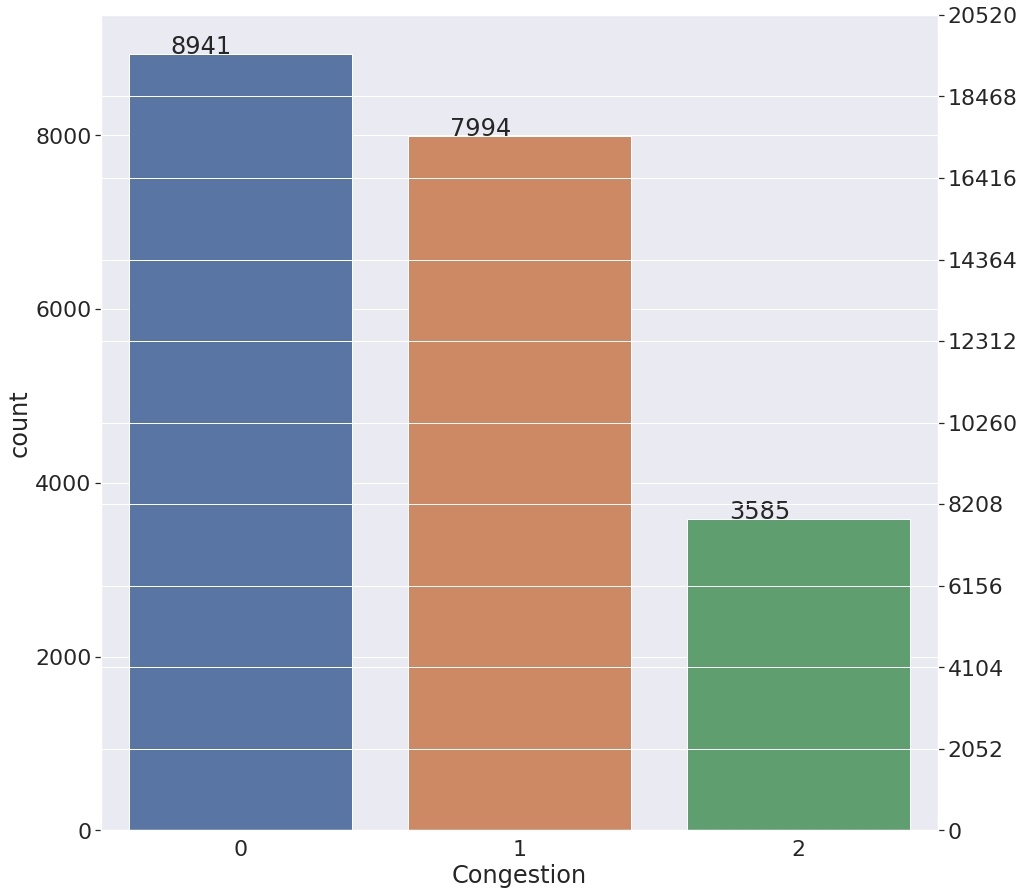

In [ ]:
plt.figure(figsize=(15,15))
sns.set(font_scale = 2)
ax = sns.countplot(x='Congestion',data=final)
# ax = (final.Congestion.value_counts()/len(final)*100).sort_index().plot(kind="bar", rot=0)
# ax.set_yticks(np.arange(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(final)/100)

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [ ]:
final['Congestion'].value_counts()

0    8941
1    7994
2    3585
Name: Congestion, dtype: int64

In [ ]:
np.array(np.unique(y, return_counts=True)).T

array([[   0, 5990],
       [   1, 5990],
       [   2, 5990]])

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=6, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

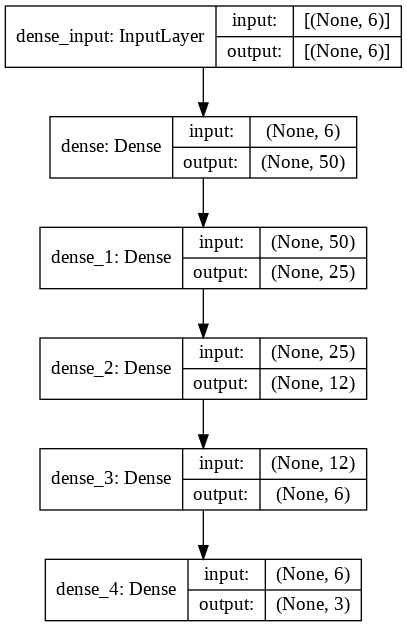

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow import keras

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

opt = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy",keras.metrics.AUC()])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 21        
Total params: 2,036
Trainable params: 2,036
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/Traffic_data/model_version3.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
#                               patience=5, min_lr=0.001)

In [ ]:
history = model.fit(X, enc_df, epochs=75, batch_size=32,validation_split=0.2,callbacks=[model_checkpoint_callback])

Epoch 1/75
450/450 [==============================] - 2s 3ms/step - loss: 0.9167 - accuracy: 0.5586 - auc_1: 0.7513 - val_loss: 1.3036 - val_accuracy: 0.1491 - val_auc_1: 0.4499
Epoch 2/75
450/450 [==============================] - 1s 2ms/step - loss: 0.7436 - accuracy: 0.6717 - auc_1: 0.8437 - val_loss: 1.1032 - val_accuracy: 0.2638 - val_auc_1: 0.5996
Epoch 3/75
450/450 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.6985 - auc_1: 0.8664 - val_loss: 0.9493 - val_accuracy: 0.3781 - val_auc_1: 0.6911
Epoch 4/75
450/450 [==============================] - 1s 2ms/step - loss: 0.6527 - accuracy: 0.7210 - auc_1: 0.8815 - val_loss: 1.3397 - val_accuracy: 0.2838 - val_auc_1: 0.5580
Epoch 5/75
450/450 [==============================] - 1s 2ms/step - loss: 0.6258 - accuracy: 0.7350 - auc_1: 0.8914 - val_loss: 0.9078 - val_accuracy: 0.4193 - val_auc_1: 0.7403
Epoch 6/75
450/450 [==============================] - 1s 2ms/step - loss: 0.6071 - accuracy: 0.7443 - auc_1: 0

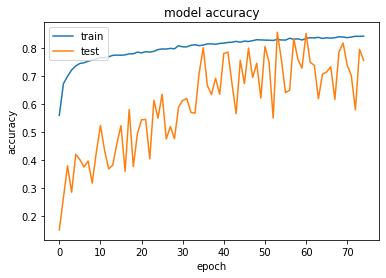

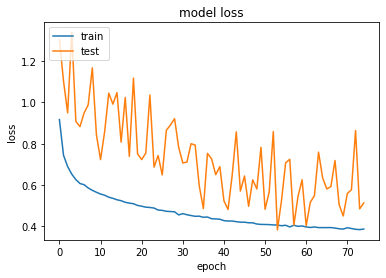

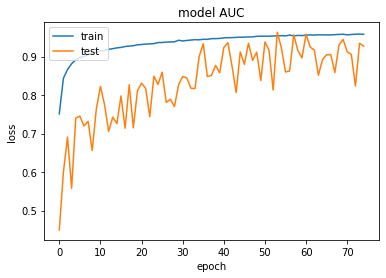

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summariz histroy for auc
plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('model AUC')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
model.load_weights('/content/drive/MyDrive/Traffic_data/model.h5')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
y_test

9034     0
873      2
13479    1
8558     1
16073    1
        ..
8649     0
18267    1
705      1
18306    1
16201    1
Name: Congestion, Length: 6772, dtype: int64

In [ ]:
final_predictions = [np.argmax(prediction) for prediction in predictions]

In [ ]:
final_predictions

[0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 1,


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(final_predictions,y_test))

In [ ]:
# previous
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      4049
           1       0.75      0.37      0.49      2275
           2       0.65      0.09      0.16       448

    accuracy                           0.71      6772
   macro avg       0.70      0.47      0.49      6772
weighted avg       0.71      0.71      0.66      6772

In [ ]:
df = pd.DataFrame({'Predictions':final_predictions,'Real':y_test})

In [ ]:
df.to_csv('/content/drive/MyDrive/Traffic_data/output.csv',index=False)

In [ ]:
import tensorflow

In [ ]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/MyDrive/Traffic_data/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpdyjhsin8/assets


INFO:tensorflow:Assets written to: /tmp/tmpdyjhsin8/assets


In [ ]:
model = load_model('/content/drive/MyDrive/Traffic_data/model.h5')

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 50)                200       
_________________________________________________________________
dense_46 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_47 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_48 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 21        
Total params: 1,886
Trainable params: 1,886
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict([[12,0,4]])

array([[0.03225084, 0.02812998, 0.9396192 ]], dtype=float32)

In [ ]:
np.argmax(model.predict([[12,0,4]]))#2

2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X, enc_df)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
predictions

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
final_predictions = [np.argmax(prediction) for prediction in predictions]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(final_predictions,y_test))

In [ ]:
from sklearn.metrics import confusion_matrix


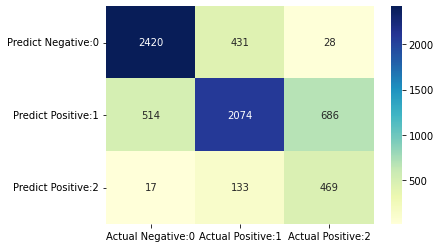

In [ ]:
cm = confusion_matrix(final_predictions,y_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0','Actual Positive:1', 'Actual Positive:2'], 
                                 index=['Predict Negative:0','Predict Positive:1','Predict Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
X

array([[24,  0,  7],
       [11,  2,  6],
       [17,  0,  7],
       ...,
       [ 3, 22,  4],
       [19, 16,  2],
       [ 4, 11,  3]])

In [ ]:
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
test = np.array(X_test)

In [ ]:
test

array([[13, 38,  2, 24, 10,  5],
       [ 1,  6,  1, 16, 16,  5],
       [ 8, 29,  2,  2, 15,  7],
       ...,
       [ 1,  6,  1, 16,  4,  2],
       [ 2,  6,  2, 27, 18,  6],
       [ 1,  1,  2, 17,  1,  7]])

In [ ]:
final_predictions = xgb.predict(test)
from sklearn.metrics import classification_report
print(classification_report(final_predictions,y_test))

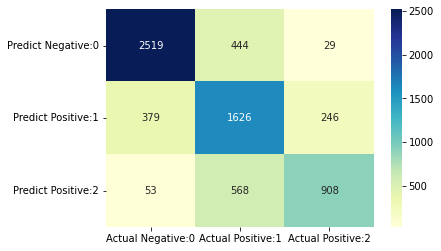

In [ ]:
cm = confusion_matrix(final_predictions,y_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0','Actual Positive:1', 'Actual Positive:2'], 
                                 index=['Predict Negative:0','Predict Positive:1','Predict Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 21 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
grid = {'max_depth': [3,4,5,7,10],'n_estimators':[100, 200, 300,400,500],'learning_rate':[0.1,0.01,0.001,0.0001,1,10,]}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gscv = GridSearchCV (estimator = CatBoostClassifier(), param_grid = grid, scoring ='accuracy', cv = 5)

In [ ]:
gscv.fit(X,y)

Streaming output truncated to the last 5000 lines.
100:	learn: 0.0682611	total: 2.06s	remaining: 4.07s
101:	learn: 0.0677090	total: 2.08s	remaining: 4.04s
102:	learn: 0.0674366	total: 2.1s	remaining: 4.02s
103:	learn: 0.0669129	total: 2.12s	remaining: 4s
104:	learn: 0.0660245	total: 2.14s	remaining: 3.97s
105:	learn: 0.0654666	total: 2.16s	remaining: 3.96s
106:	learn: 0.0649630	total: 2.19s	remaining: 3.94s
107:	learn: 0.0646351	total: 2.2s	remaining: 3.92s
108:	learn: 0.0641349	total: 2.23s	remaining: 3.91s
109:	learn: 0.0639086	total: 2.25s	remaining: 3.88s
110:	learn: 0.0635311	total: 2.27s	remaining: 3.86s
111:	learn: 0.0631960	total: 2.28s	remaining: 3.83s
112:	learn: 0.0628916	total: 2.3s	remaining: 3.81s
113:	learn: 0.0624870	total: 2.32s	remaining: 3.79s
114:	learn: 0.0622256	total: 2.34s	remaining: 3.76s
115:	learn: 0.0617445	total: 2.36s	remaining: 3.74s
116:	learn: 0.0612820	total: 2.38s	remaining: 3.72s
117:	learn: 0.0608502	total: 2.39s	remaining: 3.69s
118:	learn: 0.06049

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8687048	total: 6.18ms	remaining: 612ms
1:	learn: 1870.7471168	total: 12.5ms	remaining: 612ms
2:	learn: 2380.3447916	total: 18.6ms	remaining: 600ms
3:	learn: 5894.8565677	total: 24.3ms	remaining: 584ms
4:	learn: 1640.5984467	total: 29.9ms	remaining: 569ms
5:	learn: 3107.9551205	total: 35.6ms	remaining: 557ms
6:	learn: 3337.3423527	total: 41.3ms	remaining: 548ms
7:	learn: 4112.2573504	total: 46.7ms	remaining: 537ms
8:	learn: 3256.6047026	total: 52.3ms	remaining: 529ms
9:	learn: 3584.1100550	total: 57.9ms	remaining: 521ms
10:	learn: 2590.2033878	total: 63.3ms	remaining: 512ms
11:	learn: 3733.4546643	total: 69.1ms	remaining: 507ms
12:	learn: 2954.0607152	total: 74.6ms	remaining: 499ms
13:	learn: 2971.2069230	total: 82ms	remaining: 504ms
14:	learn: 2801.2807697	total: 87.8ms	remaining: 498ms
15:	learn: 1968.1969304	total: 93.5ms	remaining: 491ms
16:	learn: 3780.1358711	total: 99.3ms	remaining: 485ms
17:	learn: 1842.9409763	total: 105ms	remaining: 478ms
18:	learn: 2764.0548362	to

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


23:	learn: 2637.7876954	total: 134ms	remaining: 424ms
24:	learn: 2399.2538579	total: 141ms	remaining: 422ms
25:	learn: 4951.2066040	total: 147ms	remaining: 418ms
26:	learn: 1804.2059374	total: 156ms	remaining: 421ms
27:	learn: 4926.0064342	total: 161ms	remaining: 414ms
28:	learn: 2539.9349527	total: 167ms	remaining: 409ms
29:	learn: 4037.5357389	total: 173ms	remaining: 403ms
30:	learn: 2025.1847652	total: 178ms	remaining: 397ms
31:	learn: 3207.3862470	total: 186ms	remaining: 395ms
32:	learn: 2250.5613717	total: 194ms	remaining: 395ms
33:	learn: 3857.2514646	total: 200ms	remaining: 388ms
34:	learn: 3117.9783448	total: 205ms	remaining: 381ms
35:	learn: 2484.9219242	total: 211ms	remaining: 374ms
36:	learn: 2761.1879992	total: 216ms	remaining: 368ms
37:	learn: 2844.4948533	total: 222ms	remaining: 362ms
38:	learn: 3083.6917062	total: 227ms	remaining: 356ms
39:	learn: 4448.1138180	total: 233ms	remaining: 349ms
40:	learn: 3068.5948588	total: 238ms	remaining: 343ms
41:	learn: 3183.4622304	tota

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


16:	learn: 4663.6288547	total: 99.8ms	remaining: 487ms
17:	learn: 2106.3126068	total: 105ms	remaining: 479ms
18:	learn: 3799.9161856	total: 111ms	remaining: 473ms
19:	learn: 2318.6171033	total: 117ms	remaining: 467ms
20:	learn: 3835.8434249	total: 122ms	remaining: 459ms
21:	learn: 3249.1914926	total: 127ms	remaining: 452ms
22:	learn: 3727.9943807	total: 133ms	remaining: 445ms
23:	learn: 3683.3196500	total: 138ms	remaining: 438ms
24:	learn: 2855.9261676	total: 144ms	remaining: 432ms
25:	learn: 3341.2729504	total: 150ms	remaining: 426ms
26:	learn: 4408.3587725	total: 155ms	remaining: 419ms
27:	learn: 3230.8659612	total: 161ms	remaining: 414ms
28:	learn: 4131.0333743	total: 167ms	remaining: 408ms
29:	learn: 2043.4221672	total: 173ms	remaining: 405ms
30:	learn: 4464.8423011	total: 180ms	remaining: 400ms
31:	learn: 2669.9941599	total: 186ms	remaining: 395ms
32:	learn: 2736.9966444	total: 200ms	remaining: 406ms
33:	learn: 5655.7565700	total: 207ms	remaining: 401ms
34:	learn: 2619.3845551	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


8:	learn: 2348.7288461	total: 58.2ms	remaining: 589ms
9:	learn: 6254.6580215	total: 63.8ms	remaining: 575ms
10:	learn: 2189.6223391	total: 69.1ms	remaining: 559ms
11:	learn: 2483.1650043	total: 74.5ms	remaining: 546ms
12:	learn: 2106.9607367	total: 79.7ms	remaining: 533ms
13:	learn: 4738.8190376	total: 84.8ms	remaining: 521ms
14:	learn: 3310.1707367	total: 90.3ms	remaining: 511ms
15:	learn: 4134.0547389	total: 95.9ms	remaining: 503ms
16:	learn: 1788.1390053	total: 101ms	remaining: 494ms
17:	learn: 3288.6793836	total: 106ms	remaining: 484ms
18:	learn: 1614.2583363	total: 112ms	remaining: 475ms
19:	learn: 4200.4652601	total: 117ms	remaining: 467ms
20:	learn: 3317.5290186	total: 122ms	remaining: 459ms
21:	learn: 2713.2981218	total: 127ms	remaining: 451ms
22:	learn: 4033.5003906	total: 133ms	remaining: 444ms
23:	learn: 1625.8770823	total: 138ms	remaining: 438ms
24:	learn: 3945.2332000	total: 143ms	remaining: 430ms
25:	learn: 3291.6323427	total: 149ms	remaining: 425ms
26:	learn: 3320.375162

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8500792	total: 6.04ms	remaining: 598ms
1:	learn: 2161.3634685	total: 11.9ms	remaining: 582ms
2:	learn: 2296.6889992	total: 17.4ms	remaining: 563ms
3:	learn: 5603.4798515	total: 22.9ms	remaining: 550ms
4:	learn: 1302.8035267	total: 28.1ms	remaining: 533ms
5:	learn: 5319.0692781	total: 33.3ms	remaining: 521ms
6:	learn: 1382.8784699	total: 38.4ms	remaining: 510ms
7:	learn: 4514.2562655	total: 43.5ms	remaining: 500ms
8:	learn: 2241.8175625	total: 51.2ms	remaining: 518ms
9:	learn: 5536.6903005	total: 56.5ms	remaining: 509ms
10:	learn: 1484.6782015	total: 61.7ms	remaining: 499ms
11:	learn: 4003.7349302	total: 66.7ms	remaining: 489ms
12:	learn: 1098.8694855	total: 71.7ms	remaining: 480ms
13:	learn: 3205.1446434	total: 76.8ms	remaining: 472ms
14:	learn: 5149.5088208	total: 81.9ms	remaining: 464ms
15:	learn: 1975.9934862	total: 87.3ms	remaining: 458ms
16:	learn: 4220.7488771	total: 92.6ms	remaining: 452ms
17:	learn: 2404.1099362	total: 97.5ms	remaining: 444ms
18:	learn: 5114.8402483

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8687048	total: 5.74ms	remaining: 1.14s
1:	learn: 1870.7471168	total: 11.5ms	remaining: 1.13s
2:	learn: 2380.3447916	total: 17ms	remaining: 1.12s
3:	learn: 5894.8565677	total: 22.4ms	remaining: 1.1s
4:	learn: 1640.5984467	total: 27.9ms	remaining: 1.09s
5:	learn: 3107.9551205	total: 33.5ms	remaining: 1.08s
6:	learn: 3337.3423527	total: 38.9ms	remaining: 1.07s
7:	learn: 4112.2573504	total: 44.2ms	remaining: 1.06s
8:	learn: 3256.6047026	total: 49.5ms	remaining: 1.05s
9:	learn: 3584.1100550	total: 54.8ms	remaining: 1.04s
10:	learn: 2590.2033878	total: 60.4ms	remaining: 1.04s
11:	learn: 3733.4546643	total: 65.7ms	remaining: 1.03s
12:	learn: 2954.0607152	total: 70.9ms	remaining: 1.02s
13:	learn: 2971.2069230	total: 76.2ms	remaining: 1.01s
14:	learn: 2801.2807697	total: 81.5ms	remaining: 1s
15:	learn: 1968.1969304	total: 86.9ms	remaining: 999ms
16:	learn: 3780.1358711	total: 91.9ms	remaining: 989ms
17:	learn: 1842.9409763	total: 97.3ms	remaining: 984ms
18:	learn: 2764.0548362	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 2288.3087494	total: 19.2ms	remaining: 1.26s
3:	learn: 5483.1640642	total: 27.6ms	remaining: 1.35s
4:	learn: 1196.4182730	total: 35.2ms	remaining: 1.37s
5:	learn: 5484.8034899	total: 40.7ms	remaining: 1.32s
6:	learn: 1230.0515702	total: 45.8ms	remaining: 1.26s
7:	learn: 4682.5114594	total: 51.3ms	remaining: 1.23s
8:	learn: 2278.4683823	total: 56.8ms	remaining: 1.21s
9:	learn: 5233.8675074	total: 62.2ms	remaining: 1.18s
10:	learn: 1202.7556181	total: 67.7ms	remaining: 1.16s
11:	learn: 3884.1814510	total: 73.7ms	remaining: 1.15s
12:	learn: 2506.5611734	total: 79.3ms	remaining: 1.14s
13:	learn: 2696.6724238	total: 84.8ms	remaining: 1.13s
14:	learn: 5239.0667921	total: 90.4ms	remaining: 1.11s
15:	learn: 1572.7120564	total: 96.2ms	remaining: 1.11s
16:	learn: 4807.7337987	total: 102ms	remaining: 1.09s
17:	learn: 2896.8518184	total: 107ms	remaining: 1.08s
18:	learn: 4868.2660418	total: 113ms	remaining: 1.07s
19:	learn: 1719.7264191	total: 118ms	remaining: 1.06s
20:	learn: 3630.309720

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 1195.1716855	total: 36.3ms	remaining: 1.41s
5:	learn: 5494.4430054	total: 42.1ms	remaining: 1.36s
6:	learn: 1257.7321812	total: 47.2ms	remaining: 1.3s
7:	learn: 5466.7108463	total: 52.7ms	remaining: 1.26s
8:	learn: 2687.7910676	total: 58ms	remaining: 1.23s
9:	learn: 5449.5557959	total: 63.4ms	remaining: 1.2s
10:	learn: 1419.5236421	total: 69.1ms	remaining: 1.19s
11:	learn: 4351.7362934	total: 74.5ms	remaining: 1.17s
12:	learn: 1805.2088484	total: 79.8ms	remaining: 1.15s
13:	learn: 2702.1682895	total: 85.4ms	remaining: 1.13s
14:	learn: 4821.4308428	total: 90.8ms	remaining: 1.12s
15:	learn: 2462.4316359	total: 96.2ms	remaining: 1.11s
16:	learn: 4663.6288547	total: 102ms	remaining: 1.09s
17:	learn: 2106.3126068	total: 107ms	remaining: 1.08s
18:	learn: 3799.9161856	total: 113ms	remaining: 1.08s
19:	learn: 2318.6171033	total: 118ms	remaining: 1.07s
20:	learn: 3835.8434249	total: 124ms	remaining: 1.06s
21:	learn: 3249.1914926	total: 130ms	remaining: 1.05s
22:	learn: 3727.9943807	to

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1846.5576902	total: 12.2ms	remaining: 1.21s
2:	learn: 3050.3323255	total: 23.5ms	remaining: 1.54s
3:	learn: 6786.0795969	total: 32.6ms	remaining: 1.6s
4:	learn: 2412.8628128	total: 38.3ms	remaining: 1.5s
5:	learn: 7066.8927402	total: 43.9ms	remaining: 1.42s
6:	learn: 2250.4630990	total: 55.7ms	remaining: 1.53s
7:	learn: 5309.0335887	total: 62.2ms	remaining: 1.49s
8:	learn: 2348.7288461	total: 67.7ms	remaining: 1.44s
9:	learn: 6254.6580215	total: 74.3ms	remaining: 1.41s
10:	learn: 2189.6223391	total: 79.9ms	remaining: 1.37s
11:	learn: 2483.1650043	total: 85.8ms	remaining: 1.34s
12:	learn: 2106.9607367	total: 91.2ms	remaining: 1.31s
13:	learn: 4738.8190376	total: 96.8ms	remaining: 1.29s
14:	learn: 3310.1707367	total: 102ms	remaining: 1.26s
15:	learn: 4134.0547389	total: 108ms	remaining: 1.25s
16:	learn: 1788.1390053	total: 114ms	remaining: 1.23s
17:	learn: 3288.6793836	total: 119ms	remaining: 1.21s
18:	learn: 1614.2583363	total: 125ms	remaining: 1.19s
19:	learn: 4200.4652601	to

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8500792	total: 5.79ms	remaining: 1.15s
1:	learn: 2161.3634685	total: 11ms	remaining: 1.09s
2:	learn: 2296.6889992	total: 16.4ms	remaining: 1.07s
3:	learn: 5603.4798515	total: 21.4ms	remaining: 1.05s
4:	learn: 1302.8035267	total: 26.8ms	remaining: 1.04s
5:	learn: 5319.0692781	total: 32ms	remaining: 1.03s
6:	learn: 1382.8784699	total: 37.2ms	remaining: 1.02s
7:	learn: 4514.2562655	total: 42.5ms	remaining: 1.02s
8:	learn: 2241.8175625	total: 47.7ms	remaining: 1.01s
9:	learn: 5536.6903005	total: 52.8ms	remaining: 1s
10:	learn: 1484.6782015	total: 58ms	remaining: 996ms
11:	learn: 4003.7349302	total: 63ms	remaining: 988ms
12:	learn: 1098.8694855	total: 68ms	remaining: 978ms
13:	learn: 3205.1446434	total: 73.4ms	remaining: 976ms
14:	learn: 5149.5088208	total: 78.5ms	remaining: 968ms
15:	learn: 1975.9934862	total: 83.6ms	remaining: 961ms
16:	learn: 4220.7488771	total: 88.5ms	remaining: 952ms
17:	learn: 2404.1099362	total: 93.6ms	remaining: 947ms
18:	learn: 5114.8402483	total: 98.8m

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8687048	total: 5.98ms	remaining: 1.79s
1:	learn: 1870.7471168	total: 11.6ms	remaining: 1.72s
2:	learn: 2380.3447916	total: 17ms	remaining: 1.68s
3:	learn: 5894.8565677	total: 22.6ms	remaining: 1.67s
4:	learn: 1640.5984467	total: 28ms	remaining: 1.65s
5:	learn: 3107.9551205	total: 33.5ms	remaining: 1.64s
6:	learn: 3337.3423527	total: 39ms	remaining: 1.63s
7:	learn: 4112.2573504	total: 44.4ms	remaining: 1.62s
8:	learn: 3256.6047026	total: 49.9ms	remaining: 1.61s
9:	learn: 3584.1100550	total: 55.4ms	remaining: 1.61s
10:	learn: 2590.2033878	total: 60.9ms	remaining: 1.6s
11:	learn: 3733.4546643	total: 66.5ms	remaining: 1.59s
12:	learn: 2954.0607152	total: 72ms	remaining: 1.59s
13:	learn: 2971.2069230	total: 77.3ms	remaining: 1.58s
14:	learn: 2801.2807697	total: 82.8ms	remaining: 1.57s
15:	learn: 1968.1969304	total: 88.2ms	remaining: 1.57s
16:	learn: 3780.1358711	total: 93.5ms	remaining: 1.56s
17:	learn: 1842.9409763	total: 101ms	remaining: 1.58s
18:	learn: 2764.0548362	total: 10

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9130678	total: 5.97ms	remaining: 1.79s
1:	learn: 2463.1388312	total: 11.8ms	remaining: 1.75s
2:	learn: 2288.3087494	total: 17.1ms	remaining: 1.69s
3:	learn: 5483.1640642	total: 23ms	remaining: 1.7s
4:	learn: 1196.4182730	total: 28.7ms	remaining: 1.7s
5:	learn: 5484.8034899	total: 34.2ms	remaining: 1.67s
6:	learn: 1230.0515702	total: 39.7ms	remaining: 1.66s
7:	learn: 4682.5114594	total: 45.1ms	remaining: 1.65s
8:	learn: 2278.4683823	total: 50.6ms	remaining: 1.64s
9:	learn: 5233.8675074	total: 56ms	remaining: 1.62s
10:	learn: 1202.7556181	total: 61.4ms	remaining: 1.61s
11:	learn: 3884.1814510	total: 66.8ms	remaining: 1.6s
12:	learn: 2506.5611734	total: 72.4ms	remaining: 1.6s
13:	learn: 2696.6724238	total: 78.1ms	remaining: 1.59s
14:	learn: 5239.0667921	total: 83.6ms	remaining: 1.59s
15:	learn: 1572.7120564	total: 89.3ms	remaining: 1.58s
16:	learn: 4807.7337987	total: 94.8ms	remaining: 1.58s
17:	learn: 2896.8518184	total: 100ms	remaining: 1.57s
18:	learn: 4868.2660418	total: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8799039	total: 5.81ms	remaining: 1.74s
1:	learn: 2457.5736203	total: 11.7ms	remaining: 1.74s
2:	learn: 2230.4689922	total: 17.1ms	remaining: 1.7s
3:	learn: 5508.3534481	total: 22.9ms	remaining: 1.69s
4:	learn: 1195.1716855	total: 28.1ms	remaining: 1.66s
5:	learn: 5494.4430054	total: 33.7ms	remaining: 1.65s
6:	learn: 1257.7321812	total: 40.6ms	remaining: 1.7s
7:	learn: 5466.7108463	total: 45.7ms	remaining: 1.67s
8:	learn: 2687.7910676	total: 50.9ms	remaining: 1.65s
9:	learn: 5449.5557959	total: 55.9ms	remaining: 1.62s
10:	learn: 1419.5236421	total: 61.2ms	remaining: 1.61s
11:	learn: 4351.7362934	total: 66.5ms	remaining: 1.6s
12:	learn: 1805.2088484	total: 71.8ms	remaining: 1.59s
13:	learn: 2702.1682895	total: 78.9ms	remaining: 1.61s
14:	learn: 4821.4308428	total: 84ms	remaining: 1.6s
15:	learn: 2462.4316359	total: 89ms	remaining: 1.58s
16:	learn: 4663.6288547	total: 94.5ms	remaining: 1.57s
17:	learn: 2106.3126068	total: 100ms	remaining: 1.57s
18:	learn: 3799.9161856	total: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8845699	total: 6.4ms	remaining: 1.91s
1:	learn: 1846.5576902	total: 12.9ms	remaining: 1.92s
2:	learn: 3050.3323255	total: 18.5ms	remaining: 1.83s
3:	learn: 6786.0795969	total: 24.3ms	remaining: 1.8s
4:	learn: 2412.8628128	total: 29.6ms	remaining: 1.74s
5:	learn: 7066.8927402	total: 35.1ms	remaining: 1.72s
6:	learn: 2250.4630990	total: 40.4ms	remaining: 1.69s
7:	learn: 5309.0335887	total: 45.9ms	remaining: 1.68s
8:	learn: 2348.7288461	total: 51.4ms	remaining: 1.66s
9:	learn: 6254.6580215	total: 56.8ms	remaining: 1.65s
10:	learn: 2189.6223391	total: 62.2ms	remaining: 1.63s
11:	learn: 2483.1650043	total: 68ms	remaining: 1.63s
12:	learn: 2106.9607367	total: 74.3ms	remaining: 1.64s
13:	learn: 4738.8190376	total: 79.9ms	remaining: 1.63s
14:	learn: 3310.1707367	total: 85.5ms	remaining: 1.62s
15:	learn: 4134.0547389	total: 91ms	remaining: 1.61s
16:	learn: 1788.1390053	total: 96.2ms	remaining: 1.6s
17:	learn: 3288.6793836	total: 102ms	remaining: 1.59s
18:	learn: 1614.2583363	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8500792	total: 14.8ms	remaining: 4.42s
1:	learn: 2161.3634685	total: 25.6ms	remaining: 3.81s
2:	learn: 2296.6889992	total: 33.2ms	remaining: 3.29s
3:	learn: 5603.4798515	total: 38.8ms	remaining: 2.87s
4:	learn: 1302.8035267	total: 44.5ms	remaining: 2.63s
5:	learn: 5319.0692781	total: 50.1ms	remaining: 2.45s
6:	learn: 1382.8784699	total: 55.9ms	remaining: 2.34s
7:	learn: 4514.2562655	total: 61.6ms	remaining: 2.25s
8:	learn: 2241.8175625	total: 67.2ms	remaining: 2.17s
9:	learn: 5536.6903005	total: 74.2ms	remaining: 2.15s
10:	learn: 1484.6782015	total: 79.7ms	remaining: 2.09s
11:	learn: 4003.7349302	total: 85.3ms	remaining: 2.05s
12:	learn: 1098.8694855	total: 90.9ms	remaining: 2.01s
13:	learn: 3205.1446434	total: 96.7ms	remaining: 1.98s
14:	learn: 5149.5088208	total: 102ms	remaining: 1.94s
15:	learn: 1975.9934862	total: 108ms	remaining: 1.91s
16:	learn: 4220.7488771	total: 114ms	remaining: 1.9s
17:	learn: 2404.1099362	total: 126ms	remaining: 1.97s
18:	learn: 5114.8402483	tota

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8687048	total: 6.2ms	remaining: 2.47s
1:	learn: 1870.7471168	total: 11.8ms	remaining: 2.35s
2:	learn: 2380.3447916	total: 17.4ms	remaining: 2.31s
3:	learn: 5894.8565677	total: 22.9ms	remaining: 2.27s
4:	learn: 1640.5984467	total: 28.3ms	remaining: 2.24s
5:	learn: 3107.9551205	total: 34.4ms	remaining: 2.26s
6:	learn: 3337.3423527	total: 40.1ms	remaining: 2.25s
7:	learn: 4112.2573504	total: 45.4ms	remaining: 2.22s
8:	learn: 3256.6047026	total: 55.4ms	remaining: 2.41s
9:	learn: 3584.1100550	total: 62.9ms	remaining: 2.46s
10:	learn: 2590.2033878	total: 68.4ms	remaining: 2.42s
11:	learn: 3733.4546643	total: 73.8ms	remaining: 2.39s
12:	learn: 2954.0607152	total: 79.6ms	remaining: 2.37s
13:	learn: 2971.2069230	total: 85.2ms	remaining: 2.35s
14:	learn: 2801.2807697	total: 90.7ms	remaining: 2.33s
15:	learn: 1968.1969304	total: 96.4ms	remaining: 2.31s
16:	learn: 3780.1358711	total: 102ms	remaining: 2.3s
17:	learn: 1842.9409763	total: 108ms	remaining: 2.29s
18:	learn: 2764.0548362	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9130678	total: 6.04ms	remaining: 2.41s
1:	learn: 2463.1388312	total: 12.3ms	remaining: 2.45s
2:	learn: 2288.3087494	total: 18ms	remaining: 2.38s
3:	learn: 5483.1640642	total: 23.3ms	remaining: 2.31s
4:	learn: 1196.4182730	total: 29.5ms	remaining: 2.33s
5:	learn: 5484.8034899	total: 35.1ms	remaining: 2.3s
6:	learn: 1230.0515702	total: 40.7ms	remaining: 2.28s
7:	learn: 4682.5114594	total: 47.7ms	remaining: 2.34s
8:	learn: 2278.4683823	total: 55.3ms	remaining: 2.4s
9:	learn: 5233.8675074	total: 63ms	remaining: 2.46s
10:	learn: 1202.7556181	total: 68.7ms	remaining: 2.43s
11:	learn: 3884.1814510	total: 74.3ms	remaining: 2.4s
12:	learn: 2506.5611734	total: 80.1ms	remaining: 2.38s
13:	learn: 2696.6724238	total: 85.6ms	remaining: 2.36s
14:	learn: 5239.0667921	total: 91.3ms	remaining: 2.34s
15:	learn: 1572.7120564	total: 97ms	remaining: 2.33s
16:	learn: 4807.7337987	total: 102ms	remaining: 2.3s
17:	learn: 2896.8518184	total: 108ms	remaining: 2.29s
18:	learn: 4868.2660418	total: 114m

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8799039	total: 5.82ms	remaining: 2.32s
1:	learn: 2457.5736203	total: 11.3ms	remaining: 2.26s
2:	learn: 2230.4689922	total: 16.8ms	remaining: 2.23s
3:	learn: 5508.3534481	total: 22.3ms	remaining: 2.21s
4:	learn: 1195.1716855	total: 27.8ms	remaining: 2.2s
5:	learn: 5494.4430054	total: 33ms	remaining: 2.17s
6:	learn: 1257.7321812	total: 38.1ms	remaining: 2.14s
7:	learn: 5466.7108463	total: 43.6ms	remaining: 2.14s
8:	learn: 2687.7910676	total: 49.4ms	remaining: 2.14s
9:	learn: 5449.5557959	total: 55ms	remaining: 2.15s
10:	learn: 1419.5236421	total: 60.7ms	remaining: 2.15s
11:	learn: 4351.7362934	total: 66.5ms	remaining: 2.15s
12:	learn: 1805.2088484	total: 72.2ms	remaining: 2.15s
13:	learn: 2702.1682895	total: 77.9ms	remaining: 2.15s
14:	learn: 4821.4308428	total: 83.5ms	remaining: 2.14s
15:	learn: 2462.4316359	total: 89.1ms	remaining: 2.14s
16:	learn: 4663.6288547	total: 94.8ms	remaining: 2.14s
17:	learn: 2106.3126068	total: 100ms	remaining: 2.13s
18:	learn: 3799.9161856	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8845699	total: 6.09ms	remaining: 2.43s
1:	learn: 1846.5576902	total: 11.9ms	remaining: 2.38s
2:	learn: 3050.3323255	total: 17.5ms	remaining: 2.31s
3:	learn: 6786.0795969	total: 22.8ms	remaining: 2.26s
4:	learn: 2412.8628128	total: 28.3ms	remaining: 2.24s
5:	learn: 7066.8927402	total: 33.7ms	remaining: 2.21s
6:	learn: 2250.4630990	total: 39.2ms	remaining: 2.2s
7:	learn: 5309.0335887	total: 44.6ms	remaining: 2.19s
8:	learn: 2348.7288461	total: 50.2ms	remaining: 2.18s
9:	learn: 6254.6580215	total: 55.9ms	remaining: 2.18s
10:	learn: 2189.6223391	total: 61.3ms	remaining: 2.17s
11:	learn: 2483.1650043	total: 67ms	remaining: 2.17s
12:	learn: 2106.9607367	total: 75.1ms	remaining: 2.23s
13:	learn: 4738.8190376	total: 82.1ms	remaining: 2.26s
14:	learn: 3310.1707367	total: 87.6ms	remaining: 2.25s
15:	learn: 4134.0547389	total: 92.9ms	remaining: 2.23s
16:	learn: 1788.1390053	total: 98.4ms	remaining: 2.22s
17:	learn: 3288.6793836	total: 104ms	remaining: 2.2s
18:	learn: 1614.2583363	tota

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8500792	total: 5.95ms	remaining: 2.37s
1:	learn: 2161.3634685	total: 11.5ms	remaining: 2.29s
2:	learn: 2296.6889992	total: 17.3ms	remaining: 2.28s
3:	learn: 5603.4798515	total: 22.7ms	remaining: 2.25s
4:	learn: 1302.8035267	total: 28.2ms	remaining: 2.23s
5:	learn: 5319.0692781	total: 33.7ms	remaining: 2.21s
6:	learn: 1382.8784699	total: 39.4ms	remaining: 2.21s
7:	learn: 4514.2562655	total: 45.9ms	remaining: 2.25s
8:	learn: 2241.8175625	total: 54ms	remaining: 2.34s
9:	learn: 5536.6903005	total: 59.8ms	remaining: 2.33s
10:	learn: 1484.6782015	total: 65.6ms	remaining: 2.32s
11:	learn: 4003.7349302	total: 71.1ms	remaining: 2.3s
12:	learn: 1098.8694855	total: 76.9ms	remaining: 2.29s
13:	learn: 3205.1446434	total: 82.8ms	remaining: 2.28s
14:	learn: 5149.5088208	total: 88.5ms	remaining: 2.27s
15:	learn: 1975.9934862	total: 94.2ms	remaining: 2.26s
16:	learn: 4220.7488771	total: 99.9ms	remaining: 2.25s
17:	learn: 2404.1099362	total: 106ms	remaining: 2.24s
18:	learn: 5114.8402483	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


21:	learn: 1880.0623175	total: 127ms	remaining: 2.75s
22:	learn: 2615.3007339	total: 137ms	remaining: 2.85s
23:	learn: 2364.2962846	total: 142ms	remaining: 2.83s
24:	learn: 1337.8704943	total: 148ms	remaining: 2.81s
25:	learn: 3308.8049852	total: 153ms	remaining: 2.79s
26:	learn: 2398.6093930	total: 158ms	remaining: 2.77s
27:	learn: 2620.9352395	total: 164ms	remaining: 2.76s
28:	learn: 1767.9709194	total: 169ms	remaining: 2.75s
29:	learn: 2454.2030654	total: 175ms	remaining: 2.73s
30:	learn: 3484.1059554	total: 180ms	remaining: 2.72s
31:	learn: 2900.0138626	total: 189ms	remaining: 2.76s
32:	learn: 2227.5158897	total: 199ms	remaining: 2.81s
33:	learn: 1979.5591905	total: 205ms	remaining: 2.81s
34:	learn: 2362.6372699	total: 211ms	remaining: 2.8s
35:	learn: 1743.3092368	total: 216ms	remaining: 2.79s
36:	learn: 2194.1625727	total: 222ms	remaining: 2.78s
37:	learn: 1748.2891738	total: 228ms	remaining: 2.77s
38:	learn: 2330.7712424	total: 234ms	remaining: 2.76s
39:	learn: 1513.7778204	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


20:	learn: 3630.3097201	total: 118ms	remaining: 2.69s
21:	learn: 2867.2903742	total: 132ms	remaining: 2.88s
22:	learn: 5077.6675929	total: 138ms	remaining: 2.87s
23:	learn: 2637.7876954	total: 144ms	remaining: 2.85s
24:	learn: 2399.2538579	total: 149ms	remaining: 2.83s
25:	learn: 4951.2066040	total: 155ms	remaining: 2.82s
26:	learn: 1804.2059374	total: 161ms	remaining: 2.81s
27:	learn: 4926.0064342	total: 166ms	remaining: 2.8s
28:	learn: 2539.9349527	total: 172ms	remaining: 2.79s
29:	learn: 4037.5357389	total: 177ms	remaining: 2.78s
30:	learn: 2025.1847652	total: 183ms	remaining: 2.77s
31:	learn: 3207.3862470	total: 190ms	remaining: 2.78s
32:	learn: 2250.5613717	total: 201ms	remaining: 2.84s
33:	learn: 3857.2514646	total: 208ms	remaining: 2.84s
34:	learn: 3117.9783448	total: 217ms	remaining: 2.88s
35:	learn: 2484.9219242	total: 225ms	remaining: 2.91s
36:	learn: 2761.1879992	total: 231ms	remaining: 2.89s
37:	learn: 2844.4948533	total: 236ms	remaining: 2.87s
38:	learn: 3083.6917062	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


17:	learn: 2106.3126068	total: 113ms	remaining: 3.01s
18:	learn: 3799.9161856	total: 118ms	remaining: 2.99s
19:	learn: 2318.6171033	total: 123ms	remaining: 2.96s
20:	learn: 3835.8434249	total: 129ms	remaining: 2.94s
21:	learn: 3249.1914926	total: 134ms	remaining: 2.92s
22:	learn: 3727.9943807	total: 139ms	remaining: 2.89s
23:	learn: 3683.3196500	total: 145ms	remaining: 2.87s
24:	learn: 2855.9261676	total: 150ms	remaining: 2.86s
25:	learn: 3341.2729504	total: 156ms	remaining: 2.84s
26:	learn: 4408.3587725	total: 161ms	remaining: 2.83s
27:	learn: 3230.8659612	total: 167ms	remaining: 2.81s
28:	learn: 4131.0333743	total: 172ms	remaining: 2.8s
29:	learn: 2043.4221672	total: 178ms	remaining: 2.78s
30:	learn: 4464.8423011	total: 186ms	remaining: 2.82s
31:	learn: 2669.9941599	total: 198ms	remaining: 2.9s
32:	learn: 2736.9966444	total: 204ms	remaining: 2.88s
33:	learn: 5655.7565700	total: 212ms	remaining: 2.9s
34:	learn: 2619.3845551	total: 218ms	remaining: 2.9s
35:	learn: 4747.3208663	total: 2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


19:	learn: 4200.4652601	total: 112ms	remaining: 2.69s
20:	learn: 3317.5290186	total: 122ms	remaining: 2.79s
21:	learn: 2713.2981218	total: 128ms	remaining: 2.77s
22:	learn: 4033.5003906	total: 133ms	remaining: 2.75s
23:	learn: 1625.8770823	total: 138ms	remaining: 2.74s
24:	learn: 3945.2332000	total: 143ms	remaining: 2.73s
25:	learn: 3291.6323427	total: 149ms	remaining: 2.71s
26:	learn: 3320.3751629	total: 154ms	remaining: 2.7s
27:	learn: 3247.5721630	total: 160ms	remaining: 2.69s
28:	learn: 2005.0467468	total: 165ms	remaining: 2.68s
29:	learn: 4739.3014166	total: 171ms	remaining: 2.67s
30:	learn: 1930.1408168	total: 176ms	remaining: 2.67s
31:	learn: 3116.6176337	total: 187ms	remaining: 2.74s
32:	learn: 2572.1636597	total: 199ms	remaining: 2.81s
33:	learn: 2393.2659030	total: 204ms	remaining: 2.8s
34:	learn: 2780.0114454	total: 210ms	remaining: 2.79s
35:	learn: 1562.1026644	total: 215ms	remaining: 2.77s
36:	learn: 2669.9178112	total: 221ms	remaining: 2.76s
37:	learn: 2566.3058650	total:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8500792	total: 5.96ms	remaining: 2.98s
1:	learn: 2161.3634685	total: 12.2ms	remaining: 3.05s
2:	learn: 2296.6889992	total: 18.2ms	remaining: 3.02s
3:	learn: 5603.4798515	total: 23.9ms	remaining: 2.96s
4:	learn: 1302.8035267	total: 29.6ms	remaining: 2.93s
5:	learn: 5319.0692781	total: 37.1ms	remaining: 3.05s
6:	learn: 1382.8784699	total: 42.6ms	remaining: 3s
7:	learn: 4514.2562655	total: 48.4ms	remaining: 2.98s
8:	learn: 2241.8175625	total: 54.2ms	remaining: 2.96s
9:	learn: 5536.6903005	total: 59.8ms	remaining: 2.93s
10:	learn: 1484.6782015	total: 65.5ms	remaining: 2.91s
11:	learn: 4003.7349302	total: 70.9ms	remaining: 2.88s
12:	learn: 1098.8694855	total: 76.6ms	remaining: 2.87s
13:	learn: 3205.1446434	total: 82.1ms	remaining: 2.85s
14:	learn: 5149.5088208	total: 87.7ms	remaining: 2.83s
15:	learn: 1975.9934862	total: 93.3ms	remaining: 2.82s
16:	learn: 4220.7488771	total: 98.8ms	remaining: 2.81s
17:	learn: 2404.1099362	total: 104ms	remaining: 2.79s
18:	learn: 5114.8402483	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5298638	total: 10.2ms	remaining: 1.01s
1:	learn: 997.9752156	total: 16.4ms	remaining: 804ms
2:	learn: 1306.6722715	total: 22.3ms	remaining: 721ms
3:	learn: 2345.6348411	total: 28.2ms	remaining: 676ms
4:	learn: 1280.1273453	total: 34.4ms	remaining: 653ms
5:	learn: 1715.9093633	total: 40.2ms	remaining: 630ms
6:	learn: 1413.6246213	total: 46ms	remaining: 611ms
7:	learn: 1417.8144128	total: 52ms	remaining: 598ms
8:	learn: 1549.1056171	total: 58.1ms	remaining: 588ms
9:	learn: 1065.8834885	total: 64.2ms	remaining: 578ms
10:	learn: 1689.5132830	total: 70.3ms	remaining: 569ms
11:	learn: 631.6879760	total: 76.4ms	remaining: 560ms
12:	learn: 2339.5495759	total: 82.7ms	remaining: 554ms
13:	learn: 1216.2787137	total: 88.8ms	remaining: 545ms
14:	learn: 1523.1732739	total: 94.9ms	remaining: 538ms
15:	learn: 1496.4814245	total: 103ms	remaining: 538ms
16:	learn: 1319.7771378	total: 109ms	remaining: 531ms
17:	learn: 1591.1255562	total: 115ms	remaining: 525ms
18:	learn: 1662.5731493	total: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


15:	learn: 1299.6772956	total: 100ms	remaining: 526ms
16:	learn: 1607.2120318	total: 115ms	remaining: 564ms
17:	learn: 990.5155805	total: 121ms	remaining: 553ms
18:	learn: 1335.0062348	total: 127ms	remaining: 543ms
19:	learn: 1447.7656634	total: 133ms	remaining: 532ms
20:	learn: 853.2370558	total: 139ms	remaining: 523ms
21:	learn: 1606.0417026	total: 145ms	remaining: 514ms
22:	learn: 1717.7764935	total: 151ms	remaining: 506ms
23:	learn: 1270.9680589	total: 157ms	remaining: 498ms
24:	learn: 2371.1812815	total: 172ms	remaining: 517ms
25:	learn: 1325.3980865	total: 185ms	remaining: 527ms
26:	learn: 1642.1830553	total: 203ms	remaining: 550ms
27:	learn: 1659.2483490	total: 210ms	remaining: 539ms
28:	learn: 1289.0000771	total: 216ms	remaining: 528ms
29:	learn: 1109.0145602	total: 222ms	remaining: 518ms
30:	learn: 1511.4654002	total: 228ms	remaining: 508ms
31:	learn: 1273.4984182	total: 234ms	remaining: 498ms
32:	learn: 1157.2417979	total: 240ms	remaining: 488ms
33:	learn: 1081.5766697	total:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5734963	total: 6.5ms	remaining: 644ms
1:	learn: 1073.6547764	total: 13.3ms	remaining: 650ms
2:	learn: 1303.7927164	total: 19.4ms	remaining: 627ms
3:	learn: 2382.6418214	total: 25.8ms	remaining: 619ms
4:	learn: 1256.7540457	total: 31.8ms	remaining: 604ms
5:	learn: 1736.6118785	total: 38ms	remaining: 596ms
6:	learn: 1410.5799904	total: 44ms	remaining: 585ms
7:	learn: 1444.8337712	total: 50.1ms	remaining: 576ms
8:	learn: 1459.5408789	total: 56.4ms	remaining: 571ms
9:	learn: 1102.9631011	total: 62.7ms	remaining: 564ms
10:	learn: 2396.7030902	total: 68.8ms	remaining: 557ms
11:	learn: 1565.7055000	total: 74.9ms	remaining: 549ms
12:	learn: 1403.0056059	total: 80.9ms	remaining: 541ms
13:	learn: 1737.8902000	total: 86.8ms	remaining: 533ms
14:	learn: 1782.6806514	total: 92.7ms	remaining: 525ms
15:	learn: 1700.5920337	total: 98.7ms	remaining: 518ms
16:	learn: 1680.8964147	total: 104ms	remaining: 510ms
17:	learn: 1325.7008341	total: 110ms	remaining: 503ms
18:	learn: 1668.3203148	total:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


14:	learn: 1147.2809548	total: 97.9ms	remaining: 555ms
15:	learn: 1917.1553927	total: 112ms	remaining: 590ms
16:	learn: 1104.2406875	total: 119ms	remaining: 579ms
17:	learn: 1739.8777938	total: 125ms	remaining: 569ms
18:	learn: 1706.4776695	total: 131ms	remaining: 559ms
19:	learn: 1774.9498874	total: 137ms	remaining: 550ms
20:	learn: 1342.1894557	total: 144ms	remaining: 540ms
21:	learn: 1265.2797909	total: 150ms	remaining: 532ms
22:	learn: 1435.2297459	total: 156ms	remaining: 522ms
23:	learn: 795.3336487	total: 162ms	remaining: 513ms
24:	learn: 1648.6634982	total: 168ms	remaining: 504ms
25:	learn: 798.7661063	total: 174ms	remaining: 495ms
26:	learn: 1791.4593489	total: 180ms	remaining: 486ms
27:	learn: 1547.4520107	total: 188ms	remaining: 483ms
28:	learn: 1008.5039714	total: 202ms	remaining: 495ms
29:	learn: 1639.2338613	total: 209ms	remaining: 487ms
30:	learn: 1583.5271283	total: 215ms	remaining: 478ms
31:	learn: 1243.4861474	total: 221ms	remaining: 470ms
32:	learn: 1455.0489770	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5789311	total: 6.38ms	remaining: 632ms
1:	learn: 978.5629358	total: 13.3ms	remaining: 652ms
2:	learn: 1284.9325526	total: 19.6ms	remaining: 632ms
3:	learn: 2384.8501735	total: 25.8ms	remaining: 619ms
4:	learn: 1202.3277372	total: 31.9ms	remaining: 606ms
5:	learn: 1359.6933861	total: 37.9ms	remaining: 593ms
6:	learn: 1766.3024024	total: 44.1ms	remaining: 586ms
7:	learn: 1061.4741664	total: 50.4ms	remaining: 580ms
8:	learn: 1618.5928798	total: 56.8ms	remaining: 574ms
9:	learn: 1133.3331185	total: 63.8ms	remaining: 574ms
10:	learn: 1463.3423391	total: 69.8ms	remaining: 565ms
11:	learn: 760.7544154	total: 76ms	remaining: 557ms
12:	learn: 1771.8231103	total: 82.3ms	remaining: 551ms
13:	learn: 1143.6464715	total: 88.5ms	remaining: 544ms
14:	learn: 1511.1634964	total: 94.7ms	remaining: 537ms
15:	learn: 1036.0151338	total: 101ms	remaining: 530ms
16:	learn: 1391.9283900	total: 107ms	remaining: 524ms
17:	learn: 1513.0724105	total: 113ms	remaining: 517ms
18:	learn: 1115.0327532	total:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


13:	learn: 1216.2787137	total: 93.5ms	remaining: 1.24s
14:	learn: 1523.1732739	total: 103ms	remaining: 1.26s
15:	learn: 1496.4814245	total: 109ms	remaining: 1.25s
16:	learn: 1319.7771378	total: 115ms	remaining: 1.24s
17:	learn: 1591.1255562	total: 121ms	remaining: 1.23s
18:	learn: 1662.5731493	total: 127ms	remaining: 1.21s
19:	learn: 1081.5021529	total: 133ms	remaining: 1.2s
20:	learn: 1302.3436572	total: 139ms	remaining: 1.18s
21:	learn: 908.8224820	total: 145ms	remaining: 1.17s
22:	learn: 1009.2903932	total: 151ms	remaining: 1.16s
23:	learn: 981.2368176	total: 157ms	remaining: 1.15s
24:	learn: 1040.1141399	total: 163ms	remaining: 1.14s
25:	learn: 1039.8798620	total: 169ms	remaining: 1.13s
26:	learn: 1030.7376840	total: 175ms	remaining: 1.12s
27:	learn: 1212.8083942	total: 181ms	remaining: 1.11s
28:	learn: 824.0289476	total: 187ms	remaining: 1.1s
29:	learn: 882.9197154	total: 200ms	remaining: 1.13s
30:	learn: 920.5110395	total: 208ms	remaining: 1.13s
31:	learn: 845.1154983	total: 214m

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5537522	total: 8.89ms	remaining: 1.77s
1:	learn: 1033.9567509	total: 15.5ms	remaining: 1.53s
2:	learn: 1311.7908622	total: 21.7ms	remaining: 1.42s
3:	learn: 2363.4019108	total: 28ms	remaining: 1.37s
4:	learn: 1223.0989594	total: 34.1ms	remaining: 1.33s
5:	learn: 1803.3488676	total: 40.3ms	remaining: 1.3s
6:	learn: 1379.9543981	total: 46.4ms	remaining: 1.28s
7:	learn: 1519.0564349	total: 52.7ms	remaining: 1.26s
8:	learn: 1311.1338757	total: 58.6ms	remaining: 1.24s
9:	learn: 964.4184273	total: 64.6ms	remaining: 1.23s
10:	learn: 1736.8438417	total: 70.5ms	remaining: 1.21s
11:	learn: 1100.9925879	total: 76.5ms	remaining: 1.2s
12:	learn: 1941.2640872	total: 82.6ms	remaining: 1.19s
13:	learn: 1183.2061114	total: 88.3ms	remaining: 1.17s
14:	learn: 1161.8321336	total: 94.2ms	remaining: 1.16s
15:	learn: 1299.6772956	total: 100ms	remaining: 1.15s
16:	learn: 1607.2120318	total: 106ms	remaining: 1.14s
17:	learn: 990.5155805	total: 112ms	remaining: 1.13s
18:	learn: 1335.0062348	total: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


9:	learn: 1102.9631011	total: 63.1ms	remaining: 1.2s
10:	learn: 2396.7030902	total: 78.7ms	remaining: 1.35s
11:	learn: 1565.7055000	total: 84.8ms	remaining: 1.33s
12:	learn: 1403.0056059	total: 90.7ms	remaining: 1.3s
13:	learn: 1737.8902000	total: 96.6ms	remaining: 1.28s
14:	learn: 1782.6806514	total: 103ms	remaining: 1.26s
15:	learn: 1700.5920337	total: 109ms	remaining: 1.25s
16:	learn: 1680.8964147	total: 115ms	remaining: 1.23s
17:	learn: 1325.7008341	total: 121ms	remaining: 1.22s
18:	learn: 1668.3203148	total: 126ms	remaining: 1.2s
19:	learn: 1195.0172501	total: 133ms	remaining: 1.19s
20:	learn: 1437.4900631	total: 139ms	remaining: 1.18s
21:	learn: 1001.8992267	total: 145ms	remaining: 1.17s
22:	learn: 1628.7766214	total: 152ms	remaining: 1.17s
23:	learn: 1533.8306638	total: 158ms	remaining: 1.16s
24:	learn: 1456.0857426	total: 167ms	remaining: 1.17s
25:	learn: 1150.6880676	total: 176ms	remaining: 1.18s
26:	learn: 1059.9146402	total: 182ms	remaining: 1.17s
27:	learn: 1146.3335976	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


18:	learn: 1706.4776695	total: 125ms	remaining: 1.19s
19:	learn: 1774.9498874	total: 137ms	remaining: 1.24s
20:	learn: 1342.1894557	total: 144ms	remaining: 1.22s
21:	learn: 1265.2797909	total: 150ms	remaining: 1.21s
22:	learn: 1435.2297459	total: 156ms	remaining: 1.2s
23:	learn: 795.3336487	total: 162ms	remaining: 1.18s
24:	learn: 1648.6634982	total: 168ms	remaining: 1.17s
25:	learn: 798.7661063	total: 173ms	remaining: 1.16s
26:	learn: 1791.4593489	total: 179ms	remaining: 1.15s
27:	learn: 1547.4520107	total: 185ms	remaining: 1.14s
28:	learn: 1008.5039714	total: 203ms	remaining: 1.19s
29:	learn: 1639.2338613	total: 209ms	remaining: 1.19s
30:	learn: 1583.5271283	total: 215ms	remaining: 1.17s
31:	learn: 1243.4861474	total: 222ms	remaining: 1.16s
32:	learn: 1455.0489770	total: 227ms	remaining: 1.15s
33:	learn: 989.8488570	total: 234ms	remaining: 1.14s
34:	learn: 1292.8094142	total: 240ms	remaining: 1.13s
35:	learn: 991.1490059	total: 246ms	remaining: 1.12s
36:	learn: 1496.6526188	total: 25

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5789311	total: 15.9ms	remaining: 3.17s
1:	learn: 978.5629358	total: 22.6ms	remaining: 2.24s
2:	learn: 1284.9325526	total: 28.6ms	remaining: 1.88s
3:	learn: 2384.8501735	total: 34.8ms	remaining: 1.71s
4:	learn: 1202.3277372	total: 40.8ms	remaining: 1.59s
5:	learn: 1359.6933861	total: 47ms	remaining: 1.52s
6:	learn: 1766.3024024	total: 53.2ms	remaining: 1.47s
7:	learn: 1061.4741664	total: 59.3ms	remaining: 1.42s
8:	learn: 1618.5928798	total: 65.5ms	remaining: 1.39s
9:	learn: 1133.3331185	total: 71.7ms	remaining: 1.36s
10:	learn: 1463.3423391	total: 77.7ms	remaining: 1.33s
11:	learn: 760.7544154	total: 84ms	remaining: 1.31s
12:	learn: 1771.8231103	total: 90ms	remaining: 1.29s
13:	learn: 1143.6464715	total: 96.2ms	remaining: 1.28s
14:	learn: 1511.1634964	total: 102ms	remaining: 1.26s
15:	learn: 1036.0151338	total: 108ms	remaining: 1.24s
16:	learn: 1391.9283900	total: 114ms	remaining: 1.23s
17:	learn: 1513.0724105	total: 120ms	remaining: 1.21s
18:	learn: 1115.0327532	total: 125m

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 1417.8144128	total: 52.3ms	remaining: 1.91s
8:	learn: 1549.1056171	total: 63.5ms	remaining: 2.05s
9:	learn: 1065.8834885	total: 69.4ms	remaining: 2.01s
10:	learn: 1689.5132830	total: 75.5ms	remaining: 1.98s
11:	learn: 631.6879760	total: 81.3ms	remaining: 1.95s
12:	learn: 2339.5495759	total: 87.3ms	remaining: 1.93s
13:	learn: 1216.2787137	total: 93.1ms	remaining: 1.9s
14:	learn: 1523.1732739	total: 99.1ms	remaining: 1.88s
15:	learn: 1496.4814245	total: 105ms	remaining: 1.86s
16:	learn: 1319.7771378	total: 111ms	remaining: 1.84s
17:	learn: 1591.1255562	total: 117ms	remaining: 1.82s
18:	learn: 1662.5731493	total: 123ms	remaining: 1.81s
19:	learn: 1081.5021529	total: 129ms	remaining: 1.8s
20:	learn: 1302.3436572	total: 135ms	remaining: 1.79s
21:	learn: 908.8224820	total: 141ms	remaining: 1.78s
22:	learn: 1009.2903932	total: 147ms	remaining: 1.77s
23:	learn: 981.2368176	total: 153ms	remaining: 1.76s
24:	learn: 1040.1141399	total: 159ms	remaining: 1.75s
25:	learn: 1039.8798620	tota

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 1519.0564349	total: 55.7ms	remaining: 2.03s
8:	learn: 1311.1338757	total: 66.1ms	remaining: 2.14s
9:	learn: 964.4184273	total: 72.4ms	remaining: 2.1s
10:	learn: 1736.8438417	total: 78.1ms	remaining: 2.05s
11:	learn: 1100.9925879	total: 84.3ms	remaining: 2.02s
12:	learn: 1941.2640872	total: 90.6ms	remaining: 2s
13:	learn: 1183.2061114	total: 96.6ms	remaining: 1.97s
14:	learn: 1161.8321336	total: 103ms	remaining: 1.95s
15:	learn: 1299.6772956	total: 110ms	remaining: 1.96s
16:	learn: 1607.2120318	total: 116ms	remaining: 1.93s
17:	learn: 990.5155805	total: 122ms	remaining: 1.92s
18:	learn: 1335.0062348	total: 128ms	remaining: 1.89s
19:	learn: 1447.7656634	total: 134ms	remaining: 1.88s
20:	learn: 853.2370558	total: 140ms	remaining: 1.86s
21:	learn: 1606.0417026	total: 146ms	remaining: 1.84s
22:	learn: 1717.7764935	total: 152ms	remaining: 1.83s
23:	learn: 1270.9680589	total: 158ms	remaining: 1.82s
24:	learn: 2371.1812815	total: 164ms	remaining: 1.81s
25:	learn: 1325.3980865	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


11:	learn: 1565.7055000	total: 78.3ms	remaining: 1.88s
12:	learn: 1403.0056059	total: 92.5ms	remaining: 2.04s
13:	learn: 1737.8902000	total: 98.3ms	remaining: 2.01s
14:	learn: 1782.6806514	total: 104ms	remaining: 1.98s
15:	learn: 1700.5920337	total: 110ms	remaining: 1.95s
16:	learn: 1680.8964147	total: 116ms	remaining: 1.93s
17:	learn: 1325.7008341	total: 122ms	remaining: 1.91s
18:	learn: 1668.3203148	total: 128ms	remaining: 1.89s
19:	learn: 1195.0172501	total: 134ms	remaining: 1.87s
20:	learn: 1437.4900631	total: 140ms	remaining: 1.86s
21:	learn: 1001.8992267	total: 146ms	remaining: 1.84s
22:	learn: 1628.7766214	total: 152ms	remaining: 1.83s
23:	learn: 1533.8306638	total: 158ms	remaining: 1.82s
24:	learn: 1456.0857426	total: 164ms	remaining: 1.81s
25:	learn: 1150.6880676	total: 170ms	remaining: 1.8s
26:	learn: 1059.9146402	total: 177ms	remaining: 1.78s
27:	learn: 1146.3335976	total: 186ms	remaining: 1.8s
28:	learn: 957.7299117	total: 203ms	remaining: 1.9s
29:	learn: 1023.7965549	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5315257	total: 6.12ms	remaining: 1.83s
1:	learn: 988.5207080	total: 12.6ms	remaining: 1.88s
2:	learn: 1321.7826591	total: 18.4ms	remaining: 1.82s
3:	learn: 2356.4721599	total: 24.3ms	remaining: 1.8s
4:	learn: 1280.9011281	total: 30ms	remaining: 1.77s
5:	learn: 1749.9577571	total: 36.1ms	remaining: 1.77s
6:	learn: 1417.7062171	total: 41.9ms	remaining: 1.75s
7:	learn: 1468.1822578	total: 47.8ms	remaining: 1.74s
8:	learn: 1523.4336431	total: 53.7ms	remaining: 1.74s
9:	learn: 1107.6746107	total: 59.3ms	remaining: 1.72s
10:	learn: 1626.7575494	total: 65.3ms	remaining: 1.72s
11:	learn: 1025.9145058	total: 71.3ms	remaining: 1.71s
12:	learn: 2152.5552772	total: 77.2ms	remaining: 1.7s
13:	learn: 1075.5869960	total: 85.4ms	remaining: 1.74s
14:	learn: 1147.2809548	total: 92.8ms	remaining: 1.76s
15:	learn: 1917.1553927	total: 98.8ms	remaining: 1.75s
16:	learn: 1104.2406875	total: 105ms	remaining: 1.74s
17:	learn: 1739.8777938	total: 110ms	remaining: 1.73s
18:	learn: 1706.4776695	total:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 2384.8501735	total: 30.8ms	remaining: 2.28s
4:	learn: 1202.3277372	total: 45.5ms	remaining: 2.68s
5:	learn: 1359.6933861	total: 51.6ms	remaining: 2.53s
6:	learn: 1766.3024024	total: 58ms	remaining: 2.43s
7:	learn: 1061.4741664	total: 64.2ms	remaining: 2.34s
8:	learn: 1618.5928798	total: 70.2ms	remaining: 2.27s
9:	learn: 1133.3331185	total: 76.3ms	remaining: 2.21s
10:	learn: 1463.3423391	total: 82.1ms	remaining: 2.16s
11:	learn: 760.7544154	total: 88.1ms	remaining: 2.11s
12:	learn: 1771.8231103	total: 94.3ms	remaining: 2.08s
13:	learn: 1143.6464715	total: 100ms	remaining: 2.04s
14:	learn: 1511.1634964	total: 106ms	remaining: 2.02s
15:	learn: 1036.0151338	total: 112ms	remaining: 2s
16:	learn: 1391.9283900	total: 119ms	remaining: 1.97s
17:	learn: 1513.0724105	total: 124ms	remaining: 1.95s
18:	learn: 1115.0327532	total: 130ms	remaining: 1.93s
19:	learn: 1218.3618072	total: 136ms	remaining: 1.91s
20:	learn: 1269.6496211	total: 142ms	remaining: 1.89s
21:	learn: 1011.2627474	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5298638	total: 8.33ms	remaining: 3.33s
1:	learn: 997.9752156	total: 24.6ms	remaining: 4.9s
2:	learn: 1306.6722715	total: 30.8ms	remaining: 4.07s
3:	learn: 2345.6348411	total: 36.3ms	remaining: 3.6s
4:	learn: 1280.1273453	total: 42ms	remaining: 3.32s
5:	learn: 1715.9093633	total: 47.8ms	remaining: 3.14s
6:	learn: 1413.6246213	total: 53.7ms	remaining: 3.02s
7:	learn: 1417.8144128	total: 59.6ms	remaining: 2.92s
8:	learn: 1549.1056171	total: 65.4ms	remaining: 2.84s
9:	learn: 1065.8834885	total: 71.2ms	remaining: 2.77s
10:	learn: 1689.5132830	total: 77ms	remaining: 2.72s
11:	learn: 631.6879760	total: 82.8ms	remaining: 2.68s
12:	learn: 2339.5495759	total: 88.7ms	remaining: 2.64s
13:	learn: 1216.2787137	total: 94.7ms	remaining: 2.61s
14:	learn: 1523.1732739	total: 101ms	remaining: 2.59s
15:	learn: 1496.4814245	total: 107ms	remaining: 2.56s
16:	learn: 1319.7771378	total: 113ms	remaining: 2.54s
17:	learn: 1591.1255562	total: 118ms	remaining: 2.51s
18:	learn: 1662.5731493	total: 124m

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5537522	total: 6.25ms	remaining: 2.5s
1:	learn: 1033.9567509	total: 12.6ms	remaining: 2.51s
2:	learn: 1311.7908622	total: 18.7ms	remaining: 2.48s
3:	learn: 2363.4019108	total: 24.9ms	remaining: 2.47s
4:	learn: 1223.0989594	total: 31.1ms	remaining: 2.46s
5:	learn: 1803.3488676	total: 37ms	remaining: 2.43s
6:	learn: 1379.9543981	total: 43.2ms	remaining: 2.43s
7:	learn: 1519.0564349	total: 49.2ms	remaining: 2.41s
8:	learn: 1311.1338757	total: 55.4ms	remaining: 2.41s
9:	learn: 964.4184273	total: 61.1ms	remaining: 2.38s
10:	learn: 1736.8438417	total: 67.1ms	remaining: 2.37s
11:	learn: 1100.9925879	total: 72.8ms	remaining: 2.35s
12:	learn: 1941.2640872	total: 78.7ms	remaining: 2.34s
13:	learn: 1183.2061114	total: 84.5ms	remaining: 2.33s
14:	learn: 1161.8321336	total: 90.4ms	remaining: 2.32s
15:	learn: 1299.6772956	total: 96.6ms	remaining: 2.32s
16:	learn: 1607.2120318	total: 102ms	remaining: 2.31s
17:	learn: 990.5155805	total: 108ms	remaining: 2.3s
18:	learn: 1335.0062348	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 1256.7540457	total: 43.7ms	remaining: 3.45s
5:	learn: 1736.6118785	total: 50.9ms	remaining: 3.34s
6:	learn: 1410.5799904	total: 56.9ms	remaining: 3.19s
7:	learn: 1444.8337712	total: 62.9ms	remaining: 3.08s
8:	learn: 1459.5408789	total: 68.9ms	remaining: 2.99s
9:	learn: 1102.9631011	total: 74.8ms	remaining: 2.92s
10:	learn: 2396.7030902	total: 80.8ms	remaining: 2.86s
11:	learn: 1565.7055000	total: 86.7ms	remaining: 2.8s
12:	learn: 1403.0056059	total: 92.6ms	remaining: 2.75s
13:	learn: 1737.8902000	total: 98.7ms	remaining: 2.72s
14:	learn: 1782.6806514	total: 105ms	remaining: 2.69s
15:	learn: 1700.5920337	total: 110ms	remaining: 2.65s
16:	learn: 1680.8964147	total: 116ms	remaining: 2.62s
17:	learn: 1325.7008341	total: 122ms	remaining: 2.6s
18:	learn: 1668.3203148	total: 128ms	remaining: 2.57s
19:	learn: 1195.0172501	total: 134ms	remaining: 2.55s
20:	learn: 1437.4900631	total: 140ms	remaining: 2.53s
21:	learn: 1001.8992267	total: 146ms	remaining: 2.51s
22:	learn: 1628.7766214	to

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 988.5207080	total: 12.5ms	remaining: 2.48s
2:	learn: 1321.7826591	total: 29.1ms	remaining: 3.85s
3:	learn: 2356.4721599	total: 37.9ms	remaining: 3.75s
4:	learn: 1280.9011281	total: 44ms	remaining: 3.48s
5:	learn: 1749.9577571	total: 50.2ms	remaining: 3.3s
6:	learn: 1417.7062171	total: 56.1ms	remaining: 3.15s
7:	learn: 1468.1822578	total: 62.6ms	remaining: 3.07s
8:	learn: 1523.4336431	total: 68.7ms	remaining: 2.98s
9:	learn: 1107.6746107	total: 74.4ms	remaining: 2.9s
10:	learn: 1626.7575494	total: 80.7ms	remaining: 2.85s
11:	learn: 1025.9145058	total: 86.5ms	remaining: 2.79s
12:	learn: 2152.5552772	total: 92ms	remaining: 2.74s
13:	learn: 1075.5869960	total: 98.2ms	remaining: 2.71s
14:	learn: 1147.2809548	total: 104ms	remaining: 2.67s
15:	learn: 1917.1553927	total: 110ms	remaining: 2.64s
16:	learn: 1104.2406875	total: 116ms	remaining: 2.61s
17:	learn: 1739.8777938	total: 122ms	remaining: 2.58s
18:	learn: 1706.4776695	total: 128ms	remaining: 2.56s
19:	learn: 1774.9498874	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5789311	total: 9.32ms	remaining: 3.72s
1:	learn: 978.5629358	total: 16.3ms	remaining: 3.24s
2:	learn: 1284.9325526	total: 22.2ms	remaining: 2.94s
3:	learn: 2384.8501735	total: 28.3ms	remaining: 2.8s
4:	learn: 1202.3277372	total: 34.2ms	remaining: 2.7s
5:	learn: 1359.6933861	total: 40.1ms	remaining: 2.63s
6:	learn: 1766.3024024	total: 46.2ms	remaining: 2.59s
7:	learn: 1061.4741664	total: 52.4ms	remaining: 2.57s
8:	learn: 1618.5928798	total: 58.6ms	remaining: 2.54s
9:	learn: 1133.3331185	total: 64.5ms	remaining: 2.51s
10:	learn: 1463.3423391	total: 72.4ms	remaining: 2.56s
11:	learn: 760.7544154	total: 79.4ms	remaining: 2.57s
12:	learn: 1771.8231103	total: 85.5ms	remaining: 2.54s
13:	learn: 1143.6464715	total: 91.4ms	remaining: 2.52s
14:	learn: 1511.1634964	total: 97.4ms	remaining: 2.5s
15:	learn: 1036.0151338	total: 103ms	remaining: 2.48s
16:	learn: 1391.9283900	total: 110ms	remaining: 2.47s
17:	learn: 1513.0724105	total: 115ms	remaining: 2.45s
18:	learn: 1115.0327532	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5298638	total: 9.28ms	remaining: 4.63s
1:	learn: 997.9752156	total: 17.2ms	remaining: 4.27s
2:	learn: 1306.6722715	total: 25.5ms	remaining: 4.23s
3:	learn: 2345.6348411	total: 31.5ms	remaining: 3.91s
4:	learn: 1280.1273453	total: 37.5ms	remaining: 3.71s
5:	learn: 1715.9093633	total: 43.7ms	remaining: 3.6s
6:	learn: 1413.6246213	total: 49.7ms	remaining: 3.5s
7:	learn: 1417.8144128	total: 55.4ms	remaining: 3.41s
8:	learn: 1549.1056171	total: 61.5ms	remaining: 3.35s
9:	learn: 1065.8834885	total: 67.4ms	remaining: 3.3s
10:	learn: 1689.5132830	total: 73.5ms	remaining: 3.27s
11:	learn: 631.6879760	total: 79.8ms	remaining: 3.25s
12:	learn: 2339.5495759	total: 86.5ms	remaining: 3.24s
13:	learn: 1216.2787137	total: 93.4ms	remaining: 3.24s
14:	learn: 1523.1732739	total: 99.9ms	remaining: 3.23s
15:	learn: 1496.4814245	total: 106ms	remaining: 3.21s
16:	learn: 1319.7771378	total: 112ms	remaining: 3.19s
17:	learn: 1591.1255562	total: 119ms	remaining: 3.18s
18:	learn: 1662.5731493	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5537522	total: 9.32ms	remaining: 4.65s
1:	learn: 1033.9567509	total: 18.1ms	remaining: 4.52s
2:	learn: 1311.7908622	total: 24.4ms	remaining: 4.04s
3:	learn: 2363.4019108	total: 30.4ms	remaining: 3.77s
4:	learn: 1223.0989594	total: 36.2ms	remaining: 3.58s
5:	learn: 1803.3488676	total: 44.5ms	remaining: 3.67s
6:	learn: 1379.9543981	total: 50.1ms	remaining: 3.53s
7:	learn: 1519.0564349	total: 55.8ms	remaining: 3.43s
8:	learn: 1311.1338757	total: 61.5ms	remaining: 3.36s
9:	learn: 964.4184273	total: 67.7ms	remaining: 3.32s
10:	learn: 1736.8438417	total: 73.5ms	remaining: 3.27s
11:	learn: 1100.9925879	total: 79.3ms	remaining: 3.22s
12:	learn: 1941.2640872	total: 85.5ms	remaining: 3.2s
13:	learn: 1183.2061114	total: 91.5ms	remaining: 3.17s
14:	learn: 1161.8321336	total: 97.4ms	remaining: 3.15s
15:	learn: 1299.6772956	total: 104ms	remaining: 3.13s
16:	learn: 1607.2120318	total: 109ms	remaining: 3.1s
17:	learn: 990.5155805	total: 115ms	remaining: 3.08s
18:	learn: 1335.0062348	total:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5734963	total: 12ms	remaining: 5.97s
1:	learn: 1073.6547764	total: 18.8ms	remaining: 4.68s
2:	learn: 1303.7927164	total: 24.8ms	remaining: 4.11s
3:	learn: 2382.6418214	total: 30.9ms	remaining: 3.83s
4:	learn: 1256.7540457	total: 36.8ms	remaining: 3.64s
5:	learn: 1736.6118785	total: 45.1ms	remaining: 3.72s
6:	learn: 1410.5799904	total: 52.9ms	remaining: 3.72s
7:	learn: 1444.8337712	total: 58.8ms	remaining: 3.62s
8:	learn: 1459.5408789	total: 64.8ms	remaining: 3.54s
9:	learn: 1102.9631011	total: 70.4ms	remaining: 3.45s
10:	learn: 2396.7030902	total: 76.4ms	remaining: 3.4s
11:	learn: 1565.7055000	total: 82.7ms	remaining: 3.36s
12:	learn: 1403.0056059	total: 88.5ms	remaining: 3.31s
13:	learn: 1737.8902000	total: 94.5ms	remaining: 3.28s
14:	learn: 1782.6806514	total: 100ms	remaining: 3.25s
15:	learn: 1700.5920337	total: 106ms	remaining: 3.22s
16:	learn: 1680.8964147	total: 112ms	remaining: 3.18s
17:	learn: 1325.7008341	total: 118ms	remaining: 3.16s
18:	learn: 1668.3203148	total:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5315257	total: 5.86ms	remaining: 2.92s
1:	learn: 988.5207080	total: 12.4ms	remaining: 3.1s
2:	learn: 1321.7826591	total: 18.5ms	remaining: 3.06s
3:	learn: 2356.4721599	total: 24.4ms	remaining: 3.03s
4:	learn: 1280.9011281	total: 30.6ms	remaining: 3.03s
5:	learn: 1749.9577571	total: 36.7ms	remaining: 3.02s
6:	learn: 1417.7062171	total: 42.8ms	remaining: 3.01s
7:	learn: 1468.1822578	total: 48.7ms	remaining: 2.99s
8:	learn: 1523.4336431	total: 54.4ms	remaining: 2.97s
9:	learn: 1107.6746107	total: 60.3ms	remaining: 2.95s
10:	learn: 1626.7575494	total: 66.2ms	remaining: 2.94s
11:	learn: 1025.9145058	total: 72.2ms	remaining: 2.94s
12:	learn: 2152.5552772	total: 79ms	remaining: 2.96s
13:	learn: 1075.5869960	total: 85.8ms	remaining: 2.98s
14:	learn: 1147.2809548	total: 91.8ms	remaining: 2.97s
15:	learn: 1917.1553927	total: 97.4ms	remaining: 2.95s
16:	learn: 1104.2406875	total: 103ms	remaining: 2.93s
17:	learn: 1739.8777938	total: 109ms	remaining: 2.93s
18:	learn: 1706.4776695	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5789311	total: 10.8ms	remaining: 5.38s
1:	learn: 978.5629358	total: 19.9ms	remaining: 4.94s
2:	learn: 1284.9325526	total: 27.4ms	remaining: 4.54s
3:	learn: 2384.8501735	total: 33.1ms	remaining: 4.11s
4:	learn: 1202.3277372	total: 38.9ms	remaining: 3.85s
5:	learn: 1359.6933861	total: 44.8ms	remaining: 3.69s
6:	learn: 1766.3024024	total: 50.6ms	remaining: 3.56s
7:	learn: 1061.4741664	total: 56.7ms	remaining: 3.49s
8:	learn: 1618.5928798	total: 62.7ms	remaining: 3.42s
9:	learn: 1133.3331185	total: 68.5ms	remaining: 3.36s
10:	learn: 1463.3423391	total: 74.3ms	remaining: 3.3s
11:	learn: 760.7544154	total: 80ms	remaining: 3.25s
12:	learn: 1771.8231103	total: 85.8ms	remaining: 3.21s
13:	learn: 1143.6464715	total: 92ms	remaining: 3.19s
14:	learn: 1511.1634964	total: 97.7ms	remaining: 3.16s
15:	learn: 1036.0151338	total: 103ms	remaining: 3.13s
16:	learn: 1391.9283900	total: 109ms	remaining: 3.1s
17:	learn: 1513.0724105	total: 115ms	remaining: 3.07s
18:	learn: 1115.0327532	total: 120

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


14:	learn: 504.4994233	total: 109ms	remaining: 617ms
15:	learn: 595.4558874	total: 123ms	remaining: 643ms
16:	learn: 551.8769785	total: 132ms	remaining: 644ms
17:	learn: 539.1999285	total: 138ms	remaining: 631ms
18:	learn: 489.0080485	total: 147ms	remaining: 628ms
19:	learn: 515.5841484	total: 154ms	remaining: 614ms
20:	learn: 444.0287038	total: 160ms	remaining: 602ms
21:	learn: 538.1619685	total: 167ms	remaining: 590ms
22:	learn: 451.7807596	total: 173ms	remaining: 579ms
23:	learn: 439.3239370	total: 179ms	remaining: 568ms
24:	learn: 390.3788128	total: 187ms	remaining: 562ms
25:	learn: 376.9401507	total: 199ms	remaining: 568ms
26:	learn: 364.4078807	total: 209ms	remaining: 565ms
27:	learn: 370.3684478	total: 221ms	remaining: 569ms
28:	learn: 341.4417290	total: 230ms	remaining: 563ms
29:	learn: 577.5496374	total: 237ms	remaining: 552ms
30:	learn: 552.8174488	total: 243ms	remaining: 541ms
31:	learn: 513.1876203	total: 250ms	remaining: 531ms
32:	learn: 429.4616769	total: 256ms	remaining:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.4803631	total: 6.6ms	remaining: 653ms
1:	learn: 781.0367706	total: 13.9ms	remaining: 680ms
2:	learn: 721.1012334	total: 21.4ms	remaining: 693ms
3:	learn: 1322.1926784	total: 27.7ms	remaining: 664ms
4:	learn: 912.5823655	total: 34.1ms	remaining: 647ms
5:	learn: 1368.7142463	total: 40.2ms	remaining: 630ms
6:	learn: 1123.2708300	total: 46.8ms	remaining: 622ms
7:	learn: 1105.9910848	total: 53.3ms	remaining: 613ms
8:	learn: 1244.1365037	total: 60ms	remaining: 607ms
9:	learn: 1226.0447998	total: 66.6ms	remaining: 599ms
10:	learn: 840.5737145	total: 73.2ms	remaining: 592ms
11:	learn: 904.0223703	total: 80.1ms	remaining: 587ms
12:	learn: 712.1845243	total: 86.8ms	remaining: 581ms
13:	learn: 673.9233583	total: 93.5ms	remaining: 574ms
14:	learn: 695.9102442	total: 100ms	remaining: 567ms
15:	learn: 795.7337959	total: 107ms	remaining: 559ms
16:	learn: 661.0490350	total: 113ms	remaining: 552ms
17:	learn: 583.2024332	total: 120ms	remaining: 545ms
18:	learn: 565.4070172	total: 126ms	remai

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5089559	total: 10.3ms	remaining: 1.02s
1:	learn: 773.4291354	total: 16.9ms	remaining: 828ms
2:	learn: 806.3280018	total: 23.4ms	remaining: 756ms
3:	learn: 1625.5810900	total: 29.7ms	remaining: 712ms
4:	learn: 830.8829051	total: 37ms	remaining: 702ms
5:	learn: 2148.0196177	total: 45.6ms	remaining: 714ms
6:	learn: 842.4771904	total: 52ms	remaining: 691ms
7:	learn: 1291.4002406	total: 58.2ms	remaining: 669ms
8:	learn: 731.3058077	total: 64.4ms	remaining: 651ms
9:	learn: 1255.2584398	total: 71.4ms	remaining: 643ms
10:	learn: 935.8500237	total: 78.1ms	remaining: 632ms
11:	learn: 1014.4889496	total: 84.6ms	remaining: 621ms
12:	learn: 1002.9451886	total: 91.4ms	remaining: 612ms
13:	learn: 787.9250009	total: 98ms	remaining: 602ms
14:	learn: 863.1424970	total: 105ms	remaining: 592ms
15:	learn: 1170.4125113	total: 111ms	remaining: 583ms
16:	learn: 806.4110698	total: 118ms	remaining: 574ms
17:	learn: 606.9385526	total: 124ms	remaining: 565ms
18:	learn: 571.7076138	total: 130ms	remaini

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 2266.8133901	total: 29.5ms	remaining: 707ms
4:	learn: 1580.0407926	total: 42.4ms	remaining: 805ms
5:	learn: 1700.4401744	total: 57.6ms	remaining: 902ms
6:	learn: 1287.9102565	total: 63.7ms	remaining: 847ms
7:	learn: 1226.2510801	total: 69.7ms	remaining: 802ms
8:	learn: 951.5458559	total: 76.2ms	remaining: 771ms
9:	learn: 1067.0660195	total: 82.2ms	remaining: 740ms
10:	learn: 888.6217281	total: 88.4ms	remaining: 715ms
11:	learn: 913.7555784	total: 94.9ms	remaining: 696ms
12:	learn: 727.6213826	total: 101ms	remaining: 678ms
13:	learn: 766.5021457	total: 107ms	remaining: 660ms
14:	learn: 646.1004314	total: 114ms	remaining: 644ms
15:	learn: 710.8849971	total: 120ms	remaining: 629ms
16:	learn: 576.5852578	total: 126ms	remaining: 615ms
17:	learn: 555.3848527	total: 132ms	remaining: 603ms
18:	learn: 547.6248455	total: 138ms	remaining: 590ms
19:	learn: 712.9522319	total: 144ms	remaining: 577ms
20:	learn: 631.5853073	total: 150ms	remaining: 566ms
21:	learn: 522.2308417	total: 157ms	re

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


11:	learn: 1272.1987106	total: 80.7ms	remaining: 592ms
12:	learn: 1303.1804026	total: 95.8ms	remaining: 641ms
13:	learn: 1278.8580051	total: 108ms	remaining: 663ms
14:	learn: 1161.3302143	total: 114ms	remaining: 646ms
15:	learn: 780.2954303	total: 121ms	remaining: 633ms
16:	learn: 1106.9806291	total: 127ms	remaining: 621ms
17:	learn: 891.9303806	total: 134ms	remaining: 610ms
18:	learn: 792.6544834	total: 140ms	remaining: 597ms
19:	learn: 604.8375661	total: 147ms	remaining: 586ms
20:	learn: 851.1105293	total: 153ms	remaining: 574ms
21:	learn: 614.6414651	total: 159ms	remaining: 563ms
22:	learn: 575.1848928	total: 165ms	remaining: 554ms
23:	learn: 553.0510390	total: 172ms	remaining: 544ms
24:	learn: 521.8125593	total: 178ms	remaining: 534ms
25:	learn: 593.3229941	total: 184ms	remaining: 525ms
26:	learn: 797.3627652	total: 199ms	remaining: 537ms
27:	learn: 710.9455678	total: 210ms	remaining: 540ms
28:	learn: 576.1345264	total: 216ms	remaining: 528ms
29:	learn: 563.1701719	total: 222ms	rem

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


12:	learn: 709.8228216	total: 94.8ms	remaining: 1.36s
13:	learn: 547.1872470	total: 104ms	remaining: 1.39s
14:	learn: 504.4994233	total: 113ms	remaining: 1.39s
15:	learn: 595.4558874	total: 119ms	remaining: 1.37s
16:	learn: 551.8769785	total: 125ms	remaining: 1.35s
17:	learn: 539.1999285	total: 131ms	remaining: 1.33s
18:	learn: 489.0080485	total: 138ms	remaining: 1.31s
19:	learn: 515.5841484	total: 144ms	remaining: 1.3s
20:	learn: 444.0287038	total: 151ms	remaining: 1.29s
21:	learn: 538.1619685	total: 158ms	remaining: 1.28s
22:	learn: 451.7807596	total: 164ms	remaining: 1.26s
23:	learn: 439.3239370	total: 171ms	remaining: 1.25s
24:	learn: 390.3788128	total: 179ms	remaining: 1.25s
25:	learn: 376.9401507	total: 191ms	remaining: 1.27s
26:	learn: 364.4078807	total: 204ms	remaining: 1.31s
27:	learn: 370.3684478	total: 215ms	remaining: 1.32s
28:	learn: 341.4417290	total: 221ms	remaining: 1.3s
29:	learn: 577.5496374	total: 228ms	remaining: 1.29s
30:	learn: 552.8174488	total: 234ms	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 1105.9910848	total: 59.6ms	remaining: 1.43s
8:	learn: 1244.1365037	total: 75.8ms	remaining: 1.61s
9:	learn: 1226.0447998	total: 82ms	remaining: 1.56s
10:	learn: 840.5737145	total: 88.2ms	remaining: 1.51s
11:	learn: 904.0223703	total: 94.4ms	remaining: 1.48s
12:	learn: 712.1845243	total: 101ms	remaining: 1.45s
13:	learn: 673.9233583	total: 107ms	remaining: 1.42s
14:	learn: 695.9102442	total: 113ms	remaining: 1.39s
15:	learn: 795.7337959	total: 119ms	remaining: 1.37s
16:	learn: 661.0490350	total: 125ms	remaining: 1.35s
17:	learn: 583.2024332	total: 131ms	remaining: 1.33s
18:	learn: 565.4070172	total: 138ms	remaining: 1.31s
19:	learn: 521.4130499	total: 145ms	remaining: 1.3s
20:	learn: 543.9955692	total: 151ms	remaining: 1.29s
21:	learn: 516.9995511	total: 158ms	remaining: 1.28s
22:	learn: 469.8214779	total: 165ms	remaining: 1.27s
23:	learn: 469.8885005	total: 172ms	remaining: 1.26s
24:	learn: 451.0683392	total: 178ms	remaining: 1.25s
25:	learn: 442.7215632	total: 184ms	remainin

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5089559	total: 6.24ms	remaining: 1.24s
1:	learn: 773.4291354	total: 12.4ms	remaining: 1.23s
2:	learn: 806.3280018	total: 18.5ms	remaining: 1.22s
3:	learn: 1625.5810900	total: 24.6ms	remaining: 1.2s
4:	learn: 830.8829051	total: 30.5ms	remaining: 1.19s
5:	learn: 2148.0196177	total: 36.5ms	remaining: 1.18s
6:	learn: 842.4771904	total: 42.6ms	remaining: 1.18s
7:	learn: 1291.4002406	total: 48.9ms	remaining: 1.17s
8:	learn: 731.3058077	total: 55.1ms	remaining: 1.17s
9:	learn: 1255.2584398	total: 61.3ms	remaining: 1.17s
10:	learn: 935.8500237	total: 67.5ms	remaining: 1.16s
11:	learn: 1014.4889496	total: 73.5ms	remaining: 1.15s
12:	learn: 1002.9451886	total: 79.6ms	remaining: 1.15s
13:	learn: 787.9250009	total: 86.2ms	remaining: 1.15s
14:	learn: 863.1424970	total: 96.5ms	remaining: 1.19s
15:	learn: 1170.4125113	total: 104ms	remaining: 1.2s
16:	learn: 806.4110698	total: 110ms	remaining: 1.19s
17:	learn: 606.9385526	total: 117ms	remaining: 1.18s
18:	learn: 571.7076138	total: 123ms	re

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.4605989	total: 7.37ms	remaining: 1.47s
1:	learn: 670.3291295	total: 15.2ms	remaining: 1.5s
2:	learn: 1562.2888886	total: 22.6ms	remaining: 1.48s
3:	learn: 2266.8133901	total: 29.9ms	remaining: 1.47s
4:	learn: 1580.0407926	total: 37.5ms	remaining: 1.46s
5:	learn: 1700.4401744	total: 44.7ms	remaining: 1.45s
6:	learn: 1287.9102565	total: 51.4ms	remaining: 1.42s
7:	learn: 1226.2510801	total: 57.9ms	remaining: 1.39s
8:	learn: 951.5458559	total: 64.4ms	remaining: 1.36s
9:	learn: 1067.0660195	total: 71.1ms	remaining: 1.35s
10:	learn: 888.6217281	total: 77.7ms	remaining: 1.33s
11:	learn: 913.7555784	total: 84.3ms	remaining: 1.32s
12:	learn: 727.6213826	total: 91.8ms	remaining: 1.32s
13:	learn: 766.5021457	total: 98.1ms	remaining: 1.3s
14:	learn: 646.1004314	total: 104ms	remaining: 1.29s
15:	learn: 710.8849971	total: 111ms	remaining: 1.27s
16:	learn: 576.5852578	total: 117ms	remaining: 1.26s
17:	learn: 555.3848527	total: 124ms	remaining: 1.26s
18:	learn: 547.6248455	total: 130ms	rem

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.4498783	total: 6.33ms	remaining: 1.26s
1:	learn: 776.6356653	total: 12.8ms	remaining: 1.26s
2:	learn: 811.0018906	total: 19.2ms	remaining: 1.26s
3:	learn: 1576.2851511	total: 25.7ms	remaining: 1.26s
4:	learn: 876.0485394	total: 33.9ms	remaining: 1.32s
5:	learn: 1236.6477827	total: 43.8ms	remaining: 1.42s
6:	learn: 970.2882519	total: 50.5ms	remaining: 1.39s
7:	learn: 1072.3740814	total: 56.6ms	remaining: 1.36s
8:	learn: 1008.9255625	total: 62.8ms	remaining: 1.33s
9:	learn: 1570.4086006	total: 69.2ms	remaining: 1.31s
10:	learn: 923.9485183	total: 75.4ms	remaining: 1.29s
11:	learn: 1272.1987106	total: 81.6ms	remaining: 1.28s
12:	learn: 1303.1804026	total: 88.3ms	remaining: 1.27s
13:	learn: 1278.8580051	total: 94.6ms	remaining: 1.26s
14:	learn: 1161.3302143	total: 101ms	remaining: 1.25s
15:	learn: 780.2954303	total: 108ms	remaining: 1.24s
16:	learn: 1106.9806291	total: 114ms	remaining: 1.22s
17:	learn: 891.9303806	total: 120ms	remaining: 1.22s
18:	learn: 792.6544834	total: 127m

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


13:	learn: 547.1872470	total: 109ms	remaining: 2.24s
14:	learn: 504.4994233	total: 129ms	remaining: 2.46s
15:	learn: 595.4558874	total: 137ms	remaining: 2.44s
16:	learn: 551.8769785	total: 144ms	remaining: 2.4s
17:	learn: 539.1999285	total: 150ms	remaining: 2.36s
18:	learn: 489.0080485	total: 157ms	remaining: 2.32s
19:	learn: 515.5841484	total: 163ms	remaining: 2.29s
20:	learn: 444.0287038	total: 170ms	remaining: 2.26s
21:	learn: 538.1619685	total: 177ms	remaining: 2.23s
22:	learn: 451.7807596	total: 185ms	remaining: 2.22s
23:	learn: 439.3239370	total: 200ms	remaining: 2.3s
24:	learn: 390.3788128	total: 211ms	remaining: 2.32s
25:	learn: 376.9401507	total: 218ms	remaining: 2.29s
26:	learn: 364.4078807	total: 224ms	remaining: 2.27s
27:	learn: 370.3684478	total: 230ms	remaining: 2.24s
28:	learn: 341.4417290	total: 237ms	remaining: 2.21s
29:	learn: 577.5496374	total: 243ms	remaining: 2.18s
30:	learn: 552.8174488	total: 249ms	remaining: 2.16s
31:	learn: 513.1876203	total: 256ms	remaining: 2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


14:	learn: 695.9102442	total: 110ms	remaining: 2.09s
15:	learn: 795.7337959	total: 130ms	remaining: 2.3s
16:	learn: 661.0490350	total: 139ms	remaining: 2.31s
17:	learn: 583.2024332	total: 145ms	remaining: 2.27s
18:	learn: 565.4070172	total: 151ms	remaining: 2.24s
19:	learn: 521.4130499	total: 160ms	remaining: 2.23s
20:	learn: 543.9955692	total: 166ms	remaining: 2.21s
21:	learn: 516.9995511	total: 173ms	remaining: 2.18s
22:	learn: 469.8214779	total: 180ms	remaining: 2.16s
23:	learn: 469.8885005	total: 186ms	remaining: 2.14s
24:	learn: 451.0683392	total: 202ms	remaining: 2.22s
25:	learn: 442.7215632	total: 214ms	remaining: 2.25s
26:	learn: 447.0436777	total: 220ms	remaining: 2.23s
27:	learn: 565.4746479	total: 227ms	remaining: 2.2s
28:	learn: 577.4024041	total: 233ms	remaining: 2.18s
29:	learn: 561.9809179	total: 240ms	remaining: 2.16s
30:	learn: 480.5584663	total: 246ms	remaining: 2.14s
31:	learn: 447.1998597	total: 252ms	remaining: 2.11s
32:	learn: 566.7805204	total: 259ms	remaining: 2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5089559	total: 9.63ms	remaining: 2.88s
1:	learn: 773.4291354	total: 16.1ms	remaining: 2.4s
2:	learn: 806.3280018	total: 22.6ms	remaining: 2.24s
3:	learn: 1625.5810900	total: 29.1ms	remaining: 2.16s
4:	learn: 830.8829051	total: 35.7ms	remaining: 2.11s
5:	learn: 2148.0196177	total: 42ms	remaining: 2.06s
6:	learn: 842.4771904	total: 48.4ms	remaining: 2.02s
7:	learn: 1291.4002406	total: 54.7ms	remaining: 2s
8:	learn: 731.3058077	total: 61.2ms	remaining: 1.98s
9:	learn: 1255.2584398	total: 67.5ms	remaining: 1.96s
10:	learn: 935.8500237	total: 73.9ms	remaining: 1.94s
11:	learn: 1014.4889496	total: 80.1ms	remaining: 1.92s
12:	learn: 1002.9451886	total: 86.6ms	remaining: 1.91s
13:	learn: 787.9250009	total: 93ms	remaining: 1.9s
14:	learn: 863.1424970	total: 101ms	remaining: 1.92s
15:	learn: 1170.4125113	total: 107ms	remaining: 1.9s
16:	learn: 806.4110698	total: 114ms	remaining: 1.9s
17:	learn: 606.9385526	total: 121ms	remaining: 1.89s
18:	learn: 571.7076138	total: 127ms	remaining: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 670.3291295	total: 19.8ms	remaining: 2.95s
2:	learn: 1562.2888886	total: 33.1ms	remaining: 3.27s
3:	learn: 2266.8133901	total: 40.2ms	remaining: 2.98s
4:	learn: 1580.0407926	total: 46.3ms	remaining: 2.73s
5:	learn: 1700.4401744	total: 52.4ms	remaining: 2.57s
6:	learn: 1287.9102565	total: 59.1ms	remaining: 2.47s
7:	learn: 1226.2510801	total: 66.2ms	remaining: 2.42s
8:	learn: 951.5458559	total: 72.8ms	remaining: 2.35s
9:	learn: 1067.0660195	total: 79.3ms	remaining: 2.3s
10:	learn: 888.6217281	total: 86.2ms	remaining: 2.26s
11:	learn: 913.7555784	total: 92.7ms	remaining: 2.22s
12:	learn: 727.6213826	total: 99.3ms	remaining: 2.19s
13:	learn: 766.5021457	total: 106ms	remaining: 2.17s
14:	learn: 646.1004314	total: 112ms	remaining: 2.13s
15:	learn: 710.8849971	total: 119ms	remaining: 2.11s
16:	learn: 576.5852578	total: 127ms	remaining: 2.11s
17:	learn: 555.3848527	total: 133ms	remaining: 2.09s
18:	learn: 547.6248455	total: 140ms	remaining: 2.08s
19:	learn: 712.9522319	total: 147ms	r

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 970.2882519	total: 64.7ms	remaining: 2.71s
7:	learn: 1072.3740814	total: 81.6ms	remaining: 2.98s
8:	learn: 1008.9255625	total: 88.1ms	remaining: 2.85s
9:	learn: 1570.4086006	total: 94.5ms	remaining: 2.74s
10:	learn: 923.9485183	total: 101ms	remaining: 2.66s
11:	learn: 1272.1987106	total: 108ms	remaining: 2.6s
12:	learn: 1303.1804026	total: 115ms	remaining: 2.53s
13:	learn: 1278.8580051	total: 121ms	remaining: 2.47s
14:	learn: 1161.3302143	total: 127ms	remaining: 2.42s
15:	learn: 780.2954303	total: 134ms	remaining: 2.38s
16:	learn: 1106.9806291	total: 140ms	remaining: 2.33s
17:	learn: 891.9303806	total: 147ms	remaining: 2.3s
18:	learn: 792.6544834	total: 153ms	remaining: 2.26s
19:	learn: 604.8375661	total: 159ms	remaining: 2.23s
20:	learn: 851.1105293	total: 165ms	remaining: 2.2s
21:	learn: 614.6414651	total: 172ms	remaining: 2.17s
22:	learn: 575.1848928	total: 178ms	remaining: 2.15s
23:	learn: 553.0510390	total: 186ms	remaining: 2.14s
24:	learn: 521.8125593	total: 195ms	remai

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


10:	learn: 639.0215736	total: 79.5ms	remaining: 2.81s
11:	learn: 583.6712356	total: 91ms	remaining: 2.94s
12:	learn: 709.8228216	total: 99.7ms	remaining: 2.97s
13:	learn: 547.1872470	total: 109ms	remaining: 2.99s
14:	learn: 504.4994233	total: 116ms	remaining: 2.96s
15:	learn: 595.4558874	total: 122ms	remaining: 2.92s
16:	learn: 551.8769785	total: 128ms	remaining: 2.89s
17:	learn: 539.1999285	total: 134ms	remaining: 2.85s
18:	learn: 489.0080485	total: 141ms	remaining: 2.82s
19:	learn: 515.5841484	total: 146ms	remaining: 2.78s
20:	learn: 444.0287038	total: 153ms	remaining: 2.76s
21:	learn: 538.1619685	total: 159ms	remaining: 2.73s
22:	learn: 451.7807596	total: 165ms	remaining: 2.71s
23:	learn: 439.3239370	total: 171ms	remaining: 2.69s
24:	learn: 390.3788128	total: 178ms	remaining: 2.66s
25:	learn: 376.9401507	total: 186ms	remaining: 2.67s
26:	learn: 364.4078807	total: 201ms	remaining: 2.77s
27:	learn: 370.3684478	total: 213ms	remaining: 2.83s
28:	learn: 341.4417290	total: 219ms	remaining

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 781.0367706	total: 15.9ms	remaining: 3.17s
2:	learn: 721.1012334	total: 28.4ms	remaining: 3.76s
3:	learn: 1322.1926784	total: 42.6ms	remaining: 4.21s
4:	learn: 912.5823655	total: 48.6ms	remaining: 3.84s
5:	learn: 1368.7142463	total: 54.8ms	remaining: 3.6s
6:	learn: 1123.2708300	total: 61ms	remaining: 3.42s
7:	learn: 1105.9910848	total: 67.5ms	remaining: 3.31s
8:	learn: 1244.1365037	total: 74ms	remaining: 3.21s
9:	learn: 1226.0447998	total: 81.1ms	remaining: 3.16s
10:	learn: 840.5737145	total: 88.6ms	remaining: 3.13s
11:	learn: 904.0223703	total: 97.8ms	remaining: 3.16s
12:	learn: 712.1845243	total: 109ms	remaining: 3.25s
13:	learn: 673.9233583	total: 116ms	remaining: 3.2s
14:	learn: 695.9102442	total: 123ms	remaining: 3.15s
15:	learn: 795.7337959	total: 129ms	remaining: 3.1s
16:	learn: 661.0490350	total: 140ms	remaining: 3.15s
17:	learn: 583.2024332	total: 147ms	remaining: 3.11s
18:	learn: 565.4070172	total: 154ms	remaining: 3.08s
19:	learn: 521.4130499	total: 160ms	remaining

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.5089559	total: 15.8ms	remaining: 6.28s
1:	learn: 773.4291354	total: 22.5ms	remaining: 4.48s
2:	learn: 806.3280018	total: 29.3ms	remaining: 3.88s
3:	learn: 1625.5810900	total: 36ms	remaining: 3.56s
4:	learn: 830.8829051	total: 42.5ms	remaining: 3.36s
5:	learn: 2148.0196177	total: 48.9ms	remaining: 3.21s
6:	learn: 842.4771904	total: 55.3ms	remaining: 3.11s
7:	learn: 1291.4002406	total: 62.1ms	remaining: 3.04s
8:	learn: 731.3058077	total: 68.9ms	remaining: 2.99s
9:	learn: 1255.2584398	total: 75.6ms	remaining: 2.95s
10:	learn: 935.8500237	total: 82.1ms	remaining: 2.9s
11:	learn: 1014.4889496	total: 88.5ms	remaining: 2.86s
12:	learn: 1002.9451886	total: 95ms	remaining: 2.83s
13:	learn: 787.9250009	total: 101ms	remaining: 2.8s
14:	learn: 863.1424970	total: 108ms	remaining: 2.77s
15:	learn: 1170.4125113	total: 114ms	remaining: 2.74s
16:	learn: 806.4110698	total: 120ms	remaining: 2.71s
17:	learn: 606.9385526	total: 127ms	remaining: 2.69s
18:	learn: 571.7076138	total: 136ms	remainin

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.4605989	total: 9.06ms	remaining: 3.62s
1:	learn: 670.3291295	total: 18.5ms	remaining: 3.69s
2:	learn: 1562.2888886	total: 24.7ms	remaining: 3.26s
3:	learn: 2266.8133901	total: 31ms	remaining: 3.07s
4:	learn: 1580.0407926	total: 37.6ms	remaining: 2.97s
5:	learn: 1700.4401744	total: 43.7ms	remaining: 2.87s
6:	learn: 1287.9102565	total: 50ms	remaining: 2.81s
7:	learn: 1226.2510801	total: 56.5ms	remaining: 2.77s
8:	learn: 951.5458559	total: 62.8ms	remaining: 2.73s
9:	learn: 1067.0660195	total: 69.1ms	remaining: 2.69s
10:	learn: 888.6217281	total: 75.4ms	remaining: 2.67s
11:	learn: 913.7555784	total: 81.5ms	remaining: 2.64s
12:	learn: 727.6213826	total: 88.1ms	remaining: 2.62s
13:	learn: 766.5021457	total: 94.4ms	remaining: 2.6s
14:	learn: 646.1004314	total: 101ms	remaining: 2.58s
15:	learn: 710.8849971	total: 107ms	remaining: 2.57s
16:	learn: 576.5852578	total: 114ms	remaining: 2.56s
17:	learn: 555.3848527	total: 124ms	remaining: 2.64s
18:	learn: 547.6248455	total: 134ms	remain

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


15:	learn: 780.2954303	total: 120ms	remaining: 2.88s
16:	learn: 1106.9806291	total: 140ms	remaining: 3.15s
17:	learn: 891.9303806	total: 151ms	remaining: 3.2s
18:	learn: 792.6544834	total: 157ms	remaining: 3.15s
19:	learn: 604.8375661	total: 164ms	remaining: 3.12s
20:	learn: 851.1105293	total: 171ms	remaining: 3.08s
21:	learn: 614.6414651	total: 177ms	remaining: 3.05s
22:	learn: 575.1848928	total: 184ms	remaining: 3.01s
23:	learn: 553.0510390	total: 196ms	remaining: 3.06s
24:	learn: 521.8125593	total: 212ms	remaining: 3.18s
25:	learn: 593.3229941	total: 219ms	remaining: 3.15s
26:	learn: 797.3627652	total: 226ms	remaining: 3.12s
27:	learn: 710.9455678	total: 233ms	remaining: 3.09s
28:	learn: 576.1345264	total: 239ms	remaining: 3.06s
29:	learn: 563.1701719	total: 246ms	remaining: 3.03s
30:	learn: 535.0193495	total: 252ms	remaining: 3s
31:	learn: 525.8613398	total: 259ms	remaining: 2.98s
32:	learn: 536.0505370	total: 265ms	remaining: 2.95s
33:	learn: 545.8457561	total: 272ms	remaining: 2.

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.4593042	total: 13.3ms	remaining: 6.64s
1:	learn: 767.3542959	total: 19.5ms	remaining: 4.86s
2:	learn: 922.3670122	total: 25.8ms	remaining: 4.27s
3:	learn: 1137.4550135	total: 32.4ms	remaining: 4.02s
4:	learn: 956.9072889	total: 38.7ms	remaining: 3.83s
5:	learn: 1191.9342620	total: 45.5ms	remaining: 3.74s
6:	learn: 838.7357677	total: 56.5ms	remaining: 3.98s
7:	learn: 913.8439665	total: 65.7ms	remaining: 4.04s
8:	learn: 653.4296094	total: 71.9ms	remaining: 3.92s
9:	learn: 571.1295886	total: 78.1ms	remaining: 3.83s
10:	learn: 639.0215736	total: 84ms	remaining: 3.73s
11:	learn: 583.6712356	total: 90.5ms	remaining: 3.68s
12:	learn: 709.8228216	total: 96.9ms	remaining: 3.63s
13:	learn: 547.1872470	total: 103ms	remaining: 3.59s
14:	learn: 504.4994233	total: 111ms	remaining: 3.58s
15:	learn: 595.4558874	total: 117ms	remaining: 3.55s
16:	learn: 551.8769785	total: 123ms	remaining: 3.5s
17:	learn: 539.1999285	total: 130ms	remaining: 3.47s
18:	learn: 489.0080485	total: 136ms	remaining:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 721.1012334	total: 32.2ms	remaining: 5.33s
3:	learn: 1322.1926784	total: 46.9ms	remaining: 5.82s
4:	learn: 912.5823655	total: 56.6ms	remaining: 5.6s
5:	learn: 1368.7142463	total: 63.1ms	remaining: 5.2s
6:	learn: 1123.2708300	total: 69.9ms	remaining: 4.92s
7:	learn: 1105.9910848	total: 76.6ms	remaining: 4.71s
8:	learn: 1244.1365037	total: 83.3ms	remaining: 4.55s
9:	learn: 1226.0447998	total: 89.9ms	remaining: 4.41s
10:	learn: 840.5737145	total: 96.7ms	remaining: 4.3s
11:	learn: 904.0223703	total: 103ms	remaining: 4.2s
12:	learn: 712.1845243	total: 110ms	remaining: 4.13s
13:	learn: 673.9233583	total: 117ms	remaining: 4.07s
14:	learn: 695.9102442	total: 124ms	remaining: 4s
15:	learn: 795.7337959	total: 130ms	remaining: 3.93s
16:	learn: 661.0490350	total: 136ms	remaining: 3.88s
17:	learn: 583.2024332	total: 143ms	remaining: 3.83s
18:	learn: 565.4070172	total: 150ms	remaining: 3.79s
19:	learn: 521.4130499	total: 156ms	remaining: 3.74s
20:	learn: 543.9955692	total: 167ms	remaining:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 806.3280018	total: 40.7ms	remaining: 6.74s
3:	learn: 1625.5810900	total: 52.3ms	remaining: 6.49s
4:	learn: 830.8829051	total: 59.1ms	remaining: 5.85s
5:	learn: 2148.0196177	total: 65.7ms	remaining: 5.41s
6:	learn: 842.4771904	total: 72.2ms	remaining: 5.08s
7:	learn: 1291.4002406	total: 78.8ms	remaining: 4.85s
8:	learn: 731.3058077	total: 85.4ms	remaining: 4.66s
9:	learn: 1255.2584398	total: 92.1ms	remaining: 4.51s
10:	learn: 935.8500237	total: 98.7ms	remaining: 4.38s
11:	learn: 1014.4889496	total: 105ms	remaining: 4.28s
12:	learn: 1002.9451886	total: 112ms	remaining: 4.18s
13:	learn: 787.9250009	total: 118ms	remaining: 4.11s
14:	learn: 863.1424970	total: 125ms	remaining: 4.04s
15:	learn: 1170.4125113	total: 131ms	remaining: 3.98s
16:	learn: 806.4110698	total: 138ms	remaining: 3.92s
17:	learn: 606.9385526	total: 144ms	remaining: 3.87s
18:	learn: 571.7076138	total: 151ms	remaining: 3.82s
19:	learn: 538.7630005	total: 158ms	remaining: 3.78s
20:	learn: 681.2262854	total: 164ms	re

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 670.3291295	total: 19.6ms	remaining: 4.88s
2:	learn: 1562.2888886	total: 34ms	remaining: 5.64s
3:	learn: 2266.8133901	total: 42.9ms	remaining: 5.32s
4:	learn: 1580.0407926	total: 50.9ms	remaining: 5.04s
5:	learn: 1700.4401744	total: 57.2ms	remaining: 4.71s
6:	learn: 1287.9102565	total: 64ms	remaining: 4.51s
7:	learn: 1226.2510801	total: 70.7ms	remaining: 4.34s
8:	learn: 951.5458559	total: 77.3ms	remaining: 4.22s
9:	learn: 1067.0660195	total: 83.9ms	remaining: 4.11s
10:	learn: 888.6217281	total: 93.1ms	remaining: 4.14s
11:	learn: 913.7555784	total: 99.7ms	remaining: 4.05s
12:	learn: 727.6213826	total: 106ms	remaining: 3.97s
13:	learn: 766.5021457	total: 112ms	remaining: 3.9s
14:	learn: 646.1004314	total: 118ms	remaining: 3.83s
15:	learn: 710.8849971	total: 125ms	remaining: 3.78s
16:	learn: 576.5852578	total: 132ms	remaining: 3.74s
17:	learn: 555.3848527	total: 138ms	remaining: 3.7s
18:	learn: 547.6248455	total: 144ms	remaining: 3.65s
19:	learn: 712.9522319	total: 151ms	remaini

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.4498783	total: 19.9ms	remaining: 9.93s
1:	learn: 776.6356653	total: 29.7ms	remaining: 7.4s
2:	learn: 811.0018906	total: 36.2ms	remaining: 6s
3:	learn: 1576.2851511	total: 42.8ms	remaining: 5.3s
4:	learn: 876.0485394	total: 50ms	remaining: 4.95s
5:	learn: 1236.6477827	total: 56.3ms	remaining: 4.64s
6:	learn: 970.2882519	total: 62.7ms	remaining: 4.41s
7:	learn: 1072.3740814	total: 68.6ms	remaining: 4.22s
8:	learn: 1008.9255625	total: 75ms	remaining: 4.09s
9:	learn: 1570.4086006	total: 81.3ms	remaining: 3.98s
10:	learn: 923.9485183	total: 87.4ms	remaining: 3.88s
11:	learn: 1272.1987106	total: 93.7ms	remaining: 3.81s
12:	learn: 1303.1804026	total: 100ms	remaining: 3.74s
13:	learn: 1278.8580051	total: 106ms	remaining: 3.68s
14:	learn: 1161.3302143	total: 113ms	remaining: 3.64s
15:	learn: 780.2954303	total: 119ms	remaining: 3.6s
16:	learn: 1106.9806291	total: 125ms	remaining: 3.56s
17:	learn: 891.9303806	total: 132ms	remaining: 3.53s
18:	learn: 792.6544834	total: 138ms	remaining:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 664.9350331	total: 33.4ms	remaining: 1.08s
3:	learn: 704.0946080	total: 50.1ms	remaining: 1.2s
4:	learn: 515.6917206	total: 58.5ms	remaining: 1.11s
5:	learn: 424.5511301	total: 66.4ms	remaining: 1.04s
6:	learn: 599.0351728	total: 74.5ms	remaining: 990ms
7:	learn: 441.2456527	total: 82.7ms	remaining: 952ms
8:	learn: 774.4174266	total: 90.6ms	remaining: 917ms
9:	learn: 561.8463585	total: 98.9ms	remaining: 890ms
10:	learn: 456.4910774	total: 107ms	remaining: 865ms
11:	learn: 416.8634021	total: 115ms	remaining: 842ms
12:	learn: 435.0730804	total: 123ms	remaining: 820ms
13:	learn: 313.4649053	total: 131ms	remaining: 803ms
14:	learn: 268.0707657	total: 139ms	remaining: 788ms
15:	learn: 240.9842123	total: 147ms	remaining: 769ms
16:	learn: 342.9131126	total: 154ms	remaining: 753ms
17:	learn: 330.0342097	total: 162ms	remaining: 738ms
18:	learn: 267.8304701	total: 170ms	remaining: 724ms
19:	learn: 268.5280861	total: 182ms	remaining: 727ms
20:	learn: 231.8436200	total: 211ms	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 254.3773720	total: 74.1ms	remaining: 852ms
8:	learn: 276.3902709	total: 91.2ms	remaining: 922ms
9:	learn: 225.2656042	total: 99ms	remaining: 891ms
10:	learn: 313.2846678	total: 107ms	remaining: 862ms
11:	learn: 234.1908015	total: 115ms	remaining: 840ms
12:	learn: 219.4936806	total: 122ms	remaining: 817ms
13:	learn: 228.4542114	total: 130ms	remaining: 797ms
14:	learn: 202.5531614	total: 138ms	remaining: 781ms
15:	learn: 203.4851926	total: 146ms	remaining: 766ms
16:	learn: 178.3936127	total: 154ms	remaining: 752ms
17:	learn: 167.7395198	total: 162ms	remaining: 738ms
18:	learn: 147.6074478	total: 173ms	remaining: 736ms
19:	learn: 153.0905387	total: 185ms	remaining: 739ms
20:	learn: 204.6738226	total: 199ms	remaining: 747ms
21:	learn: 181.3529604	total: 218ms	remaining: 773ms
22:	learn: 206.3710659	total: 232ms	remaining: 777ms
23:	learn: 184.5100795	total: 243ms	remaining: 770ms
24:	learn: 184.2719659	total: 251ms	remaining: 754ms
25:	learn: 203.4272135	total: 259ms	remaining: 7

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


9:	learn: 267.5143773	total: 97.4ms	remaining: 877ms
10:	learn: 273.1030445	total: 118ms	remaining: 957ms
11:	learn: 251.6509135	total: 127ms	remaining: 930ms
12:	learn: 221.6027471	total: 135ms	remaining: 902ms
13:	learn: 308.3207583	total: 143ms	remaining: 878ms
14:	learn: 410.4546154	total: 151ms	remaining: 856ms
15:	learn: 273.5704002	total: 168ms	remaining: 882ms
16:	learn: 266.5587787	total: 176ms	remaining: 860ms
17:	learn: 223.0759818	total: 185ms	remaining: 842ms
18:	learn: 207.0671732	total: 208ms	remaining: 887ms
19:	learn: 208.3574007	total: 223ms	remaining: 893ms
20:	learn: 218.8334423	total: 231ms	remaining: 869ms
21:	learn: 224.6975504	total: 239ms	remaining: 848ms
22:	learn: 208.5432066	total: 248ms	remaining: 829ms
23:	learn: 179.6252636	total: 256ms	remaining: 810ms
24:	learn: 214.0066078	total: 264ms	remaining: 792ms
25:	learn: 212.7860422	total: 273ms	remaining: 776ms
26:	learn: 211.6131961	total: 280ms	remaining: 758ms
27:	learn: 205.7308593	total: 288ms	remaining:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


9:	learn: 237.3253746	total: 91.9ms	remaining: 827ms
10:	learn: 205.2777795	total: 119ms	remaining: 966ms
11:	learn: 255.8428817	total: 135ms	remaining: 991ms
12:	learn: 194.3593854	total: 144ms	remaining: 961ms
13:	learn: 243.5207691	total: 152ms	remaining: 934ms
14:	learn: 332.5965612	total: 162ms	remaining: 916ms
15:	learn: 220.1394088	total: 170ms	remaining: 893ms
16:	learn: 205.0993445	total: 178ms	remaining: 871ms
17:	learn: 189.9318297	total: 188ms	remaining: 855ms
18:	learn: 241.4557938	total: 200ms	remaining: 854ms
19:	learn: 475.8869707	total: 211ms	remaining: 846ms
20:	learn: 466.3529489	total: 222ms	remaining: 836ms
21:	learn: 260.4687743	total: 232ms	remaining: 823ms
22:	learn: 232.3799093	total: 240ms	remaining: 804ms
23:	learn: 223.4430345	total: 249ms	remaining: 787ms
24:	learn: 235.4977529	total: 257ms	remaining: 770ms
25:	learn: 214.3113829	total: 265ms	remaining: 754ms
26:	learn: 186.0223180	total: 274ms	remaining: 740ms
27:	learn: 173.9818202	total: 282ms	remaining:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


12:	learn: 226.2615335	total: 119ms	remaining: 798ms
13:	learn: 220.2030807	total: 135ms	remaining: 829ms
14:	learn: 191.9626207	total: 149ms	remaining: 842ms
15:	learn: 182.1818382	total: 160ms	remaining: 840ms
16:	learn: 242.3514874	total: 168ms	remaining: 820ms
17:	learn: 206.0626628	total: 176ms	remaining: 803ms
18:	learn: 197.0893605	total: 186ms	remaining: 792ms
19:	learn: 180.0064047	total: 208ms	remaining: 834ms
20:	learn: 158.7241308	total: 222ms	remaining: 835ms
21:	learn: 198.2298813	total: 230ms	remaining: 815ms
22:	learn: 170.3071673	total: 238ms	remaining: 797ms
23:	learn: 184.1077186	total: 246ms	remaining: 779ms
24:	learn: 187.3218038	total: 254ms	remaining: 762ms
25:	learn: 179.2057734	total: 262ms	remaining: 745ms
26:	learn: 163.9752064	total: 270ms	remaining: 729ms
27:	learn: 173.4224684	total: 277ms	remaining: 713ms
28:	learn: 191.5255748	total: 285ms	remaining: 699ms
29:	learn: 173.9317857	total: 294ms	remaining: 685ms
30:	learn: 215.0922778	total: 301ms	remaining:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.2049001	total: 19.4ms	remaining: 3.87s
1:	learn: 574.1151360	total: 27.3ms	remaining: 2.7s
2:	learn: 664.9350331	total: 35.5ms	remaining: 2.33s
3:	learn: 704.0946080	total: 43.5ms	remaining: 2.13s
4:	learn: 515.6917206	total: 52ms	remaining: 2.03s
5:	learn: 424.5511301	total: 60.4ms	remaining: 1.95s
6:	learn: 599.0351728	total: 68.3ms	remaining: 1.88s
7:	learn: 441.2456527	total: 76.7ms	remaining: 1.84s
8:	learn: 774.4174266	total: 88.1ms	remaining: 1.87s
9:	learn: 561.8463585	total: 102ms	remaining: 1.94s
10:	learn: 456.4910774	total: 111ms	remaining: 1.9s
11:	learn: 416.8634021	total: 119ms	remaining: 1.86s
12:	learn: 435.0730804	total: 127ms	remaining: 1.82s
13:	learn: 313.4649053	total: 135ms	remaining: 1.8s
14:	learn: 268.0707657	total: 144ms	remaining: 1.77s
15:	learn: 240.9842123	total: 152ms	remaining: 1.75s
16:	learn: 342.9131126	total: 160ms	remaining: 1.73s
17:	learn: 330.0342097	total: 169ms	remaining: 1.7s
18:	learn: 267.8304701	total: 176ms	remaining: 1.68s
19

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


13:	learn: 228.4542114	total: 134ms	remaining: 1.77s
14:	learn: 202.5531614	total: 155ms	remaining: 1.91s
15:	learn: 203.4851926	total: 163ms	remaining: 1.87s
16:	learn: 178.3936127	total: 171ms	remaining: 1.84s
17:	learn: 167.7395198	total: 179ms	remaining: 1.81s
18:	learn: 147.6074478	total: 189ms	remaining: 1.8s
19:	learn: 153.0905387	total: 202ms	remaining: 1.82s
20:	learn: 204.6738226	total: 213ms	remaining: 1.81s
21:	learn: 181.3529604	total: 226ms	remaining: 1.83s
22:	learn: 206.3710659	total: 235ms	remaining: 1.81s
23:	learn: 184.5100795	total: 244ms	remaining: 1.78s
24:	learn: 184.2719659	total: 252ms	remaining: 1.76s
25:	learn: 203.4272135	total: 260ms	remaining: 1.74s
26:	learn: 190.7198550	total: 268ms	remaining: 1.72s
27:	learn: 207.1083876	total: 276ms	remaining: 1.69s
28:	learn: 172.6191883	total: 284ms	remaining: 1.67s
29:	learn: 150.4658656	total: 292ms	remaining: 1.65s
30:	learn: 143.6893960	total: 300ms	remaining: 1.64s
31:	learn: 179.6877265	total: 310ms	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


9:	learn: 267.5143773	total: 90ms	remaining: 1.71s
10:	learn: 273.1030445	total: 109ms	remaining: 1.88s
11:	learn: 251.6509135	total: 118ms	remaining: 1.85s
12:	learn: 221.6027471	total: 126ms	remaining: 1.81s
13:	learn: 308.3207583	total: 134ms	remaining: 1.78s
14:	learn: 410.4546154	total: 142ms	remaining: 1.75s
15:	learn: 273.5704002	total: 150ms	remaining: 1.73s
16:	learn: 266.5587787	total: 159ms	remaining: 1.71s
17:	learn: 223.0759818	total: 168ms	remaining: 1.7s
18:	learn: 207.0671732	total: 179ms	remaining: 1.7s
19:	learn: 208.3574007	total: 187ms	remaining: 1.68s
20:	learn: 218.8334423	total: 202ms	remaining: 1.72s
21:	learn: 224.6975504	total: 227ms	remaining: 1.83s
22:	learn: 208.5432066	total: 237ms	remaining: 1.82s
23:	learn: 179.6252636	total: 245ms	remaining: 1.8s
24:	learn: 214.0066078	total: 253ms	remaining: 1.77s
25:	learn: 212.7860422	total: 261ms	remaining: 1.75s
26:	learn: 211.6131961	total: 269ms	remaining: 1.73s
27:	learn: 205.7308593	total: 278ms	remaining: 1.71

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 377.4916350	total: 35.2ms	remaining: 1.72s
4:	learn: 384.7442000	total: 59.3ms	remaining: 2.31s
5:	learn: 282.8140491	total: 73.1ms	remaining: 2.36s
6:	learn: 314.8273216	total: 81.9ms	remaining: 2.26s
7:	learn: 218.7311829	total: 90.1ms	remaining: 2.16s
8:	learn: 307.9066062	total: 98.1ms	remaining: 2.08s
9:	learn: 237.3253746	total: 106ms	remaining: 2.02s
10:	learn: 205.2777795	total: 115ms	remaining: 1.97s
11:	learn: 255.8428817	total: 123ms	remaining: 1.92s
12:	learn: 194.3593854	total: 131ms	remaining: 1.89s
13:	learn: 243.5207691	total: 139ms	remaining: 1.85s
14:	learn: 332.5965612	total: 147ms	remaining: 1.82s
15:	learn: 220.1394088	total: 155ms	remaining: 1.79s
16:	learn: 205.0993445	total: 164ms	remaining: 1.76s
17:	learn: 189.9318297	total: 172ms	remaining: 1.74s
18:	learn: 241.4557938	total: 180ms	remaining: 1.72s
19:	learn: 475.8869707	total: 193ms	remaining: 1.74s
20:	learn: 466.3529489	total: 212ms	remaining: 1.8s
21:	learn: 260.4687743	total: 223ms	remaining: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.2397066	total: 16.8ms	remaining: 3.34s
1:	learn: 538.8956403	total: 25.9ms	remaining: 2.56s
2:	learn: 414.7809051	total: 34.5ms	remaining: 2.27s
3:	learn: 410.9673478	total: 43.2ms	remaining: 2.12s
4:	learn: 297.5964261	total: 51.8ms	remaining: 2.02s
5:	learn: 240.6884850	total: 60.4ms	remaining: 1.95s
6:	learn: 387.0509236	total: 68.5ms	remaining: 1.89s
7:	learn: 298.0959177	total: 78.7ms	remaining: 1.89s
8:	learn: 249.6145505	total: 88.5ms	remaining: 1.88s
9:	learn: 253.0294473	total: 96.6ms	remaining: 1.83s
10:	learn: 255.3134939	total: 105ms	remaining: 1.81s
11:	learn: 232.1734857	total: 113ms	remaining: 1.78s
12:	learn: 226.2615335	total: 122ms	remaining: 1.75s
13:	learn: 220.2030807	total: 130ms	remaining: 1.73s
14:	learn: 191.9626207	total: 139ms	remaining: 1.71s
15:	learn: 182.1818382	total: 147ms	remaining: 1.7s
16:	learn: 242.3514874	total: 156ms	remaining: 1.68s
17:	learn: 206.0626628	total: 164ms	remaining: 1.66s
18:	learn: 197.0893605	total: 173ms	remaining: 1.

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.2049001	total: 12.1ms	remaining: 3.6s
1:	learn: 574.1151360	total: 20.4ms	remaining: 3.04s
2:	learn: 664.9350331	total: 28.6ms	remaining: 2.83s
3:	learn: 704.0946080	total: 36.8ms	remaining: 2.72s
4:	learn: 515.6917206	total: 45.1ms	remaining: 2.66s
5:	learn: 424.5511301	total: 54.1ms	remaining: 2.65s
6:	learn: 599.0351728	total: 62.8ms	remaining: 2.63s
7:	learn: 441.2456527	total: 70.9ms	remaining: 2.59s
8:	learn: 774.4174266	total: 79.1ms	remaining: 2.56s
9:	learn: 561.8463585	total: 87.5ms	remaining: 2.54s
10:	learn: 456.4910774	total: 95.6ms	remaining: 2.51s
11:	learn: 416.8634021	total: 103ms	remaining: 2.48s
12:	learn: 435.0730804	total: 111ms	remaining: 2.45s
13:	learn: 313.4649053	total: 119ms	remaining: 2.44s
14:	learn: 268.0707657	total: 128ms	remaining: 2.43s
15:	learn: 240.9842123	total: 136ms	remaining: 2.42s
16:	learn: 342.9131126	total: 144ms	remaining: 2.4s
17:	learn: 330.0342097	total: 152ms	remaining: 2.39s
18:	learn: 267.8304701	total: 160ms	remaining: 2.

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


12:	learn: 219.4936806	total: 121ms	remaining: 2.67s
13:	learn: 228.4542114	total: 134ms	remaining: 2.73s
14:	learn: 202.5531614	total: 146ms	remaining: 2.78s
15:	learn: 203.4851926	total: 159ms	remaining: 2.82s
16:	learn: 178.3936127	total: 168ms	remaining: 2.79s
17:	learn: 167.7395198	total: 177ms	remaining: 2.77s
18:	learn: 147.6074478	total: 187ms	remaining: 2.77s
19:	learn: 153.0905387	total: 206ms	remaining: 2.89s
20:	learn: 204.6738226	total: 224ms	remaining: 2.97s
21:	learn: 181.3529604	total: 233ms	remaining: 2.94s
22:	learn: 206.3710659	total: 241ms	remaining: 2.9s
23:	learn: 184.5100795	total: 249ms	remaining: 2.87s
24:	learn: 184.2719659	total: 258ms	remaining: 2.83s
25:	learn: 203.4272135	total: 266ms	remaining: 2.8s
26:	learn: 190.7198550	total: 276ms	remaining: 2.79s
27:	learn: 207.1083876	total: 286ms	remaining: 2.77s
28:	learn: 172.6191883	total: 294ms	remaining: 2.75s
29:	learn: 150.4658656	total: 302ms	remaining: 2.72s
30:	learn: 143.6893960	total: 311ms	remaining: 2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


12:	learn: 221.6027471	total: 120ms	remaining: 2.65s
13:	learn: 308.3207583	total: 142ms	remaining: 2.89s
14:	learn: 410.4546154	total: 156ms	remaining: 2.97s
15:	learn: 273.5704002	total: 165ms	remaining: 2.93s
16:	learn: 266.5587787	total: 174ms	remaining: 2.89s
17:	learn: 223.0759818	total: 182ms	remaining: 2.86s
18:	learn: 207.0671732	total: 200ms	remaining: 2.96s
19:	learn: 208.3574007	total: 218ms	remaining: 3.05s
20:	learn: 218.8334423	total: 230ms	remaining: 3.06s
21:	learn: 224.6975504	total: 239ms	remaining: 3.02s
22:	learn: 208.5432066	total: 247ms	remaining: 2.98s
23:	learn: 179.6252636	total: 256ms	remaining: 2.94s
24:	learn: 214.0066078	total: 264ms	remaining: 2.9s
25:	learn: 212.7860422	total: 272ms	remaining: 2.87s
26:	learn: 211.6131961	total: 280ms	remaining: 2.83s
27:	learn: 205.7308593	total: 288ms	remaining: 2.8s
28:	learn: 233.3384540	total: 296ms	remaining: 2.77s
29:	learn: 200.1895542	total: 304ms	remaining: 2.74s
30:	learn: 228.3287187	total: 312ms	remaining: 2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.4181755	total: 12.5ms	remaining: 3.73s
1:	learn: 476.4147360	total: 20.4ms	remaining: 3.04s
2:	learn: 330.7496322	total: 28.8ms	remaining: 2.85s
3:	learn: 377.4916350	total: 39.3ms	remaining: 2.91s
4:	learn: 384.7442000	total: 47.4ms	remaining: 2.8s
5:	learn: 282.8140491	total: 55.6ms	remaining: 2.73s
6:	learn: 314.8273216	total: 63.8ms	remaining: 2.67s
7:	learn: 218.7311829	total: 72ms	remaining: 2.63s
8:	learn: 307.9066062	total: 80.2ms	remaining: 2.59s
9:	learn: 237.3253746	total: 88ms	remaining: 2.55s
10:	learn: 205.2777795	total: 96.1ms	remaining: 2.52s
11:	learn: 255.8428817	total: 104ms	remaining: 2.49s
12:	learn: 194.3593854	total: 112ms	remaining: 2.46s
13:	learn: 243.5207691	total: 120ms	remaining: 2.44s
14:	learn: 332.5965612	total: 127ms	remaining: 2.42s
15:	learn: 220.1394088	total: 135ms	remaining: 2.4s
16:	learn: 205.0993445	total: 143ms	remaining: 2.38s
17:	learn: 189.9318297	total: 151ms	remaining: 2.37s
18:	learn: 241.4557938	total: 159ms	remaining: 2.35s


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.2397066	total: 8.49ms	remaining: 2.54s
1:	learn: 538.8956403	total: 17.5ms	remaining: 2.61s
2:	learn: 414.7809051	total: 26.6ms	remaining: 2.63s
3:	learn: 410.9673478	total: 35.2ms	remaining: 2.6s
4:	learn: 297.5964261	total: 44.3ms	remaining: 2.61s
5:	learn: 240.6884850	total: 53.7ms	remaining: 2.63s
6:	learn: 387.0509236	total: 62ms	remaining: 2.6s
7:	learn: 298.0959177	total: 70.9ms	remaining: 2.59s
8:	learn: 249.6145505	total: 79.4ms	remaining: 2.57s
9:	learn: 253.0294473	total: 87.7ms	remaining: 2.54s
10:	learn: 255.3134939	total: 96.2ms	remaining: 2.53s
11:	learn: 232.1734857	total: 104ms	remaining: 2.5s
12:	learn: 226.2615335	total: 112ms	remaining: 2.48s
13:	learn: 220.2030807	total: 121ms	remaining: 2.47s
14:	learn: 191.9626207	total: 130ms	remaining: 2.47s
15:	learn: 182.1818382	total: 139ms	remaining: 2.46s
16:	learn: 242.3514874	total: 147ms	remaining: 2.45s
17:	learn: 206.0626628	total: 158ms	remaining: 2.48s
18:	learn: 197.0893605	total: 167ms	remaining: 2.47s

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 441.2456527	total: 77.1ms	remaining: 3.78s
8:	learn: 774.4174266	total: 90.2ms	remaining: 3.92s
9:	learn: 561.8463585	total: 102ms	remaining: 3.97s
10:	learn: 456.4910774	total: 113ms	remaining: 3.99s
11:	learn: 416.8634021	total: 121ms	remaining: 3.91s
12:	learn: 435.0730804	total: 129ms	remaining: 3.84s
13:	learn: 313.4649053	total: 137ms	remaining: 3.77s
14:	learn: 268.0707657	total: 145ms	remaining: 3.73s
15:	learn: 240.9842123	total: 153ms	remaining: 3.68s
16:	learn: 342.9131126	total: 162ms	remaining: 3.64s
17:	learn: 330.0342097	total: 170ms	remaining: 3.6s
18:	learn: 267.8304701	total: 178ms	remaining: 3.56s
19:	learn: 268.5280861	total: 185ms	remaining: 3.52s
20:	learn: 231.8436200	total: 199ms	remaining: 3.6s
21:	learn: 232.9252523	total: 211ms	remaining: 3.63s
22:	learn: 198.2404498	total: 222ms	remaining: 3.63s
23:	learn: 218.6439827	total: 232ms	remaining: 3.63s
24:	learn: 221.4866580	total: 240ms	remaining: 3.6s
25:	learn: 272.3787624	total: 248ms	remaining: 3.5

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 470.5481548	total: 26.8ms	remaining: 5.34s
2:	learn: 306.3166330	total: 56.4ms	remaining: 7.47s
3:	learn: 430.2077925	total: 65.2ms	remaining: 6.46s
4:	learn: 319.5701549	total: 74.4ms	remaining: 5.88s
5:	learn: 255.1286754	total: 83.6ms	remaining: 5.49s
6:	learn: 233.8751736	total: 92.6ms	remaining: 5.2s
7:	learn: 254.3773720	total: 101ms	remaining: 4.96s
8:	learn: 276.3902709	total: 110ms	remaining: 4.78s
9:	learn: 225.2656042	total: 119ms	remaining: 4.63s
10:	learn: 313.2846678	total: 127ms	remaining: 4.49s
11:	learn: 234.1908015	total: 136ms	remaining: 4.4s
12:	learn: 219.4936806	total: 145ms	remaining: 4.31s
13:	learn: 228.4542114	total: 154ms	remaining: 4.24s
14:	learn: 202.5531614	total: 163ms	remaining: 4.17s
15:	learn: 203.4851926	total: 171ms	remaining: 4.11s
16:	learn: 178.3936127	total: 180ms	remaining: 4.06s
17:	learn: 167.7395198	total: 195ms	remaining: 4.14s
18:	learn: 147.6074478	total: 224ms	remaining: 4.5s
19:	learn: 153.0905387	total: 246ms	remaining: 4.68s

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 394.5745284	total: 56.6ms	remaining: 3.72s
6:	learn: 334.2931430	total: 80.2ms	remaining: 4.5s
7:	learn: 347.9024721	total: 88.1ms	remaining: 4.31s
8:	learn: 340.4883417	total: 95.6ms	remaining: 4.15s
9:	learn: 267.5143773	total: 104ms	remaining: 4.04s
10:	learn: 273.1030445	total: 111ms	remaining: 3.93s
11:	learn: 251.6509135	total: 119ms	remaining: 3.86s
12:	learn: 221.6027471	total: 127ms	remaining: 3.79s
13:	learn: 308.3207583	total: 135ms	remaining: 3.72s
14:	learn: 410.4546154	total: 143ms	remaining: 3.67s
15:	learn: 273.5704002	total: 151ms	remaining: 3.63s
16:	learn: 266.5587787	total: 159ms	remaining: 3.59s
17:	learn: 223.0759818	total: 168ms	remaining: 3.56s
18:	learn: 207.0671732	total: 176ms	remaining: 3.52s
19:	learn: 208.3574007	total: 185ms	remaining: 3.52s
20:	learn: 218.8334423	total: 206ms	remaining: 3.72s
21:	learn: 224.6975504	total: 221ms	remaining: 3.8s
22:	learn: 208.5432066	total: 229ms	remaining: 3.76s
23:	learn: 179.6252636	total: 238ms	remaining: 3.

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 218.7311829	total: 68.3ms	remaining: 3.34s
8:	learn: 307.9066062	total: 88ms	remaining: 3.82s
9:	learn: 237.3253746	total: 106ms	remaining: 4.15s
10:	learn: 205.2777795	total: 115ms	remaining: 4.05s
11:	learn: 255.8428817	total: 122ms	remaining: 3.94s
12:	learn: 194.3593854	total: 130ms	remaining: 3.86s
13:	learn: 243.5207691	total: 138ms	remaining: 3.81s
14:	learn: 332.5965612	total: 146ms	remaining: 3.75s
15:	learn: 220.1394088	total: 154ms	remaining: 3.69s
16:	learn: 205.0993445	total: 162ms	remaining: 3.64s
17:	learn: 189.9318297	total: 169ms	remaining: 3.6s
18:	learn: 241.4557938	total: 177ms	remaining: 3.55s
19:	learn: 475.8869707	total: 185ms	remaining: 3.51s
20:	learn: 466.3529489	total: 199ms	remaining: 3.59s
21:	learn: 260.4687743	total: 220ms	remaining: 3.79s
22:	learn: 232.3799093	total: 231ms	remaining: 3.78s
23:	learn: 223.4430345	total: 239ms	remaining: 3.74s
24:	learn: 235.4977529	total: 247ms	remaining: 3.7s
25:	learn: 214.3113829	total: 255ms	remaining: 3.66

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.2397066	total: 8ms	remaining: 3.19s
1:	learn: 538.8956403	total: 16.6ms	remaining: 3.3s
2:	learn: 414.7809051	total: 25ms	remaining: 3.31s
3:	learn: 410.9673478	total: 32.9ms	remaining: 3.25s
4:	learn: 297.5964261	total: 40.9ms	remaining: 3.23s
5:	learn: 240.6884850	total: 49.1ms	remaining: 3.22s
6:	learn: 387.0509236	total: 56.8ms	remaining: 3.19s
7:	learn: 298.0959177	total: 65ms	remaining: 3.19s
8:	learn: 249.6145505	total: 73.2ms	remaining: 3.18s
9:	learn: 253.0294473	total: 81.3ms	remaining: 3.17s
10:	learn: 255.3134939	total: 89.7ms	remaining: 3.17s
11:	learn: 232.1734857	total: 97.3ms	remaining: 3.15s
12:	learn: 226.2615335	total: 105ms	remaining: 3.13s
13:	learn: 220.2030807	total: 117ms	remaining: 3.23s
14:	learn: 191.9626207	total: 130ms	remaining: 3.35s
15:	learn: 182.1818382	total: 138ms	remaining: 3.31s
16:	learn: 242.3514874	total: 146ms	remaining: 3.28s
17:	learn: 206.0626628	total: 155ms	remaining: 3.28s
18:	learn: 197.0893605	total: 163ms	remaining: 3.27s
1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 704.0946080	total: 46.3ms	remaining: 5.74s
4:	learn: 515.6917206	total: 58.7ms	remaining: 5.81s
5:	learn: 424.5511301	total: 70.6ms	remaining: 5.81s
6:	learn: 599.0351728	total: 79.8ms	remaining: 5.62s
7:	learn: 441.2456527	total: 88.1ms	remaining: 5.42s
8:	learn: 774.4174266	total: 96.3ms	remaining: 5.25s
9:	learn: 561.8463585	total: 105ms	remaining: 5.13s
10:	learn: 456.4910774	total: 113ms	remaining: 5.04s
11:	learn: 416.8634021	total: 121ms	remaining: 4.93s
12:	learn: 435.0730804	total: 129ms	remaining: 4.85s
13:	learn: 313.4649053	total: 138ms	remaining: 4.78s
14:	learn: 268.0707657	total: 146ms	remaining: 4.74s
15:	learn: 240.9842123	total: 155ms	remaining: 4.68s
16:	learn: 342.9131126	total: 163ms	remaining: 4.62s
17:	learn: 330.0342097	total: 170ms	remaining: 4.56s
18:	learn: 267.8304701	total: 178ms	remaining: 4.51s
19:	learn: 268.5280861	total: 186ms	remaining: 4.47s
20:	learn: 231.8436200	total: 205ms	remaining: 4.68s
21:	learn: 232.9252523	total: 217ms	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.4025424	total: 8.11ms	remaining: 4.05s
1:	learn: 470.5481548	total: 17.1ms	remaining: 4.26s
2:	learn: 306.3166330	total: 25.7ms	remaining: 4.26s
3:	learn: 430.2077925	total: 34.4ms	remaining: 4.26s
4:	learn: 319.5701549	total: 42.9ms	remaining: 4.25s
5:	learn: 255.1286754	total: 51.9ms	remaining: 4.27s
6:	learn: 233.8751736	total: 60.7ms	remaining: 4.28s
7:	learn: 254.3773720	total: 68.9ms	remaining: 4.24s
8:	learn: 276.3902709	total: 77.3ms	remaining: 4.22s
9:	learn: 225.2656042	total: 88.2ms	remaining: 4.32s
10:	learn: 313.2846678	total: 100ms	remaining: 4.45s
11:	learn: 234.1908015	total: 109ms	remaining: 4.44s
12:	learn: 219.4936806	total: 118ms	remaining: 4.42s
13:	learn: 228.4542114	total: 127ms	remaining: 4.4s
14:	learn: 202.5531614	total: 135ms	remaining: 4.37s
15:	learn: 203.4851926	total: 143ms	remaining: 4.34s
16:	learn: 178.3936127	total: 152ms	remaining: 4.32s
17:	learn: 167.7395198	total: 161ms	remaining: 4.3s
18:	learn: 147.6074478	total: 169ms	remaining: 4.2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.3993428	total: 16.1ms	remaining: 8.03s
1:	learn: 476.6305318	total: 27.7ms	remaining: 6.89s
2:	learn: 322.7928855	total: 38.9ms	remaining: 6.44s
3:	learn: 729.5592373	total: 48.6ms	remaining: 6.02s
4:	learn: 546.2338562	total: 57ms	remaining: 5.64s
5:	learn: 394.5745284	total: 65.3ms	remaining: 5.38s
6:	learn: 334.2931430	total: 73.4ms	remaining: 5.17s
7:	learn: 347.9024721	total: 81.8ms	remaining: 5.03s
8:	learn: 340.4883417	total: 90.1ms	remaining: 4.91s
9:	learn: 267.5143773	total: 98.5ms	remaining: 4.83s
10:	learn: 273.1030445	total: 107ms	remaining: 4.74s
11:	learn: 251.6509135	total: 115ms	remaining: 4.68s
12:	learn: 221.6027471	total: 124ms	remaining: 4.63s
13:	learn: 308.3207583	total: 132ms	remaining: 4.57s
14:	learn: 410.4546154	total: 140ms	remaining: 4.53s
15:	learn: 273.5704002	total: 148ms	remaining: 4.48s
16:	learn: 266.5587787	total: 157ms	remaining: 4.45s
17:	learn: 223.0759818	total: 165ms	remaining: 4.42s
18:	learn: 207.0671732	total: 174ms	remaining: 4.4

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.4181755	total: 22.3ms	remaining: 11.1s
1:	learn: 476.4147360	total: 30.7ms	remaining: 7.64s
2:	learn: 330.7496322	total: 39.1ms	remaining: 6.49s
3:	learn: 377.4916350	total: 47.8ms	remaining: 5.93s
4:	learn: 384.7442000	total: 56.1ms	remaining: 5.55s
5:	learn: 282.8140491	total: 66.1ms	remaining: 5.44s
6:	learn: 314.8273216	total: 74.2ms	remaining: 5.22s
7:	learn: 218.7311829	total: 82.5ms	remaining: 5.07s
8:	learn: 307.9066062	total: 90.4ms	remaining: 4.93s
9:	learn: 237.3253746	total: 98.4ms	remaining: 4.82s
10:	learn: 205.2777795	total: 107ms	remaining: 4.75s
11:	learn: 255.8428817	total: 115ms	remaining: 4.67s
12:	learn: 194.3593854	total: 123ms	remaining: 4.61s
13:	learn: 243.5207691	total: 131ms	remaining: 4.56s
14:	learn: 332.5965612	total: 139ms	remaining: 4.51s
15:	learn: 220.1394088	total: 148ms	remaining: 4.47s
16:	learn: 205.0993445	total: 156ms	remaining: 4.42s
17:	learn: 189.9318297	total: 164ms	remaining: 4.38s
18:	learn: 241.4557938	total: 171ms	remaining: 4

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 3.2397066	total: 8.23ms	remaining: 4.11s
1:	learn: 538.8956403	total: 16.7ms	remaining: 4.17s
2:	learn: 414.7809051	total: 25.2ms	remaining: 4.17s
3:	learn: 410.9673478	total: 33.1ms	remaining: 4.11s
4:	learn: 297.5964261	total: 41ms	remaining: 4.06s
5:	learn: 240.6884850	total: 49.3ms	remaining: 4.06s
6:	learn: 387.0509236	total: 57.4ms	remaining: 4.04s
7:	learn: 298.0959177	total: 65.6ms	remaining: 4.04s
8:	learn: 249.6145505	total: 74.1ms	remaining: 4.04s
9:	learn: 253.0294473	total: 82.4ms	remaining: 4.04s
10:	learn: 255.3134939	total: 90.5ms	remaining: 4.02s
11:	learn: 232.1734857	total: 98.2ms	remaining: 3.99s
12:	learn: 226.2615335	total: 106ms	remaining: 3.98s
13:	learn: 220.2030807	total: 114ms	remaining: 3.97s
14:	learn: 191.9626207	total: 123ms	remaining: 3.98s
15:	learn: 182.1818382	total: 132ms	remaining: 4s
16:	learn: 242.3514874	total: 142ms	remaining: 4.03s
17:	learn: 206.0626628	total: 152ms	remaining: 4.07s
18:	learn: 197.0893605	total: 161ms	remaining: 4.08

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8561413	total: 19.8ms	remaining: 1.96s
1:	learn: 129.2803464	total: 39.5ms	remaining: 1.94s
2:	learn: 109.2008881	total: 58.1ms	remaining: 1.88s
3:	learn: 109.2076365	total: 77ms	remaining: 1.85s
4:	learn: 120.3554014	total: 95.8ms	remaining: 1.82s
5:	learn: 87.1869255	total: 115ms	remaining: 1.8s
6:	learn: 91.1849176	total: 134ms	remaining: 1.78s
7:	learn: 104.3866364	total: 156ms	remaining: 1.79s
8:	learn: 87.1810866	total: 173ms	remaining: 1.75s
9:	learn: 70.7373885	total: 197ms	remaining: 1.78s
10:	learn: 73.2834896	total: 253ms	remaining: 2.05s
11:	learn: 64.4032800	total: 283ms	remaining: 2.08s
12:	learn: 66.9361007	total: 302ms	remaining: 2.02s
13:	learn: 57.5960453	total: 321ms	remaining: 1.97s
14:	learn: 71.0824739	total: 340ms	remaining: 1.92s
15:	learn: 58.4945061	total: 359ms	remaining: 1.88s
16:	learn: 64.0889842	total: 377ms	remaining: 1.84s
17:	learn: 51.6227063	total: 395ms	remaining: 1.8s
18:	learn: 45.4278125	total: 412ms	remaining: 1.76s
19:	learn: 48.434

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 101.6678980	total: 79.1ms	remaining: 1.9s
4:	learn: 75.0833110	total: 111ms	remaining: 2.12s
5:	learn: 94.4655916	total: 129ms	remaining: 2.02s
6:	learn: 89.6508906	total: 146ms	remaining: 1.94s
7:	learn: 76.1136304	total: 164ms	remaining: 1.88s
8:	learn: 82.7014365	total: 182ms	remaining: 1.84s
9:	learn: 67.1800916	total: 223ms	remaining: 2.01s
10:	learn: 72.2277391	total: 241ms	remaining: 1.95s
11:	learn: 63.5771856	total: 258ms	remaining: 1.89s
12:	learn: 63.7123580	total: 277ms	remaining: 1.85s
13:	learn: 55.7640944	total: 324ms	remaining: 1.99s
14:	learn: 51.5332153	total: 342ms	remaining: 1.94s
15:	learn: 54.3950226	total: 360ms	remaining: 1.89s
16:	learn: 51.3369333	total: 377ms	remaining: 1.84s
17:	learn: 54.6362630	total: 395ms	remaining: 1.8s
18:	learn: 110.9696079	total: 406ms	remaining: 1.73s
19:	learn: 74.2743372	total: 436ms	remaining: 1.74s
20:	learn: 66.1386947	total: 454ms	remaining: 1.71s
21:	learn: 56.9783230	total: 472ms	remaining: 1.67s
22:	learn: 54.8986

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 138.2514508	total: 56.5ms	remaining: 1.83s
3:	learn: 114.1168587	total: 95.9ms	remaining: 2.3s
4:	learn: 97.5707429	total: 113ms	remaining: 2.15s
5:	learn: 94.9033702	total: 131ms	remaining: 2.05s
6:	learn: 84.4023029	total: 148ms	remaining: 1.97s
7:	learn: 77.6386660	total: 165ms	remaining: 1.89s
8:	learn: 68.7059972	total: 183ms	remaining: 1.85s
9:	learn: 77.8570767	total: 224ms	remaining: 2.02s
10:	learn: 67.4868310	total: 246ms	remaining: 1.99s
11:	learn: 68.5414029	total: 273ms	remaining: 2s
12:	learn: 66.6721754	total: 297ms	remaining: 1.99s
13:	learn: 59.6541238	total: 318ms	remaining: 1.95s
14:	learn: 57.4596578	total: 339ms	remaining: 1.92s
15:	learn: 65.0686227	total: 357ms	remaining: 1.87s
16:	learn: 66.2347735	total: 375ms	remaining: 1.83s
17:	learn: 61.8838215	total: 393ms	remaining: 1.79s
18:	learn: 73.2386191	total: 411ms	remaining: 1.75s
19:	learn: 60.9606054	total: 435ms	remaining: 1.74s
20:	learn: 49.0177815	total: 453ms	remaining: 1.7s
21:	learn: 43.5519809

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 114.6152994	total: 103ms	remaining: 1.95s
5:	learn: 121.2056017	total: 129ms	remaining: 2.02s
6:	learn: 83.6846380	total: 152ms	remaining: 2.02s
7:	learn: 77.3175309	total: 174ms	remaining: 2s
8:	learn: 67.8239728	total: 201ms	remaining: 2.03s
9:	learn: 63.6385386	total: 233ms	remaining: 2.1s
10:	learn: 64.3052124	total: 253ms	remaining: 2.05s
11:	learn: 59.4076959	total: 277ms	remaining: 2.03s
12:	learn: 49.9029264	total: 295ms	remaining: 1.98s
13:	learn: 59.9558921	total: 337ms	remaining: 2.07s
14:	learn: 55.9621395	total: 356ms	remaining: 2.02s
15:	learn: 60.6086433	total: 375ms	remaining: 1.97s
16:	learn: 49.9444380	total: 398ms	remaining: 1.94s
17:	learn: 40.7639100	total: 417ms	remaining: 1.9s
18:	learn: 53.1833310	total: 435ms	remaining: 1.86s
19:	learn: 50.4577569	total: 453ms	remaining: 1.81s
20:	learn: 44.4798475	total: 474ms	remaining: 1.78s
21:	learn: 50.0992570	total: 492ms	remaining: 1.74s
22:	learn: 45.1613374	total: 510ms	remaining: 1.71s
23:	learn: 46.1995758

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 91.0133801	total: 120ms	remaining: 1.88s
6:	learn: 75.7934439	total: 159ms	remaining: 2.12s
7:	learn: 87.9021195	total: 177ms	remaining: 2.04s
8:	learn: 73.8049007	total: 210ms	remaining: 2.13s
9:	learn: 65.4737750	total: 244ms	remaining: 2.19s
10:	learn: 49.5638543	total: 261ms	remaining: 2.12s
11:	learn: 59.1719518	total: 279ms	remaining: 2.04s
12:	learn: 57.6933078	total: 296ms	remaining: 1.98s
13:	learn: 61.3292351	total: 316ms	remaining: 1.94s
14:	learn: 50.5752187	total: 358ms	remaining: 2.03s
15:	learn: 56.5038083	total: 376ms	remaining: 1.98s
16:	learn: 46.2282213	total: 394ms	remaining: 1.92s
17:	learn: 43.8092791	total: 411ms	remaining: 1.87s
18:	learn: 47.7961587	total: 429ms	remaining: 1.83s
19:	learn: 40.6915083	total: 447ms	remaining: 1.79s
20:	learn: 40.8987060	total: 465ms	remaining: 1.75s
21:	learn: 48.2343167	total: 482ms	remaining: 1.71s
22:	learn: 42.2763111	total: 499ms	remaining: 1.67s
23:	learn: 56.4496604	total: 517ms	remaining: 1.64s
24:	learn: 53.271

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 120.3554014	total: 95.4ms	remaining: 3.72s
5:	learn: 87.1869255	total: 131ms	remaining: 4.23s
6:	learn: 91.1849176	total: 149ms	remaining: 4.11s
7:	learn: 104.3866364	total: 167ms	remaining: 4.01s
8:	learn: 87.1810866	total: 187ms	remaining: 3.98s
9:	learn: 70.7373885	total: 230ms	remaining: 4.37s
10:	learn: 73.2834896	total: 253ms	remaining: 4.35s
11:	learn: 64.4032800	total: 278ms	remaining: 4.36s
12:	learn: 66.9361007	total: 296ms	remaining: 4.26s
13:	learn: 57.5960453	total: 334ms	remaining: 4.43s
14:	learn: 71.0824739	total: 355ms	remaining: 4.38s
15:	learn: 58.4945061	total: 376ms	remaining: 4.32s
16:	learn: 64.0889842	total: 395ms	remaining: 4.25s
17:	learn: 51.6227063	total: 413ms	remaining: 4.18s
18:	learn: 45.4278125	total: 432ms	remaining: 4.11s
19:	learn: 48.4348118	total: 449ms	remaining: 4.04s
20:	learn: 42.6027927	total: 465ms	remaining: 3.96s
21:	learn: 65.7570177	total: 482ms	remaining: 3.9s
22:	learn: 47.2498255	total: 499ms	remaining: 3.84s
23:	learn: 49.80

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9185560	total: 25.6ms	remaining: 5.1s
1:	learn: 115.2407592	total: 45.2ms	remaining: 4.48s
2:	learn: 134.1250623	total: 63.1ms	remaining: 4.14s
3:	learn: 101.6678980	total: 80.2ms	remaining: 3.93s
4:	learn: 75.0833110	total: 97.5ms	remaining: 3.8s
5:	learn: 94.4655916	total: 115ms	remaining: 3.71s
6:	learn: 89.6508906	total: 132ms	remaining: 3.63s
7:	learn: 76.1136304	total: 149ms	remaining: 3.57s
8:	learn: 82.7014365	total: 165ms	remaining: 3.5s
9:	learn: 67.1800916	total: 181ms	remaining: 3.44s
10:	learn: 72.2277391	total: 211ms	remaining: 3.63s
11:	learn: 63.5771856	total: 246ms	remaining: 3.86s
12:	learn: 63.7123580	total: 277ms	remaining: 3.99s
13:	learn: 55.7640944	total: 294ms	remaining: 3.9s
14:	learn: 51.5332153	total: 310ms	remaining: 3.83s
15:	learn: 54.3950226	total: 328ms	remaining: 3.77s
16:	learn: 51.3369333	total: 345ms	remaining: 3.71s
17:	learn: 54.6362630	total: 363ms	remaining: 3.67s
18:	learn: 110.9696079	total: 373ms	remaining: 3.56s
19:	learn: 74.2743

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9564538	total: 19.8ms	remaining: 3.94s
1:	learn: 211.5711548	total: 39.3ms	remaining: 3.88s
2:	learn: 138.2514508	total: 59.3ms	remaining: 3.89s
3:	learn: 114.1168587	total: 78.1ms	remaining: 3.83s
4:	learn: 97.5707429	total: 96.9ms	remaining: 3.78s
5:	learn: 94.9033702	total: 115ms	remaining: 3.73s
6:	learn: 84.4023029	total: 135ms	remaining: 3.71s
7:	learn: 77.6386660	total: 151ms	remaining: 3.63s
8:	learn: 68.7059972	total: 170ms	remaining: 3.62s
9:	learn: 77.8570767	total: 196ms	remaining: 3.72s
10:	learn: 67.4868310	total: 244ms	remaining: 4.19s
11:	learn: 68.5414029	total: 285ms	remaining: 4.46s
12:	learn: 66.6721754	total: 304ms	remaining: 4.37s
13:	learn: 59.6541238	total: 323ms	remaining: 4.29s
14:	learn: 57.4596578	total: 346ms	remaining: 4.26s
15:	learn: 65.0686227	total: 367ms	remaining: 4.22s
16:	learn: 66.2347735	total: 385ms	remaining: 4.15s
17:	learn: 61.8838215	total: 404ms	remaining: 4.09s
18:	learn: 73.2386191	total: 422ms	remaining: 4.02s
19:	learn: 60.9

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9059303	total: 18.2ms	remaining: 3.62s
1:	learn: 273.7543688	total: 36.2ms	remaining: 3.58s
2:	learn: 168.9859233	total: 57.6ms	remaining: 3.78s
3:	learn: 135.6182478	total: 77.9ms	remaining: 3.82s
4:	learn: 114.6152994	total: 95.8ms	remaining: 3.74s
5:	learn: 121.2056017	total: 113ms	remaining: 3.65s
6:	learn: 83.6846380	total: 131ms	remaining: 3.6s
7:	learn: 77.3175309	total: 152ms	remaining: 3.64s
8:	learn: 67.8239728	total: 169ms	remaining: 3.6s
9:	learn: 63.6385386	total: 187ms	remaining: 3.55s
10:	learn: 64.3052124	total: 245ms	remaining: 4.2s
11:	learn: 59.4076959	total: 276ms	remaining: 4.32s
12:	learn: 49.9029264	total: 295ms	remaining: 4.24s
13:	learn: 59.9558921	total: 313ms	remaining: 4.16s
14:	learn: 55.9621395	total: 332ms	remaining: 4.09s
15:	learn: 60.6086433	total: 350ms	remaining: 4.03s
16:	learn: 49.9444380	total: 368ms	remaining: 3.96s
17:	learn: 40.7639100	total: 388ms	remaining: 3.92s
18:	learn: 53.1833310	total: 406ms	remaining: 3.87s
19:	learn: 50.45

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 124.2831387	total: 78.5ms	remaining: 3.85s
4:	learn: 80.8122061	total: 114ms	remaining: 4.45s
5:	learn: 91.0133801	total: 132ms	remaining: 4.28s
6:	learn: 75.7934439	total: 149ms	remaining: 4.11s
7:	learn: 87.9021195	total: 167ms	remaining: 4s
8:	learn: 73.8049007	total: 192ms	remaining: 4.08s
9:	learn: 65.4737750	total: 222ms	remaining: 4.22s
10:	learn: 49.5638543	total: 246ms	remaining: 4.22s
11:	learn: 59.1719518	total: 263ms	remaining: 4.12s
12:	learn: 57.6933078	total: 285ms	remaining: 4.1s
13:	learn: 61.3292351	total: 322ms	remaining: 4.28s
14:	learn: 50.5752187	total: 340ms	remaining: 4.2s
15:	learn: 56.5038083	total: 358ms	remaining: 4.12s
16:	learn: 46.2282213	total: 376ms	remaining: 4.04s
17:	learn: 43.8092791	total: 393ms	remaining: 3.98s
18:	learn: 47.7961587	total: 412ms	remaining: 3.92s
19:	learn: 40.6915083	total: 429ms	remaining: 3.86s
20:	learn: 40.8987060	total: 447ms	remaining: 3.81s
21:	learn: 48.2343167	total: 465ms	remaining: 3.76s
22:	learn: 42.2763111	

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.8561413	total: 26.7ms	remaining: 7.99s
1:	learn: 129.2803464	total: 53.6ms	remaining: 7.99s
2:	learn: 109.2008881	total: 72.7ms	remaining: 7.2s
3:	learn: 109.2076365	total: 91.2ms	remaining: 6.75s
4:	learn: 120.3554014	total: 111ms	remaining: 6.56s
5:	learn: 87.1869255	total: 131ms	remaining: 6.39s
6:	learn: 91.1849176	total: 149ms	remaining: 6.22s
7:	learn: 104.3866364	total: 168ms	remaining: 6.12s
8:	learn: 87.1810866	total: 187ms	remaining: 6.06s
9:	learn: 70.7373885	total: 236ms	remaining: 6.85s
10:	learn: 73.2834896	total: 277ms	remaining: 7.27s
11:	learn: 64.4032800	total: 297ms	remaining: 7.13s
12:	learn: 66.9361007	total: 317ms	remaining: 6.99s
13:	learn: 57.5960453	total: 335ms	remaining: 6.85s
14:	learn: 71.0824739	total: 354ms	remaining: 6.73s
15:	learn: 58.4945061	total: 373ms	remaining: 6.62s
16:	learn: 64.0889842	total: 391ms	remaining: 6.52s
17:	learn: 51.6227063	total: 416ms	remaining: 6.51s
18:	learn: 45.4278125	total: 440ms	remaining: 6.51s
19:	learn: 48.4

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9185560	total: 27.2ms	remaining: 8.14s
1:	learn: 115.2407592	total: 59.3ms	remaining: 8.84s
2:	learn: 134.1250623	total: 77.2ms	remaining: 7.64s
3:	learn: 101.6678980	total: 95.3ms	remaining: 7.05s
4:	learn: 75.0833110	total: 113ms	remaining: 6.67s
5:	learn: 94.4655916	total: 132ms	remaining: 6.46s
6:	learn: 89.6508906	total: 151ms	remaining: 6.3s
7:	learn: 76.1136304	total: 170ms	remaining: 6.21s
8:	learn: 82.7014365	total: 196ms	remaining: 6.32s
9:	learn: 67.1800916	total: 227ms	remaining: 6.57s
10:	learn: 72.2277391	total: 259ms	remaining: 6.81s
11:	learn: 63.5771856	total: 284ms	remaining: 6.83s
12:	learn: 63.7123580	total: 304ms	remaining: 6.7s
13:	learn: 55.7640944	total: 322ms	remaining: 6.58s
14:	learn: 51.5332153	total: 341ms	remaining: 6.47s
15:	learn: 54.3950226	total: 360ms	remaining: 6.4s
16:	learn: 51.3369333	total: 380ms	remaining: 6.33s
17:	learn: 54.6362630	total: 403ms	remaining: 6.31s
18:	learn: 110.9696079	total: 414ms	remaining: 6.12s
19:	learn: 74.2743

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 211.5711548	total: 43.3ms	remaining: 6.45s
2:	learn: 138.2514508	total: 79.5ms	remaining: 7.87s
3:	learn: 114.1168587	total: 97.4ms	remaining: 7.21s
4:	learn: 97.5707429	total: 116ms	remaining: 6.83s
5:	learn: 94.9033702	total: 134ms	remaining: 6.59s
6:	learn: 84.4023029	total: 153ms	remaining: 6.4s
7:	learn: 77.6386660	total: 170ms	remaining: 6.19s
8:	learn: 68.7059972	total: 191ms	remaining: 6.17s
9:	learn: 77.8570767	total: 230ms	remaining: 6.66s
10:	learn: 67.4868310	total: 257ms	remaining: 6.76s
11:	learn: 68.5414029	total: 289ms	remaining: 6.93s
12:	learn: 66.6721754	total: 309ms	remaining: 6.83s
13:	learn: 59.6541238	total: 329ms	remaining: 6.72s
14:	learn: 57.4596578	total: 349ms	remaining: 6.63s
15:	learn: 65.0686227	total: 367ms	remaining: 6.52s
16:	learn: 66.2347735	total: 387ms	remaining: 6.45s
17:	learn: 61.8838215	total: 406ms	remaining: 6.36s
18:	learn: 73.2386191	total: 424ms	remaining: 6.27s
19:	learn: 60.9606054	total: 442ms	remaining: 6.19s
20:	learn: 49.01

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 273.7543688	total: 64.3ms	remaining: 9.57s
2:	learn: 168.9859233	total: 86.2ms	remaining: 8.53s
3:	learn: 135.6182478	total: 105ms	remaining: 7.77s
4:	learn: 114.6152994	total: 123ms	remaining: 7.25s
5:	learn: 121.2056017	total: 141ms	remaining: 6.89s
6:	learn: 83.6846380	total: 167ms	remaining: 6.98s
7:	learn: 77.3175309	total: 183ms	remaining: 6.69s
8:	learn: 67.8239728	total: 222ms	remaining: 7.19s
9:	learn: 63.6385386	total: 240ms	remaining: 6.97s
10:	learn: 64.3052124	total: 258ms	remaining: 6.77s
11:	learn: 59.4076959	total: 294ms	remaining: 7.05s
12:	learn: 49.9029264	total: 316ms	remaining: 6.98s
13:	learn: 59.9558921	total: 333ms	remaining: 6.81s
14:	learn: 55.9621395	total: 351ms	remaining: 6.67s
15:	learn: 60.6086433	total: 368ms	remaining: 6.53s
16:	learn: 49.9444380	total: 385ms	remaining: 6.42s
17:	learn: 40.7639100	total: 403ms	remaining: 6.32s
18:	learn: 53.1833310	total: 423ms	remaining: 6.25s
19:	learn: 50.4577569	total: 443ms	remaining: 6.2s
20:	learn: 44.4

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9506859	total: 27.3ms	remaining: 8.15s
1:	learn: 124.6501173	total: 47.4ms	remaining: 7.05s
2:	learn: 109.6028787	total: 65.2ms	remaining: 6.45s
3:	learn: 124.2831387	total: 83ms	remaining: 6.14s
4:	learn: 80.8122061	total: 101ms	remaining: 5.95s
5:	learn: 91.0133801	total: 118ms	remaining: 5.8s
6:	learn: 75.7934439	total: 136ms	remaining: 5.7s
7:	learn: 87.9021195	total: 154ms	remaining: 5.62s
8:	learn: 73.8049007	total: 172ms	remaining: 5.55s
9:	learn: 65.4737750	total: 189ms	remaining: 5.48s
10:	learn: 49.5638543	total: 223ms	remaining: 5.85s
11:	learn: 59.1719518	total: 273ms	remaining: 6.54s
12:	learn: 57.6933078	total: 292ms	remaining: 6.45s
13:	learn: 61.3292351	total: 310ms	remaining: 6.33s
14:	learn: 50.5752187	total: 329ms	remaining: 6.26s
15:	learn: 56.5038083	total: 347ms	remaining: 6.16s
16:	learn: 46.2282213	total: 364ms	remaining: 6.06s
17:	learn: 43.8092791	total: 381ms	remaining: 5.97s
18:	learn: 47.7961587	total: 398ms	remaining: 5.89s
19:	learn: 40.691508

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 109.2076365	total: 82.4ms	remaining: 8.15s
4:	learn: 120.3554014	total: 110ms	remaining: 8.68s
5:	learn: 87.1869255	total: 130ms	remaining: 8.52s
6:	learn: 91.1849176	total: 147ms	remaining: 8.27s
7:	learn: 104.3866364	total: 166ms	remaining: 8.12s
8:	learn: 87.1810866	total: 184ms	remaining: 7.99s
9:	learn: 70.7373885	total: 221ms	remaining: 8.63s
10:	learn: 73.2834896	total: 245ms	remaining: 8.67s
11:	learn: 64.4032800	total: 263ms	remaining: 8.51s
12:	learn: 66.9361007	total: 283ms	remaining: 8.44s
13:	learn: 57.5960453	total: 335ms	remaining: 9.23s
14:	learn: 71.0824739	total: 354ms	remaining: 9.08s
15:	learn: 58.4945061	total: 374ms	remaining: 8.97s
16:	learn: 64.0889842	total: 394ms	remaining: 8.87s
17:	learn: 51.6227063	total: 412ms	remaining: 8.73s
18:	learn: 45.4278125	total: 430ms	remaining: 8.62s
19:	learn: 48.4348118	total: 448ms	remaining: 8.51s
20:	learn: 42.6027927	total: 466ms	remaining: 8.42s
21:	learn: 65.7570177	total: 492ms	remaining: 8.46s
22:	learn: 47.2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 134.1250623	total: 66.9ms	remaining: 8.85s
3:	learn: 101.6678980	total: 99.5ms	remaining: 9.85s
4:	learn: 75.0833110	total: 117ms	remaining: 9.21s
5:	learn: 94.4655916	total: 134ms	remaining: 8.8s
6:	learn: 89.6508906	total: 151ms	remaining: 8.48s
7:	learn: 76.1136304	total: 168ms	remaining: 8.24s
8:	learn: 82.7014365	total: 185ms	remaining: 8.04s
9:	learn: 67.1800916	total: 226ms	remaining: 8.81s
10:	learn: 72.2277391	total: 243ms	remaining: 8.6s
11:	learn: 63.5771856	total: 261ms	remaining: 8.43s
12:	learn: 63.7123580	total: 298ms	remaining: 8.87s
13:	learn: 55.7640944	total: 321ms	remaining: 8.85s
14:	learn: 51.5332153	total: 338ms	remaining: 8.66s
15:	learn: 54.3950226	total: 356ms	remaining: 8.55s
16:	learn: 51.3369333	total: 377ms	remaining: 8.49s
17:	learn: 54.6362630	total: 394ms	remaining: 8.35s
18:	learn: 110.9696079	total: 404ms	remaining: 8.09s
19:	learn: 74.2743372	total: 421ms	remaining: 8.01s
20:	learn: 66.1386947	total: 439ms	remaining: 7.93s
21:	learn: 56.978

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9564538	total: 35.8ms	remaining: 14.3s
1:	learn: 211.5711548	total: 53.3ms	remaining: 10.6s
2:	learn: 138.2514508	total: 73.3ms	remaining: 9.7s
3:	learn: 114.1168587	total: 92.3ms	remaining: 9.13s
4:	learn: 97.5707429	total: 110ms	remaining: 8.68s
5:	learn: 94.9033702	total: 128ms	remaining: 8.39s
6:	learn: 84.4023029	total: 146ms	remaining: 8.2s
7:	learn: 77.6386660	total: 162ms	remaining: 7.93s
8:	learn: 68.7059972	total: 199ms	remaining: 8.63s
9:	learn: 77.8570767	total: 228ms	remaining: 8.91s
10:	learn: 67.4868310	total: 256ms	remaining: 9.06s
11:	learn: 68.5414029	total: 280ms	remaining: 9.06s
12:	learn: 66.6721754	total: 300ms	remaining: 8.93s
13:	learn: 59.6541238	total: 319ms	remaining: 8.79s
14:	learn: 57.4596578	total: 337ms	remaining: 8.64s
15:	learn: 65.0686227	total: 353ms	remaining: 8.48s
16:	learn: 66.2347735	total: 371ms	remaining: 8.37s
17:	learn: 61.8838215	total: 389ms	remaining: 8.26s
18:	learn: 73.2386191	total: 407ms	remaining: 8.15s
19:	learn: 60.9606

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 273.7543688	total: 52.5ms	remaining: 10.4s
2:	learn: 168.9859233	total: 76.4ms	remaining: 10.1s
3:	learn: 135.6182478	total: 98.8ms	remaining: 9.78s
4:	learn: 114.6152994	total: 117ms	remaining: 9.27s
5:	learn: 121.2056017	total: 136ms	remaining: 8.96s
6:	learn: 83.6846380	total: 155ms	remaining: 8.72s
7:	learn: 77.3175309	total: 174ms	remaining: 8.51s
8:	learn: 67.8239728	total: 196ms	remaining: 8.52s
9:	learn: 63.6385386	total: 237ms	remaining: 9.23s
10:	learn: 64.3052124	total: 257ms	remaining: 9.09s
11:	learn: 59.4076959	total: 296ms	remaining: 9.57s
12:	learn: 49.9029264	total: 314ms	remaining: 9.34s
13:	learn: 59.9558921	total: 332ms	remaining: 9.15s
14:	learn: 55.9621395	total: 350ms	remaining: 8.99s
15:	learn: 60.6086433	total: 368ms	remaining: 8.83s
16:	learn: 49.9444380	total: 386ms	remaining: 8.69s
17:	learn: 40.7639100	total: 404ms	remaining: 8.57s
18:	learn: 53.1833310	total: 422ms	remaining: 8.46s
19:	learn: 50.4577569	total: 440ms	remaining: 8.36s
20:	learn: 44

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 109.6028787	total: 63.4ms	remaining: 8.39s
3:	learn: 124.2831387	total: 96ms	remaining: 9.5s
4:	learn: 80.8122061	total: 114ms	remaining: 9.02s
5:	learn: 91.0133801	total: 133ms	remaining: 8.7s
6:	learn: 75.7934439	total: 151ms	remaining: 8.48s
7:	learn: 87.9021195	total: 169ms	remaining: 8.3s
8:	learn: 73.8049007	total: 195ms	remaining: 8.49s
9:	learn: 65.4737750	total: 225ms	remaining: 8.76s
10:	learn: 49.5638543	total: 249ms	remaining: 8.8s
11:	learn: 59.1719518	total: 277ms	remaining: 8.94s
12:	learn: 57.6933078	total: 316ms	remaining: 9.4s
13:	learn: 61.3292351	total: 334ms	remaining: 9.22s
14:	learn: 50.5752187	total: 353ms	remaining: 9.06s
15:	learn: 56.5038083	total: 372ms	remaining: 8.92s
16:	learn: 46.2282213	total: 390ms	remaining: 8.78s
17:	learn: 43.8092791	total: 407ms	remaining: 8.64s
18:	learn: 47.7961587	total: 426ms	remaining: 8.54s
19:	learn: 40.6915083	total: 444ms	remaining: 8.44s
20:	learn: 40.8987060	total: 463ms	remaining: 8.36s
21:	learn: 48.2343167	t

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 129.2803464	total: 47.7ms	remaining: 11.9s
2:	learn: 109.2008881	total: 73.5ms	remaining: 12.2s
3:	learn: 109.2076365	total: 98.3ms	remaining: 12.2s
4:	learn: 120.3554014	total: 116ms	remaining: 11.5s
5:	learn: 87.1869255	total: 134ms	remaining: 11.1s
6:	learn: 91.1849176	total: 153ms	remaining: 10.8s
7:	learn: 104.3866364	total: 171ms	remaining: 10.5s
8:	learn: 87.1810866	total: 194ms	remaining: 10.6s
9:	learn: 70.7373885	total: 241ms	remaining: 11.8s
10:	learn: 73.2834896	total: 280ms	remaining: 12.4s
11:	learn: 64.4032800	total: 304ms	remaining: 12.4s
12:	learn: 66.9361007	total: 322ms	remaining: 12.1s
13:	learn: 57.5960453	total: 340ms	remaining: 11.8s
14:	learn: 71.0824739	total: 358ms	remaining: 11.6s
15:	learn: 58.4945061	total: 377ms	remaining: 11.4s
16:	learn: 64.0889842	total: 401ms	remaining: 11.4s
17:	learn: 51.6227063	total: 420ms	remaining: 11.2s
18:	learn: 45.4278125	total: 439ms	remaining: 11.1s
19:	learn: 48.4348118	total: 462ms	remaining: 11.1s
20:	learn: 42

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9185560	total: 26.3ms	remaining: 13.1s
1:	learn: 115.2407592	total: 49.3ms	remaining: 12.3s
2:	learn: 134.1250623	total: 67.9ms	remaining: 11.3s
3:	learn: 101.6678980	total: 86.1ms	remaining: 10.7s
4:	learn: 75.0833110	total: 105ms	remaining: 10.4s
5:	learn: 94.4655916	total: 123ms	remaining: 10.2s
6:	learn: 89.6508906	total: 144ms	remaining: 10.1s
7:	learn: 76.1136304	total: 163ms	remaining: 10s
8:	learn: 82.7014365	total: 183ms	remaining: 9.99s
9:	learn: 67.1800916	total: 209ms	remaining: 10.3s
10:	learn: 72.2277391	total: 256ms	remaining: 11.4s
11:	learn: 63.5771856	total: 292ms	remaining: 11.9s
12:	learn: 63.7123580	total: 310ms	remaining: 11.6s
13:	learn: 55.7640944	total: 329ms	remaining: 11.4s
14:	learn: 51.5332153	total: 348ms	remaining: 11.3s
15:	learn: 54.3950226	total: 367ms	remaining: 11.1s
16:	learn: 51.3369333	total: 386ms	remaining: 11s
17:	learn: 54.6362630	total: 407ms	remaining: 10.9s
18:	learn: 110.9696079	total: 418ms	remaining: 10.6s
19:	learn: 74.27433

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9564538	total: 25.3ms	remaining: 12.6s
1:	learn: 211.5711548	total: 42.7ms	remaining: 10.6s
2:	learn: 138.2514508	total: 60.5ms	remaining: 10s
3:	learn: 114.1168587	total: 77.9ms	remaining: 9.66s
4:	learn: 97.5707429	total: 97.2ms	remaining: 9.62s
5:	learn: 94.9033702	total: 115ms	remaining: 9.49s
6:	learn: 84.4023029	total: 133ms	remaining: 9.38s
7:	learn: 77.6386660	total: 150ms	remaining: 9.21s
8:	learn: 68.7059972	total: 169ms	remaining: 9.21s
9:	learn: 77.8570767	total: 187ms	remaining: 9.16s
10:	learn: 67.4868310	total: 221ms	remaining: 9.82s
11:	learn: 68.5414029	total: 251ms	remaining: 10.2s
12:	learn: 66.6721754	total: 278ms	remaining: 10.4s
13:	learn: 59.6541238	total: 305ms	remaining: 10.6s
14:	learn: 57.4596578	total: 322ms	remaining: 10.4s
15:	learn: 65.0686227	total: 340ms	remaining: 10.3s
16:	learn: 66.2347735	total: 358ms	remaining: 10.2s
17:	learn: 61.8838215	total: 376ms	remaining: 10.1s
18:	learn: 73.2386191	total: 394ms	remaining: 9.97s
19:	learn: 60.960

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9059303	total: 32ms	remaining: 16s
1:	learn: 273.7543688	total: 58.6ms	remaining: 14.6s
2:	learn: 168.9859233	total: 77.6ms	remaining: 12.9s
3:	learn: 135.6182478	total: 96.1ms	remaining: 11.9s
4:	learn: 114.6152994	total: 115ms	remaining: 11.3s
5:	learn: 121.2056017	total: 133ms	remaining: 10.9s
6:	learn: 83.6846380	total: 151ms	remaining: 10.6s
7:	learn: 77.3175309	total: 170ms	remaining: 10.4s
8:	learn: 67.8239728	total: 206ms	remaining: 11.3s
9:	learn: 63.6385386	total: 236ms	remaining: 11.6s
10:	learn: 64.3052124	total: 266ms	remaining: 11.8s
11:	learn: 59.4076959	total: 293ms	remaining: 11.9s
12:	learn: 49.9029264	total: 319ms	remaining: 11.9s
13:	learn: 59.9558921	total: 337ms	remaining: 11.7s
14:	learn: 55.9621395	total: 356ms	remaining: 11.5s
15:	learn: 60.6086433	total: 374ms	remaining: 11.3s
16:	learn: 49.9444380	total: 392ms	remaining: 11.1s
17:	learn: 40.7639100	total: 410ms	remaining: 11s
18:	learn: 53.1833310	total: 428ms	remaining: 10.8s
19:	learn: 50.457756

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2.9506859	total: 19.6ms	remaining: 9.76s
1:	learn: 124.6501173	total: 39ms	remaining: 9.7s
2:	learn: 109.6028787	total: 58.1ms	remaining: 9.62s
3:	learn: 124.2831387	total: 75.6ms	remaining: 9.38s
4:	learn: 80.8122061	total: 93.7ms	remaining: 9.28s
5:	learn: 91.0133801	total: 115ms	remaining: 9.44s
6:	learn: 75.7934439	total: 134ms	remaining: 9.42s
7:	learn: 87.9021195	total: 153ms	remaining: 9.39s
8:	learn: 73.8049007	total: 170ms	remaining: 9.3s
9:	learn: 65.4737750	total: 193ms	remaining: 9.47s
10:	learn: 49.5638543	total: 246ms	remaining: 10.9s
11:	learn: 59.1719518	total: 287ms	remaining: 11.7s
12:	learn: 57.6933078	total: 314ms	remaining: 11.8s
13:	learn: 61.3292351	total: 332ms	remaining: 11.5s
14:	learn: 50.5752187	total: 351ms	remaining: 11.4s
15:	learn: 56.5038083	total: 369ms	remaining: 11.2s
16:	learn: 46.2282213	total: 389ms	remaining: 11.1s
17:	learn: 43.8092791	total: 408ms	remaining: 10.9s
18:	learn: 47.7961587	total: 426ms	remaining: 10.8s
19:	learn: 40.69150

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f5abc662950>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001, 1, 10],
                         'max_depth': [3, 4, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(gscv.best_params_)

{'learning_rate': 1, 'max_depth': 10, 'n_estimators': 500}


In [ ]:
gscv.best_score_

0.9573734001112966

In [ ]:
cb = CatBoostClassifier(learning_rate=1,max_depth=10,n_estimators=500)
cb.fit(X,y)

0:	learn: 0.6593791	total: 30.6ms	remaining: 15.3s
1:	learn: 0.5282884	total: 53.7ms	remaining: 13.4s
2:	learn: 0.4446215	total: 76.6ms	remaining: 12.7s
3:	learn: 0.3984266	total: 100ms	remaining: 12.4s
4:	learn: 0.3654814	total: 123ms	remaining: 12.2s
5:	learn: 0.3401717	total: 148ms	remaining: 12.2s
6:	learn: 0.3190924	total: 171ms	remaining: 12s
7:	learn: 0.3073743	total: 194ms	remaining: 12s
8:	learn: 0.2938889	total: 217ms	remaining: 11.9s
9:	learn: 0.2826232	total: 245ms	remaining: 12s
10:	learn: 0.2690422	total: 269ms	remaining: 12s
11:	learn: 0.2590063	total: 294ms	remaining: 11.9s
12:	learn: 0.2482780	total: 317ms	remaining: 11.9s
13:	learn: 0.2436891	total: 341ms	remaining: 11.8s
14:	learn: 0.2360362	total: 364ms	remaining: 11.8s
15:	learn: 0.2295767	total: 387ms	remaining: 11.7s
16:	learn: 0.2240546	total: 410ms	remaining: 11.7s
17:	learn: 0.2180944	total: 433ms	remaining: 11.6s
18:	learn: 0.2136822	total: 461ms	remaining: 11.7s
19:	learn: 0.2077158	total: 484ms	remaining: 1

In [ ]:
final_predictions = cb.predict(test)
from sklearn.metrics import classification_report
print(classification_report(final_predictions,y_test))

NameError: ignored

In [ ]:
cm = confusion_matrix(final_predictions,y_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0','Actual Positive:1', 'Actual Positive:2'], 
                                 index=['Predict Negative:0','Predict Positive:1','Predict Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

NameError: ignored

In [ ]:
final_predictions.shape

(6772, 1)

In [ ]:
final_predictions = final_predictions.reshape((6772, ))

In [ ]:
df = pd.DataFrame({'Predictions':final_predictions,'Real':y_test})
df.to_csv('/content/drive/MyDrive/Traffic_data/output_sec.csv',index=False)

In [ ]:
import pickle

file = open('/content/drive/MyDrive/Traffic_data/catboost_version2.pkl', 'wb')

# dump information to that file
pickle.dump(cb, file)


In [ ]:
cf = pickle.load(open('/content/drive/MyDrive/Traffic_data/catboost_version2.pkl' , 'rb'))

In [ ]:
final_predictions = cf.predict(test)
from sklearn.metrics import classification_report
print(classification_report(final_predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2971
           1       0.95      0.96      0.96      2612
           2       0.96      0.95      0.96      1189

    accuracy                           0.97      6772
   macro avg       0.96      0.96      0.96      6772
weighted avg       0.97      0.97      0.97      6772



In [ ]:
X_test

,Intersections,Public Places,Ways,label_enc_road,hour,Daynumber
9034,13,38,2,24,10,5
873,1,6,1,16,16,5
13479,8,29,2,2,15,7
8558,1,18,2,34,14,4
16073,1,1,2,17,17,1
...,...,...,...,...,...,...
8649,1,18,2,34,9,1
18267,2,6,2,27,3,5
705,1,6,1,16,4,2
18306,2,6,2,27,18,6


In [ ]:
predictions = X_test.copy()

In [ ]:
predictions

,Intersections,Public Places,Ways,label_enc_road,hour,Daynumber
9034,13,38,2,24,10,5
873,1,6,1,16,16,5
13479,8,29,2,2,15,7
8558,1,18,2,34,14,4
16073,1,1,2,17,17,1
...,...,...,...,...,...,...
8649,1,18,2,34,9,1
18267,2,6,2,27,3,5
705,1,6,1,16,4,2
18306,2,6,2,27,18,6


In [ ]:
predictions['Actual'] = y_test

In [ ]:
predictions

,Intersections,Public Places,Ways,label_enc_road,hour,Daynumber,Actual
9034,13,38,2,24,10,5,0
873,1,6,1,16,16,5,2
13479,8,29,2,2,15,7,1
8558,1,18,2,34,14,4,1
16073,1,1,2,17,17,1,1
...,...,...,...,...,...,...,...
8649,1,18,2,34,9,1,0
18267,2,6,2,27,3,5,1
705,1,6,1,16,4,2,1
18306,2,6,2,27,18,6,1


In [ ]:
predictions['Predicted'] = final_predictions

In [ ]:
predictions

,Intersections,Public Places,Ways,label_enc_road,hour,Daynumber,Actual,Predicted
9034,13,38,2,24,10,5,0,0
873,1,6,1,16,16,5,2,2
13479,8,29,2,2,15,7,1,1
8558,1,18,2,34,14,4,1,1
16073,1,1,2,17,17,1,1,1
...,...,...,...,...,...,...,...,...
8649,1,18,2,34,9,1,0,0
18267,2,6,2,27,3,5,1,1
705,1,6,1,16,4,2,1,1
18306,2,6,2,27,18,6,1,1


In [ ]:
predictions.reset_index(inplace=True)

In [ ]:
predictions

,index,Intersections,Public Places,Ways,label_enc_road,hour,Daynumber,Actual,Predicted
0,9034,13,38,2,24,10,5,0,0
1,873,1,6,1,16,16,5,2,2
2,13479,8,29,2,2,15,7,1,1
3,8558,1,18,2,34,14,4,1,1
4,16073,1,1,2,17,17,1,1,1
...,...,...,...,...,...,...,...,...,...
6767,8649,1,18,2,34,9,1,0,0
6768,18267,2,6,2,27,3,5,1,1
6769,705,1,6,1,16,4,2,1,1
6770,18306,2,6,2,27,18,6,1,1


In [ ]:
predictions.drop(['index'],axis=1,inplace=True)

In [ ]:
predictions

,Intersections,Public Places,Ways,label_enc_road,hour,Daynumber,Actual,Predicted
0,13,38,2,24,10,5,0,0
1,1,6,1,16,16,5,2,2
2,8,29,2,2,15,7,1,1
3,1,18,2,34,14,4,1,1
4,1,1,2,17,17,1,1,1
...,...,...,...,...,...,...,...,...
6767,1,18,2,34,9,1,0,0
6768,2,6,2,27,3,5,1,1
6769,1,6,1,16,4,2,1,1
6770,2,6,2,27,18,6,1,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
prediction = OneHotEncoder().fit(final_predictions).transform(final_predictions).toarray()
testing = OneHotEncoder().fit(np.array(y_test).reshape(-1, 1)).transform(np.array(y_test).reshape(-1, 1)).toarray()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(prediction,testing,multi_class='ovo')

0.9733329517451361

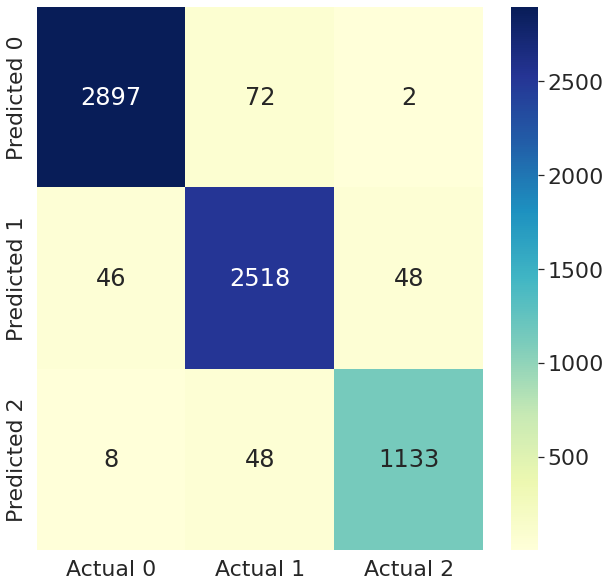

In [ ]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(final_predictions,y_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 0','Actual 1', 'Actual 2'], 
                                 index=['Predicted 0','Predicted 1','Predicted 2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
adenwala_road = final[final['label_enc_road']==2]#Adenwala Rd and Nathalal Parekh Marg

In [ ]:
first_24 = adenwala_road[:24]

In [ ]:
first_24

,Intersections,Public Places,Ways,Speed(m/s),Congestion,label_enc_road,hour,Daynumber
13224,8,29,2,3.411111,1,2,0,4
13225,8,29,2,3.070000,2,2,1,4
13226,8,29,2,3.070000,2,2,2,4
13227,8,29,2,3.411111,1,2,3,4
13228,8,29,2,4.385714,0,2,4,4
13229,8,29,2,4.385714,0,2,5,4
13230,8,29,2,5.116667,0,2,6,4
13231,8,29,2,5.116667,0,2,7,4
13232,8,29,2,6.140000,0,2,8,4
13233,8,29,2,4.385714,0,2,9,4


In [ ]:
#Intersections	Public Places	Ways	label_enc_road	hour	Daynumber
answer = []
first_24.reset_index(inplace=True)
first_24.drop(['index'],axis=1,inplace=True)
for i in range(first_24.shape[0]):
  input = np.array([first_24['Intersections'][i],first_24['Public Places'][i],first_24['Ways'][i],first_24['label_enc_road'][i],first_24['hour'][i],first_24['Daynumber'][i]])
  answer.append(cf.predict(input))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_answer = [i[0] for i in answer]

In [ ]:
first_24['Predicted'] = final_answer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
first_24

,Intersections,Public Places,Ways,Speed(m/s),Congestion,label_enc_road,hour,Daynumber,Predicted
0,8,29,2,3.411111,1,2,0,4,2
1,8,29,2,3.070000,2,2,1,4,2
2,8,29,2,3.070000,2,2,2,4,2
3,8,29,2,3.411111,1,2,3,4,1
4,8,29,2,4.385714,0,2,4,4,0
5,8,29,2,4.385714,0,2,5,4,0
6,8,29,2,5.116667,0,2,6,4,0
7,8,29,2,5.116667,0,2,7,4,0
8,8,29,2,6.140000,0,2,8,4,0
9,8,29,2,4.385714,0,2,9,4,0


In [ ]:
first_24['Actual'] = first_24['Congestion']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


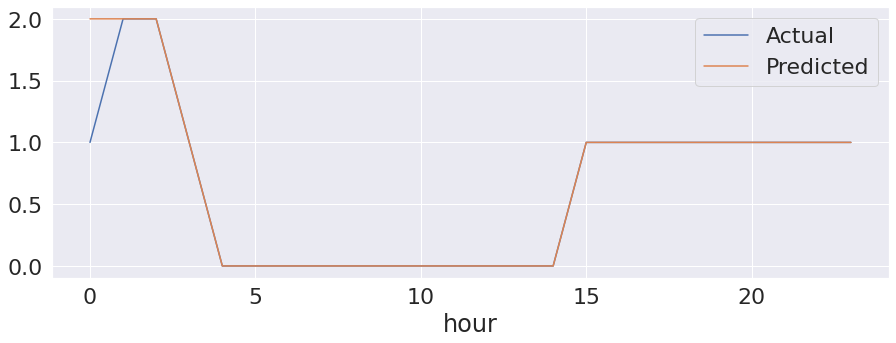

In [ ]:
first_24.plot(x='hour',y=['Actual','Predicted'],figsize=(15,5), grid=True)

In [ ]:
data[data['road']=='Antop Hill Rd and Shaikh Misree Marg']

,Unnamed: 0,road,distance(meters),distance_label,duration(minutes),duration_min(minutes),duration_max(minutes),origin_coordinates,road_distance_timing(meters:seconds),origin,destination,destination_coordinates,query_origin,query_destination,timestamp,datetime_utc,Intersections,Public Places,Ways,Speed(m/s),Congestion
13224,0,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,3,6,"19.022384, 72.8659677","{0: 0, 202: 43, 318: 71, 422: 99, 446: 107, 45...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1625077800,06/30/2021 18:30:00,8,29,2,3.411111,1
13225,1,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,3,7,"19.022384, 72.8659677","{0: 0, 75: 16, 202: 48, 318: 79, 422: 110, 446...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1625081400,06/30/2021 19:30:00,8,29,2,3.070000,2
13226,2,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,3,7,"19.022384, 72.8659677","{0: 0, 202: 49, 318: 80, 372: 95, 422: 110, 44...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1625085000,06/30/2021 20:30:00,8,29,2,3.070000,2
13227,3,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,3,6,"19.022384, 72.8659677","{0: 0, 75: 14, 202: 40, 318: 69, 422: 96, 446:...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1625088600,06/30/2021 21:30:00,8,29,2,3.411111,1
13228,4,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,2,5,"19.022384, 72.8659677","{0: 0, 75: 13, 202: 38, 422: 92, 446: 99, 457:...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1625092200,06/30/2021 22:30:00,8,29,2,4.385714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13675,451,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,3,6,"19.022384, 72.8659677","{0: 0, 75: 15, 202: 45, 372: 87, 446: 106, 457...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1626701400,07/19/2021 13:30:00,8,29,2,3.411111,1
13676,452,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,3,5,"19.022384, 72.8659677","{0: 0, 202: 41, 372: 83, 446: 102, 457: 105, 4...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1626705000,07/19/2021 14:30:00,8,29,2,3.837500,1
13677,453,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,3,6,"19.022384, 72.8659677","{0: 0, 75: 14, 202: 39, 318: 65, 446: 99, 457:...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1626708600,07/19/2021 15:30:00,8,29,2,3.411111,1
13678,454,Antop Hill Rd and Shaikh Misree Marg,921,900 m,4,3,5,"19.022384, 72.8659677","{0: 0, 75: 14, 202: 40, 318: 66, 372: 79, 446:...","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036","19.0302701, 72.8669077","19.02238400174368, 72.86596774279913","19.030270138524426, 72.86690765519036",1626712200,07/19/2021 16:30:00,8,29,2,3.837500,1
